In [241]:
# Библиотеки для реализации проекта
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



# 1. Первичная обработка данных, формирование датасета

## 1.1. Данные о численности людей с ограниченными возможностями

In [2]:
# Выполняем чтение файла формата csv  с помощью библиотеки Pandas
dis_total_data = pd.read_csv('data/disabled_total_by_age_2017_2022.csv')
display(dis_total_data.info())
display(dis_total_data.head(5))
# После успешного чтения файла проверяем значения признака region, определяем, какие признаки
# необходимо удалить
display(dis_total_data['region'].unique())

# формируем список значений признака region, которые будем исключать. Данный список будет 
# дополняться при анализе других данных проекта
titles_to_drop = ['Российская Федерация', 'Центральный федеральный округ', 'Северо-Западный федеральный округ', \
    'Южный федеральный округ', 'Приволжский федеральный округ','Уральский федеральный округ', 'Сибирский федеральный округ',\
    'Дальневосточный федеральный округ', 'Ханты-Мансийский автономный округ', 'Ханты-Мансийский авт. округ',\
    'Ханты-Мансийский АО', 'Ямало-Ненецкий автономный округ', 'Ямало-Hенецкий АО', 'Усть-Ордынский Бурятский округ', \
    'Северо-Кавказский федеральный округ', 'Ненецкий автономный округ', 'Ненецкий авт. округ', 'г. Байконур', \
    'Ненецкий автономный округ (Архангельская область)','Ханты-Мансийский автономный округ - Югра (Тюменская область)', \
    'Ханты-Мансийский автономный округ –  Югра', 'Ямало-Ненецкий автономный округ (Тюменская область)', 'Ямало-Ненецкий авт. округ', \
    'Таймырский (Долгано-Ненецкий) автономный округ (Красноярский край)', 'Эвенкийский автономный округ (Красноярский край)', \
    'Агинский Бурятский округ (Забайкальский край)', 'Чеченская и Ингушская Республики', 'Ханты-Мансийский автономный округ - Югра', \
    'Главное медицинское управление Управления делами Президента Российской Федерации']

# Проводим фильтрацию датасета для исключения строк  снеопдходящими значениями
dis_total_data =  dis_total_data[dis_total_data.region.isin(titles_to_drop) == False]

# Получилось 82 субъекта, сохраняем их в базовый список titles, с которым будем сверяться при
# работе с другими файлами для обеспечения единообразия значнеий признака region
titles = dis_total_data.region.unique().tolist()

# Будем собирать данные 2020 года 
display(dis_total_data['date'].unique())
dis_total_data2 = dis_total_data[dis_total_data['date'] == '2021-01-01']
dis_total_data2.drop(columns=['total', 'date'], inplace=True)
dis_total_data2.rename(columns={'18_30' : '18_30_dis', '31_40' : '31_40_dis',
                                '41_50' : '41_50_dis', '51_60' : '51_60_dis',
                                '60_':'60_dis'}, inplace=True) 
display(dis_total_data2.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  6080 non-null   object 
 1   total   6074 non-null   float64
 2   18_30   6073 non-null   float64
 3   31_40   6074 non-null   float64
 4   41_50   6074 non-null   float64
 5   51_60   6074 non-null   float64
 6   60_     6074 non-null   float64
 7   date    6080 non-null   object 
dtypes: float64(6), object(2)
memory usage: 380.1+ KB


None

,region,total,18_30,31_40,41_50,51_60,60_,date
0,Российская Федерация,11640873.0,550895.0,766054.0,1030652.0,2135436.0,7157836.0,2017-01-01
1,Центральный федеральный округ,3420310.0,118579.0,172662.0,257484.0,598102.0,2273483.0,2017-01-01
2,Белгородская область,223030.0,6318.0,10383.0,16596.0,37444.0,152289.0,2017-01-01
3,Брянская область,110418.0,4215.0,6568.0,10230.0,21481.0,67924.0,2017-01-01
4,Владимирская область,133352.0,4454.0,6811.0,9606.0,23322.0,89159.0,2017-01-01


array(['Российская Федерация', 'Центральный федеральный округ',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Орловская область', 'Рязанская область', 'Смоленская область',
       'Тамбовская область', 'Тверская область', 'Тульская область',
       'Ярославская область', 'город Москва', 'Московская область',
       'Северо-Западный федеральный округ', 'Республика Карелия',
       'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ', 'Вологодская область',
       'Калининградская область', 'город Санкт-Петербург',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область',
       'Северо-Кавказский федеральный округ', 'Республика Дагестан',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Респуб

array(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
       '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
       '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
       '2022-01-01', '2022-02-01', '2022-03-01', '2022-

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\1693118656.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_total_data2.drop(columns=['total', 'date'], inplace=True)
C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\1693118656.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_total_data2.rename(columns={'18_30' : '18_30_dis', '31_40' : '31_40_dis',


,region,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis
4562,Белгородская область,4981.0,9474.0,14917.0,28836.0,133344.0
4563,Брянская область,3435.0,6223.0,9736.0,17717.0,66554.0
4564,Владимирская область,3707.0,6647.0,9540.0,17548.0,81070.0
4565,Воронежская область,6610.0,11975.0,17998.0,36948.0,138087.0
4566,Ивановская область,2587.0,4575.0,6496.0,11117.0,50198.0


### 1.2. Данные о численности населения

In [3]:
population = pd.read_excel('data/population.xlsx')
display(population.info())
display(population.head(5))
# переименовываем признак в region
population.rename(columns={'Unnamed: 0': 'region'}, inplace=True)

# проверяем признак region и делаем срез данных с 2017 по 2020 год
display(population.region.unique())
population2 = population.iloc[:, [0, 20, 21, 22, 23]]

population2.rename(columns={'23110000100030200002 Численность постоянного населения на 1 января.18': 'population_2017',\
    '23110000100030200002 Численность постоянного населения на 1 января.19' : 'population_2018', \
    '23110000100030200002 Численность постоянного населения на 1 января.20': 'population_2019',\
    '23110000100030200002 Численность постоянного населения на 1 января.21': 'population_2020'}, inplace=True)

# Файл прочитан таким образом, что значения оказались в соседней строке, перенесем их в нужные строки
# перед фиальтрацией датасета по признаку region
for i in range(1, population2.shape[0]):
    if 'Раздел' in population2.region.loc[i]:
        population2.iloc[i-1].population_2017 = population2.iloc[i].population_2017
        population2.iloc[i-1].population_2018 = population2.iloc[i].population_2018
        population2.iloc[i-1].population_2019 = population2.iloc[i].population_2019
        population2.iloc[i-1].population_2020 = population2.iloc[i].population_2020

# проверяем, что всё получилось
display(population2.tail(20))

# Применяем список исключаемых значений
population2 = population2[population2.region.isin(titles_to_drop) == False]

# после применения списка остались лишние значения, для их исключения выполним фильтрацию данных
# по содержанию тэгов в неподходящих строках. Список тэгов будет аналогично пополняться по ходу проекта
tags = ['сельсовет', 'Федерация', 'федеральный', 'Раздел', 'униципальны', 'население', \
    'входящ', 'поссовет', 'рп ', 'кроме', 'район', 'без', 'числе', 'в старых границах', \
    'до ', 'МВД', 'Транспорт']

for tag in tags:
    population2 = population2[population2.region.str.contains(tag) == False]

# Некоторые наименования не соответствуют значениям базового списка, составим словарь для приведения их
# в соответствие и также будем пополнят ьсловарь по ходу выполнения проекта
voc = {'Москва': 'город Москва', 'Петербург': 'город Санкт-Петербург', 'Адыгея': 'Республика Адыгея', \
    'Севастополь': 'город Севастополь', 'Татарстан': 'Республика Татарстан', 'Чуваш': 'Чувашская Республика',\
        'Кемеров' : 'Кемеровская область', 'Новгородская' : 'Новгородская область', \
            'Алания' : 'Республика Северная Осетия-Алания'}

for key, value in voc.items():
    population2['region'] = population2['region'].apply(lambda x: value if key in x else x)

  
titles2 = population2.region.unique().tolist()

# функция для проверки сответствия перечня субъектов формируемого датасета базовому
def check_regions(title1, title2):
    """Проверка соответствия текущего перечня субъектов базовому
    
    Args:
        title1 (str): Базовый список субъектов
        title2 (str): Список субъектов формироуемого датасета
    
    Return:
        Сообщение о наличии несоотвествии элементов
    """
    if len(title1) != len(title2):
        print('Несооответствие количества субъектов')
    for i in range(len(title1)):
        if title1[i] not in title2:
            print(f"значению из базового списка - {title1[i]} - нет соответствия")
    for j in range(len(title2)):
        if title2[j] not in title1:
            print(f"значению из формируемого списка - {title2[j]} - нет соответствия")
    

check_regions(titles, titles2)

population2.info()

population2['population_growth'] = ((population2['population_2020'] - population2['population_2019']) + \
    (population2['population_2019'] - population2['population_2018']) + (population2['population_2018'] - \
        population2['population_2017'])) / 3

population2 = population2.iloc[:, [0, 4 ,5]]
display(population2.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 26 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Unnamed: 0                                                             368 non-null    object
 1   Unnamed: 1                                                             368 non-null    object
 2   23110000100030200002 Численность постоянного населения на 1 января     98 non-null     object
 3   23110000100030200002 Численность постоянного населения на 1 января.1   98 non-null     object
 4   23110000100030200002 Численность постоянного населения на 1 января.2   98 non-null     object
 5   23110000100030200002 Численность постоянного населения на 1 января.3   98 non-null     object
 6   23110000100030200002 Численность постоянного населения на 1 января.4   91 non-null     object
 7  

None

,Unnamed: 0,Unnamed: 1,23110000100030200002 Численность постоянного населения на 1 января,23110000100030200002 Численность постоянного населения на 1 января.1,23110000100030200002 Численность постоянного населения на 1 января.2,23110000100030200002 Численность постоянного населения на 1 января.3,23110000100030200002 Численность постоянного населения на 1 января.4,23110000100030200002 Численность постоянного населения на 1 января.5,23110000100030200002 Численность постоянного населения на 1 января.6,23110000100030200002 Численность постоянного населения на 1 января.7,...,23110000100030200002 Численность постоянного населения на 1 января.14,23110000100030200002 Численность постоянного населения на 1 января.15,23110000100030200002 Численность постоянного населения на 1 января.16,23110000100030200002 Численность постоянного населения на 1 января.17,23110000100030200002 Численность постоянного населения на 1 января.18,23110000100030200002 Численность постоянного населения на 1 января.19,23110000100030200002 Численность постоянного населения на 1 января.20,23110000100030200002 Численность постоянного населения на 1 января.21,23110000100030200002 Численность постоянного населения на 1 января.22,23110000100030200002 Численность постоянного населения на 1 января.23
0,NaN,NaN,январь 1999 г.,январь 2000 г.,январь 2001 г.,январь 2002 г.,январь 2003 г.,январь 2004 г.,январь 2005 г.,январь 2006 г.,...,январь 2013 г.,январь 2014 г.,январь 2015 г.,январь 2016 г.,январь 2017 г.,январь 2018 г.,январь 2019 г.,январь 2020 г.,январь 2021 г.,январь 2022 г.
1,все население,w2:p_mest:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Российская Федерация,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Раздел 1. Муниципальные образования субъектов ...,00000000000,147539426,146890128,146303611,145649334,144963650,144333586,143801046,143236582,...,143347059,143666931,146267288,146544710,146804372,146880432,146780720,146748590,146171015,145557576
4,Центральный федеральный округ,030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([nan, 'все население', 'Российская Федерация',
       'Раздел 1. Муниципальные образования субъектов Российской Федерации',
       'Центральный федеральный округ', 'Белгородская область',
       'Брянская область', 'Владимирская область', 'Воронежская область',
       'Ивановская область', 'Калужская область', 'Костромская область',
       'Курская область', 'Липецкая область', 'Московская область',
       'Орловская область', 'Рязанская область', 'Смоленская область',
       'Тамбовская область', 'Тверская область', 'Тульская область',
       'Ярославская область',
       'Город Москва столица Российской Федерации город федерального значения',
       'Северо-Западный федеральный округ', 'Республика Карелия',
       'Республика Коми', 'Архангельская область',
       'Ненецкий автономный округ (Архангельская область)',
       'Архангельская область (кроме Ненецкого автономного округа)',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурма

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2375719087.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population2.rename(columns={'23110000100030200002 Численность постоянного населения на 1 января.18': 'population_2017',\


,region,population_2017,population_2018,population_2019,population_2020
349,Камчатский край,314729,315557,314723,313016
350,Раздел 1. Муниципальные образования субъектов ...,314729,315557,314723,313016
351,"Корякский округ, входящий в состав Камчатского...",NaN,NaN,NaN,NaN
352,Раздел 1. Муниципальные образования субъектов ...,NaN,NaN,NaN,NaN
353,Приморский край,1923116,1913037,1902718,1895868
354,Раздел 1. Муниципальные образования субъектов ...,1923116,1913037,1902718,1895868
355,Хабаровский край,1333294,1328302,1321473,1315643
356,Раздел 1. Муниципальные образования субъектов ...,1333294,1328302,1321473,1315643
357,Амурская область,801752,798424,793194,790044
358,Раздел 1. Муниципальные образования субъектов ...,801752,798424,793194,790044


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 6 to 365
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   region           82 non-null     object
 1   population_2017  82 non-null     object
 2   population_2018  82 non-null     object
 3   population_2019  82 non-null     object
 4   population_2020  82 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


,region,population_2020,population_growth
6,Белгородская область,1549151,-1238.0
8,Брянская область,1192491,-9346.333333
10,Владимирская область,1358416,-10394.333333
12,Воронежская область,2324205,-3734.333333
14,Ивановская область,997135,-8678.333333


### 1.3. Данные об уровне дохода населения

In [4]:
cash_income = pd.read_excel('data/cash_real_income_wages_2015_2020.xlsx')
display(cash_income.info())
display(cash_income.region.unique())

# В данном случае потребовалось предварительно убрать пробелы 
cash_income.region = cash_income.region.apply(lambda x: " ".join(x.split()))
cash_income = cash_income[cash_income.region.isin(titles_to_drop) == False]
for tag in tags:
    cash_income = cash_income[cash_income.region.str.contains(tag) == False]
cash_income.region.unique()
for key, value in voc.items():
    cash_income['region'] = cash_income['region'].apply(lambda x: value if key in x else x)

titles3 = cash_income.region.unique().tolist()
check_regions(titles, titles3)

display(cash_income.info())
cash_income.columns = cash_income.columns.astype(str)
cash_income['growth'] = ((cash_income['2020'] - cash_income['2019']) + \
    (cash_income['2019'] - cash_income['2018']) + (cash_income['2018'] - \
        cash_income['2017'])) / 3
cash_income = cash_income.iloc[:, [0, 6, 7]]
cash_income.rename(columns={'2020' : 'cash_2020', 'growth' : 'cash_growth'}, inplace=True)
display(cash_income.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  98 non-null     object 
 1   2015    96 non-null     float64
 2   2016    96 non-null     float64
 3   2017    96 non-null     float64
 4   2018    96 non-null     float64
 5   2019    96 non-null     float64
 6   2020    96 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.5+ KB


None

array(['Российская Федерация', 'Центральный\n федеральный округ',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Северо-Западный\n федеральный округ', 'Республика Карелия',
       'Республика Коми', 'Архангельская область', 'в том числе:',
       'Ненецкий автономный округ',
       'Архангельская область без\nавтономного округа',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'г. Санкт-Петербург',
       'Южный\n федеральный округ', 'Республика Адыгея',
       'Республика Калмыкия', 'Республика К

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 97
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  82 non-null     object 
 1   2015    82 non-null     float64
 2   2016    82 non-null     float64
 3   2017    82 non-null     float64
 4   2018    82 non-null     float64
 5   2019    82 non-null     float64
 6   2020    82 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.1+ KB


None

,region,cash_2020,cash_growth
2,Белгородская область,32841.0,833.000000
3,Брянская область,28596.0,1163.000000
4,Владимирская область,25922.0,789.333333
5,Воронежская область,32078.0,860.000000
6,Ивановская область,26277.0,472.333333


## 1.4. Данные о детской смертности
### 1.4.1 данные по сельской местности

In [5]:
child_mort_rural = pd.read_excel('data/child_mortality_rural_1990_2021.xls')
display(child_mort_rural.info())
display(child_mort_rural.head())

child_mort_rural.rename(columns={'Число умерших на первом году жизни детей за год (человек, значение показателя за год)': 'region', \
   'Unnamed: 30': 'cmr_2017', 'Unnamed: 31': 'cmr_2018', 'Unnamed: 32': 'cmr_2019', 'Unnamed: 33': 'cmr_2020' }, inplace=True)
child_mort_rural2 = child_mort_rural.iloc[2:,[0, 30, 31, 32, 33]]
display(child_mort_rural2.region.tolist())

child_mort_rural2['region'] = child_mort_rural2.region.apply(lambda x: x.lstrip())
child_mort_rural2 = child_mort_rural2[child_mort_rural2.region.isin(titles_to_drop) == False]
for tag in tags:
    child_mort_rural2 = child_mort_rural2[child_mort_rural2.region.str.contains(tag) == False]
for key, value in voc.items():
    child_mort_rural2['region'] = child_mort_rural2['region'].apply(lambda x: value if key in x else x)
    
titles4_1 = child_mort_rural2.region.unique().tolist()
check_regions(titles, titles4_1)

child_mort_rural2['cmr_growth'] = ((child_mort_rural2['cmr_2020'] - child_mort_rural2['cmr_2019']) + \
    (child_mort_rural2['cmr_2019'] - child_mort_rural2['cmr_2018']) + (child_mort_rural2['cmr_2018'] - \
        child_mort_rural2['cmr_2017'])) / 3
child_mort_rural2 = child_mort_rural2.iloc[:, [0, 4, 5]]

display(child_mort_rural2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 35 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Число умерших на первом году жизни детей за год (человек, значение показателя за год)  119 non-null    object 
 1   Unnamed: 1                                                                             119 non-null    object 
 2   Unnamed: 2                                                                             119 non-null    object 
 3   Unnamed: 3                                                                             112 non-null    float64
 4   Unnamed: 4                                                                             112 non-null    float64
 5   Unnamed: 5                                                                    

None

,"Число умерших на первом году жизни детей за год (человек, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Российская Федерация,Оба пола,сельское население,11186.0,10943.0,10111.0,9840.0,9010.0,8582.0,7983.0,...,5463.0,5059.0,4681.0,4165.0,3568.0,3032.0,2521.0,2122.0,1916.0,1852.0
3,Центральный федеральный округ,Оба пола,сельское население,1615.0,1550.0,1361.0,1426.0,1347.0,1321.0,1200.0,...,625.0,608.0,487.0,490.0,426.0,347.0,291.0,211.0,228.0,212.0
4,Белгородская область,Оба пола,сельское население,103.0,92.0,75.0,79.0,80.0,72.0,72.0,...,43.0,48.0,41.0,42.0,36.0,34.0,33.0,16.0,22.0,20.0


['Российская Федерация',
 '    Центральный федеральный округ',
 '        Белгородская область',
 '        Брянская область',
 '        Владимирская область',
 '        Воронежская область',
 '        Ивановская область',
 '        Калужская область',
 '        Костромская область',
 '        Курская область',
 '        Липецкая область',
 '        Московская область',
 '        Орловская область',
 '        Рязанская область',
 '        Смоленская область',
 '        Тамбовская область',
 '        Тверская область',
 '        Тульская область',
 '        Ярославская область',
 '        Город Москва столица Российской Федерации город федерального значения',
 '    Северо-Западный федеральный округ',
 '        Республика Карелия',
 '        Республика Коми',
 '        Архангельская область',
 '            Ненецкий автономный округ (Архангельская область)',
 '            Архангельская область (кроме Ненецкого автономного округа)',
 '        Вологодская область',
 '        Калининградская о

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 4 to 107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      82 non-null     object 
 1   cmr_2020    82 non-null     float64
 2   cmr_growth  82 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


None

### 1.4.2 Данные по городам

In [6]:
child_mort_urban = pd.read_excel('data/child_mortality_urban_1990_2021.xls')
display(child_mort_urban.info())
display(child_mort_urban.head())

child_mort_urban.rename(columns={'Число умерших на первом году жизни детей за год (человек, значение показателя за год)': 'region', \
   'Unnamed: 30': 'cmu_2017', 'Unnamed: 31': 'cmu_2018', 'Unnamed: 32': 'cmu_2019', 'Unnamed: 33': 'cmu_2020' }, inplace=True)
child_mort_urban = child_mort_urban.iloc[2:,[0, 30, 31, 32, 33]]
child_mort_urban['region'] = child_mort_urban.region.apply(lambda x: x.lstrip())
child_mort_urban = child_mort_urban[child_mort_urban.region.isin(titles_to_drop) == False]
for tag in tags:
    child_mort_urban = child_mort_urban[child_mort_urban.region.str.contains(tag) == False]
for key, value in voc.items():
    child_mort_urban['region'] = child_mort_urban['region'].apply(lambda x: value if key in x else x)

titles4_2 = child_mort_urban.region.unique().tolist()
check_regions(titles, titles4_2)

child_mort_urban['cmu_growth'] = ((child_mort_urban['cmu_2020'] - child_mort_urban['cmu_2019']) + \
    (child_mort_urban['cmu_2019'] - child_mort_urban['cmu_2018']) + (child_mort_urban['cmu_2018'] - \
        child_mort_urban['cmu_2017'])) / 3
child_mort_urban = child_mort_urban.iloc[:, [0, 4, 5]]

display(child_mort_urban.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 35 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Число умерших на первом году жизни детей за год (человек, значение показателя за год)  119 non-null    object 
 1   Unnamed: 1                                                                             119 non-null    object 
 2   Unnamed: 2                                                                             119 non-null    object 
 3   Unnamed: 3                                                                             112 non-null    float64
 4   Unnamed: 4                                                                             112 non-null    float64
 5   Unnamed: 5                                                                    

None

,"Число умерших на первом году жизни детей за год (человек, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Российская Федерация,Оба пола,городское население,23902.0,21549.0,19097.0,18106.0,17131.0,16258.0,14842.0,...,10843.0,10418.0,9641.0,8499.0,7860.0,6545.0,5723.0,5206.0,4573.0,4664.0
3,Центральный федеральный округ,Оба пола,городское население,5317.0,4734.0,4175.0,3899.0,3871.0,3631.0,3254.0,...,2789.0,2735.0,2402.0,2228.0,2146.0,1785.0,1593.0,1409.0,1153.0,1192.0
4,Белгородская область,Оба пола,городское население,209.0,198.0,165.0,165.0,153.0,131.0,102.0,...,84.0,68.0,62.0,68.0,72.0,43.0,40.0,23.0,25.0,34.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 4 to 107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      82 non-null     object 
 1   cmu_2020    82 non-null     float64
 2   cmu_growth  82 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


None

## 1.5. Данные по распределению  малоимущего населения по социально-демографиеским группам

### 1.5.1. Данные по группам за 2017 год

In [7]:
data_socdem = pd.read_excel('data/poverty_socdem_2017.xls')
display(data_socdem.info())
display(data_socdem.head())

data_socdem.rename(columns={'Распределение малоимущего населения по социально-демографическим группам (2017, процент, значение показателя за год)': 'region', \
   'Unnamed: 2': 'under_age_16', 'Unnamed: 3': 'older_work_age', 'Unnamed: 4': 'work_age'}, inplace=True)
data_socdem = data_socdem.iloc[2:,[0, 2, 3, 4]]
display(data_socdem.region.tolist())

data_socdem['region'] = data_socdem.region.apply(lambda x: x.lstrip())
data_socdem = data_socdem[data_socdem.region.isin(titles_to_drop) == False]
for tag in tags:
    data_socdem = data_socdem[data_socdem.region.str.contains(tag) == False]
for key, value in voc.items():
    data_socdem['region'] = data_socdem['region'].apply(lambda x: value if key in x else x)

titles5_1 = data_socdem.region.unique().tolist()
check_regions(titles, titles5_1)

display(data_socdem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Распределение малоимущего населения по социально-демографическим группам (2017, процент, значение показателя за год)  88 non-null     object
 1   Unnamed: 1                                                                                                            89 non-null     object
 2   Unnamed: 2                                                                                                            89 non-null     object
 3   Unnamed: 3                                                                                                            89 non-null     object
 4   Unnamed: 4       

None

,"Распределение малоимущего населения по социально-демографическим группам (2017, процент, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
2,Российская Федерация,100,39.3,6.6,54.1
3,Белгородская область,100,43.4,11.8,44.8
4,Брянская область,100,42.9,4.9,52.2


['Российская Федерация',
 '        Белгородская область',
 '        Брянская область',
 '        Владимирская область',
 '        Воронежская область',
 '        Ивановская область',
 '        Калужская область',
 '        Костромская область',
 '        Курская область',
 '        Липецкая область',
 '        Московская область',
 '        Орловская область',
 '        Рязанская область',
 '        Смоленская область',
 '        Тамбовская область',
 '        Тверская область',
 '        Тульская область',
 '        Ярославская область',
 '        Город Москва столица Российской Федерации город федерального значения',
 '        Республика Карелия',
 '        Республика Коми',
 '        Архангельская область',
 '            Ненецкий автономный округ (Архангельская область)',
 '            Архангельская область (без АО)',
 '        Вологодская область',
 '        Калининградская область',
 '        Ленинградская область',
 '        Мурманская область',
 '        Новгородская область',
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 3 to 89
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          82 non-null     object
 1   under_age_16    82 non-null     object
 2   older_work_age  82 non-null     object
 3   work_age        82 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


None

### 1.5.2. Данные по группам за 2018 год

In [8]:
data_socdem_18 = pd.read_excel('data/poverty_socdem_2018.xls')

data_socdem_18.rename(columns={'Распределение малоимущего населения по социально-демографическим группам (2018, процент, значение показателя за год)': 'region', \
   'Unnamed: 2': 'under_age_16', 'Unnamed: 3': 'older_work_age', 'Unnamed: 4': 'work_age'}, inplace=True)
data_socdem_18 = data_socdem_18.iloc[2:,[0, 2, 3, 4]]
data_socdem_18['region'] = data_socdem_18.region.apply(lambda x: x.lstrip())
data_socdem_18 = data_socdem_18[data_socdem_18.region.isin(titles_to_drop) == False]
for tag in tags:
    data_socdem_18 = data_socdem_18[data_socdem_18.region.str.contains(tag) == False]
for key, value in voc.items():
    data_socdem_18['region'] = data_socdem_18['region'].apply(lambda x: value if key in x else x)

titles5_2 = data_socdem_18.region.unique().tolist()
check_regions(titles, titles5_2)

display(data_socdem_18.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 3 to 89
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          82 non-null     object
 1   under_age_16    82 non-null     object
 2   older_work_age  82 non-null     object
 3   work_age        82 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


None

### 1.5.3. Данные по группам за 2019 год

In [9]:
data_socdem_19 = pd.read_excel('data/poverty_socdem_2019.xls')

data_socdem_19.rename(columns={'Распределение малоимущего населения по социально-демографическим группам (2019, процент, значение показателя за год)': 'region', \
   'Unnamed: 2': 'under_age_16', 'Unnamed: 3': 'older_work_age', 'Unnamed: 4': 'work_age'}, inplace=True)
data_socdem_19 = data_socdem_19.iloc[2:,[0, 2, 3, 4]]
data_socdem_19['region'] = data_socdem_19.region.apply(lambda x: x.lstrip())
data_socdem_19 = data_socdem_19[data_socdem_19.region.isin(titles_to_drop) == False]
for tag in tags:
    data_socdem_19 = data_socdem_19[data_socdem_19.region.str.contains(tag) == False]
for key, value in voc.items():
    data_socdem_19['region'] = data_socdem_19['region'].apply(lambda x: value if key in x else x)

titles5_3 = data_socdem_19.region.unique().tolist()
check_regions(titles, titles5_3)

display(data_socdem_19.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 3 to 89
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          82 non-null     object
 1   under_age_16    82 non-null     object
 2   older_work_age  82 non-null     object
 3   work_age        82 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


None

### 1.5.4. Данные по группам за 2020 год

In [10]:
data_socdem_20 = pd.read_excel('data/poverty_socdem_2020.xls')

data_socdem_20.rename(columns={'Распределение малоимущего населения по социально-демографическим группам (2020, процент, значение показателя за год)': 'region', \
   'Unnamed: 2': 'under_age_16', 'Unnamed: 3': 'older_work_age', 'Unnamed: 4': 'work_age'}, inplace=True)
data_socdem_20 = data_socdem_20.iloc[2:,[0, 2, 3, 4]]
data_socdem_20['region'] = data_socdem_20.region.apply(lambda x: x.lstrip())
data_socdem_20 = data_socdem_20[data_socdem_20.region.isin(titles_to_drop) == False]
for tag in tags:
    data_socdem_20 = data_socdem_20[data_socdem_20.region.str.contains(tag) == False]
for key, value in voc.items():
    data_socdem_20['region'] = data_socdem_20['region'].apply(lambda x: value if key in x else x)

titles5_4 = data_socdem_20.region.unique().tolist()
check_regions(titles, titles5_4)

display(data_socdem_20.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 3 to 89
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          82 non-null     object
 1   under_age_16    71 non-null     object
 2   older_work_age  71 non-null     object
 3   work_age        71 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


None

### 1.5.5 Объединение данных по группам в один датасет

In [11]:
data_socdem_total = data_socdem.merge(data_socdem_18, on='region', suffixes=[None, '_2018'])
data_socdem_total = data_socdem_total.merge(data_socdem_19, on='region', suffixes=[None, '_2019'])
data_socdem_total = data_socdem_total.merge(data_socdem_20, on='region', suffixes=[None, '_2020'])

# заполнение пустых значений 2020 года путем прибавления к 2019 году среднегодового прироста с 2017 года

data_socdem_total.fillna({'under_age_16_2020' : (data_socdem_total['under_age_16_2019'] + (((data_socdem_total['under_age_16_2019'] - \
     data_socdem_total['under_age_16_2018']) + (data_socdem_total['under_age_16_2018'] - data_socdem_total['under_age_16'])) / 2)), \
      'older_work_age_2020' : (data_socdem_total['older_work_age_2019'] + (((data_socdem_total['older_work_age_2019'] - \
     data_socdem_total['older_work_age_2018']) + (data_socdem_total['older_work_age_2018'] - data_socdem_total['older_work_age'])) / 2)), \
    'work_age_2020' : (data_socdem_total['work_age_2019'] + (((data_socdem_total['work_age_2019'] - \
     data_socdem_total['work_age_2018']) + (data_socdem_total['work_age_2018'] - data_socdem_total['work_age'])) / 2))}, inplace=True)

# Оставим значения 2020 года
data_socdem_total = data_socdem_total.iloc[:, [0, 10, 11, 12]]
data_socdem_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               82 non-null     object 
 1   under_age_16_2020    82 non-null     float64
 2   older_work_age_2020  82 non-null     float64
 3   work_age_2020        82 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


## 1.6. Данные по уровню валового регионального продукта

In [12]:
gross_vrp_data = pd.read_excel('data\gross_regional_product_1996_2020.xls')
display(gross_vrp_data.info())
display(gross_vrp_data.head(10))

gross_vrp_data.rename(columns={'Валовой региональный продукт на душу населения (рубль, значение показателя за год)': 'region', \
   'Unnamed: 22': 'grp_2017', 'Unnamed: 23': 'grp_2018', 'Unnamed: 24': 'grp_2019', 'Unnamed: 25': 'grp_2020'}, inplace=True)
gross_vrp_data = gross_vrp_data.iloc[2:,[0, 22, 23, 24, 25]]
gross_vrp_data['region'] = gross_vrp_data.region.apply(lambda x: x.lstrip())
gross_vrp_data = gross_vrp_data[gross_vrp_data.region.isin(titles_to_drop) == False]
for tag in tags:
    gross_vrp_data = gross_vrp_data[gross_vrp_data.region.str.contains(tag) == False]
for key, value in voc.items():
    gross_vrp_data['region'] = gross_vrp_data['region'].apply(lambda x: value if key in x else x)

titles6 = gross_vrp_data.region.unique().tolist()
check_regions(titles, titles6)

gross_vrp_data['grp_growth'] = ((gross_vrp_data['grp_2020'] - gross_vrp_data['grp_2019']) + \
    (gross_vrp_data['grp_2019'] - gross_vrp_data['grp_2018']) + (gross_vrp_data['grp_2018'] - \
        gross_vrp_data['grp_2017'])) / 3
gross_vrp_data = gross_vrp_data.iloc[:, [0, 4, 5]]

display(gross_vrp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Валовой региональный продукт на душу населения (рубль, значение показателя за год)  101 non-null    object 
 1   Unnamed: 1                                                                          82 non-null     float64
 2   Unnamed: 2                                                                          82 non-null     float64
 3   Unnamed: 3                                                                          98 non-null     float64
 4   Unnamed: 4                                                                          98 non-null     float64
 5   Unnamed: 5                                                                          98 non-null    

None

,"Валовой региональный продукт на душу населения (рубль, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,Российская Федерация,12225.0,13938.4,15371.1,26200.6,39532.3,49474.8,60611.4,74840.5,97691.9,...,317515.3,348641.5,377006.0,405147.7,449097.9,505337.7,543065.9,614333.2,646144.1,640519.0
3,Центральный федеральный округ,NaN,NaN,16564.4,31118.7,48205.0,58851.5,75739.2,94244.6,121487.7,...,417288.1,451517.2,494482.7,536607.9,580706.6,663881.8,711031.6,792780.9,835858.8,854978.5
4,Белгородская область,9575.6,10792.2,12242.8,21398.0,27969.5,33126.7,41327.4,50271.4,75629.4,...,331010.0,354570.6,368874.8,400820.8,447619.7,501467.8,539720.5,588641.5,617426.5,646569.0
5,Брянская область,7275.3,7175.7,7659.1,11752.4,17413.5,21511.9,27020.0,31953.4,37719.1,...,137187.1,164726.6,175865.0,196096.7,221080.0,258752.7,280630.1,304547.1,332442.8,347204.5
6,Владимирская область,7620.7,8431.3,9350.2,15457.1,21073.3,27170.0,32923.6,40809.4,49353.4,...,181842.6,200456.4,216320.8,232757.6,262945.5,309713.7,325043.1,349856.4,394560.3,410443.6
7,Воронежская область,7651.9,8686.6,9082.1,14808.3,20365.1,24905.4,34789.6,42237.5,49530.0,...,203575.5,241947.4,262578.3,308004.7,345566.8,354657.9,374125.7,408140.7,431037.0,459629.5
8,Ивановская область,6725.4,6379.3,6804.5,9765.2,14240.0,18947.2,23396.9,29192.4,35732.7,...,121945.5,129448.3,151263.6,146032.6,174687.5,200504.4,208522.0,230325.5,249591.6,273821.5
9,Калужская область,8366.3,8795.3,9330.4,14891.4,22438.0,30201.9,35708.4,47136.5,56325.6,...,232722.0,283299.9,291365.2,324024.4,336353.9,404538.6,451025.5,502224.2,541870.1,558174.6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 4 to 101
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      82 non-null     object 
 1   grp_2020    82 non-null     float64
 2   grp_growth  82 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


None

## 1.7. Характеристика жилищных условий домохозяйств

In [13]:
housing_data = pd.read_excel('data/housing_2020.xlsx')
display(housing_data.info())
display(housing_data.head())

housing_data.rename(columns={'Регион': 'region', 'в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности': 'good_conditions', \
    'в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность': 'bad_conditions', \
    'в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность': 'worst_conditions', \
    'Размер жилой площади в расчете на члена домохозяйства' : 'living_area' }, inplace=True)
housing_data = housing_data.iloc[:,[0, 2, 3, 4, 7]]

voc2 = {'Москва': 'город Москва', 'Петербург': 'город Санкт-Петербург', 'Еврейская': 'Еврейская автономная область', \
    'Севастополь': 'город Севастополь', 'Чукотск': 'Чукотский автономный округ', 'Якутия': 'Республика Саха (Якутия)', \
        'Архангельская' : 'Архангельская область', 'Тюменская' : 'Тюменская область', 'ладимирская' : 'Владимирская область', 'оронежская' : 'Воронежская область',\
            'ологодская' : 'Вологодская область', 'олгоградская' : 'Волгоградская область', 'Сахалинская' : 'Сахалинская область', 'Алания' : 'Республика Северная Осетия-Алания'}

for key, value in voc2.items():
    housing_data['region'] = housing_data['region'].apply(lambda x: value if key in x else x)
housing_data = housing_data[housing_data.region.isin(titles_to_drop) == False]
for tag in tags:
    housing_data = housing_data[housing_data.region.str.contains(tag) == False]
    
titles7 = housing_data.region.unique().tolist()
check_regions(titles, titles7)

display(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Регион                                                                                         94 non-null     object 
 1   Число домохозяйств, проживающих во всех типах жилых помещений                                  86 non-null     float64
 2   в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности            86 non-null     float64
 3   в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность  86 non-null     float64
 4   в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность       86 non-null     float64
 5   затруднились ответить    

None

,Регион,"Число домохозяйств, проживающих во всех типах жилых помещений","в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности","в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность","в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность",затруднились ответить,Размер общей площади в расчете на члена домохозяйства,Размер жилой площади в расчете на члена домохозяйства,Число жилых комнат в расчете на одно домохозяйство
0,Российская Федерация,100.0,80.7,15.4,3.8,0.1,24.2,16.9,2.4
1,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,100.0,86.3,11.7,2.0,0.0,25.1,17.8,2.6
3,Брянская область,100.0,94.7,4.6,0.6,0.0,30.5,24.1,3.2
4,Bладимирская область,100.0,81.8,15.8,2.5,0.0,24.2,16.1,2.2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 93
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            82 non-null     object 
 1   good_conditions   82 non-null     float64
 2   bad_conditions    82 non-null     float64
 3   worst_conditions  82 non-null     float64
 4   living_area       82 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


None

## 1.8. Данные по количеству рожденных

In [14]:
newborn_data = pd.read_csv('data/newborn_2006_2022_monthly.csv', delimiter=';')
display(newborn_data.info())

newborn_data.rename(columns={'Region' : 'region'}, inplace=True)
newborn_data.drop(columns='Unnamed: 198', inplace=True)

newborn_data = newborn_data[newborn_data.region.isin(titles_to_drop) == False]
for tag in tags:
    newborn_data = newborn_data[newborn_data.region.str.contains(tag) == False]
    
for key, value in voc.items():
    newborn_data['region'] = newborn_data['region'].apply(lambda x: value if key in x else x)

display(newborn_data.head())

newborn_data = newborn_data.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
newborn_data_2 = newborn_data.iloc[:,1:].applymap(pd.to_numeric)
display(newborn_data_2.info())

newborn_data_2['region'] = newborn_data['region']

newborn_data_2['born_2017'] = newborn_data_2['январь 2017 г.'] + newborn_data_2['февраль 2017 г.'] + newborn_data_2['март 2017 г.'] + \
    newborn_data_2['апрель 2017 г.'] + newborn_data_2['май 2017 г.'] + newborn_data_2['июнь 2017 г.'] + newborn_data_2['июль 2017 г.'] + \
    newborn_data_2['август 2017 г.'] + newborn_data_2['сентябрь 2017 г.'] + newborn_data_2['октябрь 2017 г.'] + newborn_data_2['ноябрь 2017 г.'] + \
    newborn_data_2['декабрь 2017 г.']

newborn_data_2['born_2018'] = newborn_data_2['январь 2018 г.'] + newborn_data_2['февраль 2018 г.'] + newborn_data_2['март 2018 г.'] + \
    newborn_data_2['апрель 2018 г.'] + newborn_data_2['май 2018 г.'] + newborn_data_2['июнь 2018 г.'] + newborn_data_2['июль 2018 г.'] + \
    newborn_data_2['август 2018 г.'] + newborn_data_2['сентябрь 2018 г.'] + newborn_data_2['октябрь 2018 г.'] + newborn_data_2['ноябрь 2018 г.'] + \
    newborn_data_2['декабрь 2018 г.']

newborn_data_2['born_2019'] = newborn_data_2['январь 2019 г.'] + newborn_data_2['февраль 2019 г.'] + newborn_data_2['март 2019 г.'] + \
    newborn_data_2['апрель 2019 г.'] + newborn_data_2['май 2019 г.'] + newborn_data_2['июнь 2019 г.'] + newborn_data_2['июль 2019 г.'] + \
    newborn_data_2['август 2019 г.'] + newborn_data_2['сентябрь 2019 г.'] + newborn_data_2['октябрь 2019 г.'] + newborn_data_2['ноябрь 2019 г.'] + \
    newborn_data_2['декабрь 2019 г.']
    
newborn_data_2['born_2020'] = newborn_data_2['январь 2020 г.'] + newborn_data_2['февраль 2020 г.'] + newborn_data_2['март 2020 г.'] + \
    newborn_data_2['апрель 2020 г.'] + newborn_data_2['май 2020 г.'] + newborn_data_2['июнь 2020 г.'] + newborn_data_2['июль 2020 г.'] + \
    newborn_data_2['август 2020 г.'] + newborn_data_2['сентябрь 2020 г.'] + newborn_data_2['октябрь 2020 г.'] + newborn_data_2['ноябрь 2020 г.'] + \
    newborn_data_2['декабрь 2020 г.']
    
display(newborn_data_2.info())

newborn_data_3 = newborn_data_2[['region', 'born_2017', 'born_2018', 'born_2019', 'born_2020']]

titles8 = newborn_data_3.region.unique().tolist()
check_regions(titles, titles8)

newborn_data_3['born_growth'] = ((newborn_data_3['born_2020'] - newborn_data_3['born_2019']) + \
    (newborn_data_3['born_2019'] - newborn_data_3['born_2018']) + (newborn_data_3['born_2018'] - \
        newborn_data_3['born_2017'])) / 3
newborn_data_3 = newborn_data_3.iloc[:, [0, 4, 5]]

display(newborn_data_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Columns: 199 entries, Region to Unnamed: 198
dtypes: float64(1), object(198)
memory usage: 169.6+ KB


None

,region,январь 2006 г.,февраль 2006 г.,март 2006 г.,апрель 2006 г.,май 2006 г.,июнь 2006 г.,июль 2006 г.,август 2006 г.,сентябрь 2006 г.,...,август 2021 г.,сентябрь 2021 г.,октябрь 2021 г.,ноябрь 2021 г.,декабрь 2021 г.,январь 2022 г.,февраль 2022 г.,март 2022 г.,апрель 2022 г.,май 2022 г.
2,Белгородская область,1040,1094,1190,1044,1228,1249,1224,1389,1157,...,1154,1084,1053,990,1028,861,941,956,801,869
3,Брянская область,904,989,1039,936,1072,961,1058,1121,989,...,835,784,751,783,729,707,670,740,589,660
4,Владимирская область,1040,1059,1236,1063,1226,1144,1221,1333,1177,...,864,783,834,769,821,691,700,708,660,711
5,Воронежская область,1301,1479,1689,1513,1729,1555,1620,1897,1554,...,1708,1643,1278,1758,1584,1342,1326,1576,1309,1319
6,Ивановская область,714,799,829,806,840,847,859,865,812,...,630,620,598,609,614,562,506,628,536,562


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 105
Columns: 197 entries, январь 2006 г. to май 2022 г.
dtypes: float64(193), int64(4)
memory usage: 126.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 105
Columns: 202 entries, январь 2006 г. to born_2020
dtypes: float64(197), int64(4), object(1)
memory usage: 130.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 105
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       82 non-null     object 
 1   born_2020    82 non-null     float64
 2   born_growth  82 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\1620400410.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newborn_data_3['born_growth'] = ((newborn_data_3['born_2020'] - newborn_data_3['born_2019']) + \


None

## 1.9. Данные по заболеваниям

In [15]:
morbidity_data = pd.read_excel('data/morbidity_2005_2020_age_disease.xls')
display(morbidity_data.info())
display(morbidity_data.head())

display(morbidity_data['Unnamed: 1'].unique())
# Для будущего сводного датасета и кластеризации выбраны признаки:
# Травмы, отравления...." как возможный индикатор бытовой клуьтуры и уровня развития инфраструктуры,
# "Новообразования" как маркер распространенности онкологии 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 15 columns):
 #   Column                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                  --------------  -----  
 0   Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)  8159 non-null   object 
 1   Unnamed: 1                                                                                                                                                              8159 non-null   object 
 2   Unnamed: 2                                                                                          

None

,"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
2,Российская Федерация,"Беременность, роды и послеродовой период",0-14 лет,21.3,17.6,17.9,22.1,18.1,18.9,16.2,17.7,12.2,12.1,8.1,15.5
3,Российская Федерация,"Беременность, роды и послеродовой период",15-17 лет,1537.3,1527.5,1605.2,1681.5,1618.9,1451.3,1247.6,1229.1,1272.3,1186.5,914.0,794.0
4,Российская Федерация,"Беременность, роды и послеродовой период",18 лет и старше,6731.7,6833.5,7229.7,7516.9,8007.5,8084.4,7981.6,8141.8,8084.6,8219.9,7734.1,7278.6


array([nan, 'Беременность, роды и послеродовой период',
       'Болезни глаза и его придаточного аппарата',
       'Болезни костно-мышечной системы и соединительной ткани',
       'Болезни мочеполовой системы', 'Болезни нервной системы',
       'Болезни органов дыхания', 'Болезни органов пищеварения',
       'Болезни системы кровообращения',
       'Болезни уха и сосцевидного отростка',
       'Болезни эндокринной системы, расстройства питания и нарушения обмена веществ',
       'Врожденные аномалии (пороки развития), деформации и хромосомные нарушения',
       'Все заболевания', 'Злокачественные новообразования',
       'Некоторые инфекционные и паразитарные болезни', 'Новообразования',
       'Отдельные состояния, возникающие в перинатальном периоде',
       'Прочие болезни',
       'Психические расстройства и расстройства поведения',
       'Травмы, отравления и другие последствия воздействия внешних причин'],
      dtype=object)

### 1.9.1. Работа с данными по признаку "Травмы, отравления и другие..."

In [16]:
injuries_data = morbidity_data[morbidity_data['Unnamed: 1'] == 'Травмы, отравления и другие последствия воздействия внешних причин']
display(injuries_data['Unnamed: 2'].unique())

injuries_data_total = injuries_data[injuries_data['Unnamed: 2'] == 'Всего']
display(injuries_data_total.head())

injuries_data_total.rename(columns={"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)" : 'region', 'Unnamed: 14' : 'inj_2016'}, inplace=True)
injuries_data_total = injuries_data_total.iloc[:, [0, 14]]
display(injuries_data_total.region.tolist())

injuries_data_total.dropna(axis=0, inplace=True)

injuries_data_total['region'] = injuries_data_total.region.apply(lambda x: x.lstrip())
injuries_data_total = injuries_data_total[injuries_data_total.region.isin(titles_to_drop) == False]
injuries_data_total
#for tag in tags:
#    injuries_data_total = injuries_data_total[injuries_data_total.region.str.contains(tag) == False]
for key, value in voc.items():
    injuries_data_total['region'] = injuries_data_total['region'].apply(lambda x: value if key in x else x)
    
titles9 = injuries_data_total.region.tolist()
check_regions(titles, titles9)

injuries_data_total = injuries_data_total[injuries_data_total.region.isin(['Южный федеральный округ (с 28.07.2016)', \
    'Северо-Кавказский федеральный округ (с 03.06.2014)']) == False]
voc_local = {'Архангельская' : 'Архангельская область', 'Тюменская' : 'Тюменская область'}
for key, value in  voc_local.items():
    injuries_data_total['region'] = injuries_data_total['region'].apply(lambda x: value if key in x else x)

titles9 = injuries_data_total.region.tolist()
check_regions(titles, titles9)

display(injuries_data_total.info())

array(['0-14 лет', '15-17 лет', '18 лет и старше', 'Всего'], dtype=object)

,"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
74,Российская Федерация,"Травмы, отравления и другие последствия воздей...",Всего,9021.9,8954.6,9198.3,9172.5,9058.3,9228.3,9282.4,9384.8,9267.9,9012.8,8467.3,8279.2
147,Центральный федеральный округ,"Травмы, отравления и другие последствия воздей...",Всего,8171.9,8048.9,8333.6,8399.8,8436.5,8655.1,8591.6,8776.5,8682.6,8567.6,7691.7,7698.1
220,Белгородская область,"Травмы, отравления и другие последствия воздей...",Всего,8923.7,8089.1,8581.3,8721.3,8679.4,8843.7,8612.2,8891.5,8854.5,9083.1,8540.9,8782.1
293,Брянская область,"Травмы, отравления и другие последствия воздей...",Всего,8217.2,8351.0,8359.2,8497.8,8460.5,9094.3,10050.2,11030.2,10838.0,10691.7,9644.4,9717.7
366,Владимирская область,"Травмы, отравления и другие последствия воздей...",Всего,8826.1,8436.5,8722.9,9046.3,9795.6,10103.2,9280.2,10043.1,9463.2,9549.6,9579.1,9918.2


C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2428547620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_data_total.rename(columns={"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)" : 'region', 'Unnamed: 14' : 'inj_2016'}, inplace=True)


['Российская Федерация',
 '    Центральный федеральный округ',
 '        Белгородская область',
 '        Брянская область',
 '        Владимирская область',
 '        Воронежская область',
 '        Ивановская область',
 '        Калужская область',
 '        Костромская область',
 '        Курская область',
 '        Липецкая область',
 '        Московская область',
 '        Орловская область',
 '        Рязанская область',
 '        Смоленская область',
 '        Тамбовская область',
 '        Тверская область',
 '        Тульская область',
 '        Ярославская область',
 '        г. Москва ',
 '    Северо-Западный федеральный округ',
 '        Республика Карелия',
 '        Республика Коми',
 '        Архангельская область',
 '            Ненецкий автономный округ (Архангельская область)',
 '        Вологодская область',
 '        Калининградская область',
 '        Ленинградская область',
 '        Мурманская область',
 '        Новгородская область',
 '        Псковская область

Несооответствие количества субъектов
значению из базового списка - Архангельская область - нет соответствия
значению из базового списка - Тюменская область - нет соответствия
значению из формируемого списка - Архангельская обл. без данных по Ненецкому авт. окр. - нет соответствия
значению из формируемого списка - Южный федеральный округ (с 28.07.2016) - нет соответствия
значению из формируемого списка - Северо-Кавказский федеральный округ (с 03.06.2014) - нет соответствия
значению из формируемого списка - Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр. - нет соответствия
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 220 to 8092
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    82 non-null     object 
 1   inj_2016  82 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


None

### 1.9.2 Работа с данными по новообразованиям

In [17]:
oncology_data = morbidity_data[morbidity_data['Unnamed: 1'] == 'Новообразования']
oncology_data_total = oncology_data[oncology_data['Unnamed: 2'] == 'Всего']
display(oncology_data_total.head())

oncology_data_total.rename(columns={"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)" : 'region', 'Unnamed: 14' : 'onco_2016'}, inplace=True)
oncology_data_total = oncology_data_total.iloc[:, [0, 14]]
display(oncology_data_total.region.tolist())

oncology_data_total.dropna(axis=0, inplace=True)

oncology_data_total['region'] = oncology_data_total.region.apply(lambda x: x.lstrip())
oncology_data_total = oncology_data_total[oncology_data_total.region.isin(titles_to_drop) == False]
oncology_data_total
#for tag in tags:
#    injuries_data_total = injuries_data_total[injuries_data_total.region.str.contains(tag) == False]
for key, value in voc.items():
    oncology_data_total['region'] = oncology_data_total['region'].apply(lambda x: value if key in x else x)
    
titles9_2 = oncology_data_total.region.tolist()
check_regions(titles, titles9_2)

oncology_data_total = oncology_data_total[oncology_data_total.region.isin(['Южный федеральный округ (с 28.07.2016)', \
    'Северо-Кавказский федеральный округ (с 03.06.2014)']) == False]
voc_local = {'Архангельская' : 'Архангельская область', 'Тюменская' : 'Тюменская область'}
for key, value in  voc_local.items():
    oncology_data_total['region'] = oncology_data_total['region'].apply(lambda x: value if key in x else x)

titles9_2 = oncology_data_total.region.tolist()
check_regions(titles, titles9_2)

display(oncology_data_total.info())

,"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
61,Российская Федерация,Новообразования,Всего,955.8,994.9,1011.0,1012.2,1074.5,1085.2,1110.2,1157.6,1136.3,1157.5,1141.8,1138.3
134,Центральный федеральный округ,Новообразования,Всего,945.4,983.2,1000.5,998.2,1046.3,1056.6,1065.2,1173.6,1033.9,1047.9,1021.3,1045.5
207,Белгородская область,Новообразования,Всего,1347.5,1457.6,1674.5,1450.8,1336.0,1311.1,1249.5,1423.0,1225.5,1231.3,1031.2,1204.0
280,Брянская область,Новообразования,Всего,1043.9,1273.3,1322.8,1323.7,1335.9,1285.2,1309.4,1119.1,1204.1,1165.2,1147.0,1134.5
353,Владимирская область,Новообразования,Всего,1169.7,1201.6,1274.4,1184.1,1158.2,1111.9,1197.9,1140.4,1066.9,1123.5,1217.2,1107.7


C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\4203248270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oncology_data_total.rename(columns={"Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения (человек, на 1 января)" : 'region', 'Unnamed: 14' : 'onco_2016'}, inplace=True)


['Российская Федерация',
 '    Центральный федеральный округ',
 '        Белгородская область',
 '        Брянская область',
 '        Владимирская область',
 '        Воронежская область',
 '        Ивановская область',
 '        Калужская область',
 '        Костромская область',
 '        Курская область',
 '        Липецкая область',
 '        Московская область',
 '        Орловская область',
 '        Рязанская область',
 '        Смоленская область',
 '        Тамбовская область',
 '        Тверская область',
 '        Тульская область',
 '        Ярославская область',
 '        г. Москва ',
 '    Северо-Западный федеральный округ',
 '        Республика Карелия',
 '        Республика Коми',
 '        Архангельская область',
 '            Ненецкий автономный округ (Архангельская область)',
 '        Вологодская область',
 '        Калининградская область',
 '        Ленинградская область',
 '        Мурманская область',
 '        Новгородская область',
 '        Псковская область

Несооответствие количества субъектов
значению из базового списка - Архангельская область - нет соответствия
значению из базового списка - Тюменская область - нет соответствия
значению из формируемого списка - Архангельская обл. без данных по Ненецкому авт. окр. - нет соответствия
значению из формируемого списка - Южный федеральный округ (с 28.07.2016) - нет соответствия
значению из формируемого списка - Северо-Кавказский федеральный округ (с 03.06.2014) - нет соответствия
значению из формируемого списка - Тюменская обл.без данных по Ханты-Мансийскому и Ямало-Ненецкому авт. окр. - нет соответствия
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 207 to 8079
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     82 non-null     object 
 1   onco_2016  82 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


None

### 1.9.3 Объединение в датасет по заболеваниям

In [18]:
morbidity_data_total = injuries_data_total.merge(oncology_data_total, on='region', suffixes=[None, None])
morbidity_data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     82 non-null     object 
 1   inj_2016   82 non-null     float64
 2   onco_2016  82 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


## 1.10. Данные о проценте людей, живущими за чертой бедности

In [19]:
poverty_regions = pd.read_csv('data/poverty_percent_by_regions_1992_2020.csv')
display(poverty_regions.info())

poverty_regions = poverty_regions[poverty_regions['year'] == 2020]
poverty_regions['region'] = poverty_regions.region.apply(lambda x: x.lstrip())
poverty_regions = poverty_regions[poverty_regions.region.isin(titles_to_drop) == False]
for tag in tags:
    poverty_regions = poverty_regions[poverty_regions.region.str.contains(tag) == False]
for key, value in voc.items():
    poverty_regions['region'] = poverty_regions['region'].apply(lambda x: value if key in x else x)

titles10 = poverty_regions.region.tolist()
check_regions(titles, titles10)
poverty_regions = poverty_regions[['region', 'poverty_percent']]
poverty_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           2339 non-null   object 
 1   year             2339 non-null   int64  
 2   poverty_percent  2339 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 54.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 70 to 2337
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           82 non-null     object 
 1   poverty_percent  82 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


## 1.11. Данные по расходам на социальную политику

In [20]:
welfare_expense = pd.read_excel('data/welfare_expense_share_2015_2020.xlsx')
display(welfare_expense.info())

welfare_expense.region = welfare_expense.region.apply(lambda x: " ".join(x.split()))

display(welfare_expense.head())
display(welfare_expense.region.unique())

welfare_expense = welfare_expense[welfare_expense.region.isin(titles_to_drop) == False]
for tag in tags:
   welfare_expense = welfare_expense[welfare_expense.region.str.contains(tag) == False]
for key, value in voc.items():
    welfare_expense['region'] = welfare_expense['region'].apply(lambda x: value if key in x else x)

titles11 = welfare_expense.region.tolist()
check_regions(titles, titles11)

welfare_expense['welfare_growth'] = ((welfare_expense[2020] - welfare_expense[2019]) + \
    (welfare_expense[2019] - welfare_expense[2018]) + (welfare_expense[2018] - \
        welfare_expense[2017])) / 3
welfare_expense = welfare_expense.iloc[:, [0, 6, 7]]
welfare_expense.rename(columns={2020: 'welfare_2020'}, inplace=True)
display(welfare_expense.head(5))

welfare_expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  94 non-null     object 
 1   2015    86 non-null     float64
 2   2016    86 non-null     float64
 3   2017    86 non-null     float64
 4   2018    86 non-null     float64
 5   2019    86 non-null     float64
 6   2020    86 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.3+ KB


None

,region,2015,2016,2017,2018,2019,2020
0,Российская Федерация,15.8,16.6,20.4,20.3,19.8,21.3
1,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN
2,Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
3,Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
4,Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0


array(['Российская Федерация', 'Центральный федеральный округ',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'г. Москва',
       'Северо-Западный федеральный округ', 'Республика Карелия',
       'Республика Коми', 'Архангельская область', 'Вологодская область',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Новгородская область', 'Псковская область',
       'г. Санкт-Петербург', 'Ненецкий автономный округ',
       'Южный федеральный округ', 'Республика Адыгея',
       'Республика Калмыкия', 'Республика Крым', 'Краснодарский край',
       'Астраханская область', 'Волгоградская область',
 

,region,welfare_2020,welfare_growth
2,Белгородская область,16.1,-0.100000
3,Брянская область,23.1,-0.533333
4,Владимирская область,26.0,0.666667
5,Воронежская область,21.6,-0.400000
6,Ивановская область,25.1,-1.200000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 93
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          82 non-null     object 
 1   welfare_2020    82 non-null     float64
 2   welfare_growth  82 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


## 1.12. Работа с данными по объему отгруженных товаров собственного производства

In [21]:
regional_production = pd.read_csv('data/regional_production_2017_2020.csv')
display(regional_production.info())
display(regional_production.head())

display(regional_production.region.unique())
display(regional_production.production_field.unique())

production_list = ['ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА', 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА', \
    'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ', ]
regional_production = regional_production[regional_production.production_field.isin(production_list) == True]

display(regional_production.production_field.unique())
display(regional_production.info())

regional_production['region'] = regional_production.region.apply(lambda x: x.lstrip())
regional_production = regional_production[regional_production.region.isin(titles_to_drop) == False]
for tag in tags:
    regional_production = regional_production[regional_production.region.str.contains(tag) == False]
for key, value in voc.items():
    regional_production['region'] = regional_production['region'].apply(lambda x: value if key in x else x)

titles12 = regional_production.region.unique().tolist()
check_regions(titles, titles12)

display(regional_production.info())

extraction_data = regional_production[regional_production['production_field'] == 'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ']
manufacture_data = regional_production[regional_production['production_field'] == 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА']
energy_data = regional_production[regional_production['production_field'] == 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА']
water_data = regional_production[regional_production['production_field'] == 'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ']

# объединение в один датасет
production_data = energy_data.merge(manufacture_data, on='region', suffixes=['_energy', '_manufacture'])
production_data = production_data.merge(extraction_data, on='region', how='left', suffixes=[None ,'_extraction'])
production_data = production_data.merge(water_data, on='region', how='left', suffixes=[None , '_water'])
production_data.info()

production_data[production_data['2020'].isna()]['region']
production_data_total = production_data.iloc[:, [0, 5, 10]]
production_data_total.rename(columns={'2020_energy' : 'energy_2020', '2020_manufacture' : 'manufacture_2020'}, inplace=True)
display(production_data_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            604 non-null    object 
 1   production_field  604 non-null    object 
 2   2017              604 non-null    float64
 3   2018              604 non-null    float64
 4   2019              604 non-null    float64
 5   2020              604 non-null    float64
dtypes: float64(4), object(2)
memory usage: 28.4+ KB


None

,region,production_field,2017,2018,2019,2020
0,Российская Федерация,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,1.391616e+10,1.819387e+10,1.832413e+10,1.449890e+10
1,Российская Федерация,Добыча угля,1.228407e+09,1.567151e+09,1.392654e+09,1.100662e+09
2,Российская Федерация,Добыча и обогащение угля и антрацита,1.151523e+09,1.472893e+09,1.302804e+09,1.012754e+09
3,Российская Федерация,Добыча и обогащение бурого угля (лигнита),7.688374e+07,9.425728e+07,8.984967e+07,8.790853e+07
4,Российская Федерация,Добыча нефти и природного газа,9.286030e+09,1.287361e+10,1.285934e+10,8.945390e+09


array(['Российская Федерация', '    Центральный федеральный округ',
       '        Белгородская область', '        Брянская область',
       '        Владимирская область', '        Воронежская область',
       '        Ивановская область', '        Калужская область',
       '        Костромская область', '        Курская область',
       '        Липецкая область', '        Московская область',
       '        Орловская область', '        Рязанская область',
       '        Смоленская область', '        Тамбовская область',
       '        Тверская область', '        Тульская область',
       '        Ярославская область',
       '        Город Москва столица Российской Федерации город федерального значения',
       '    Северо-Западный федеральный округ',
       '        Республика Карелия', '        Республика Коми',
       '        Архангельская область',
       '            Ненецкий автономный округ (Архангельская область)',
       '            Архангельская область (кроме Ненец

array(['ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', '    Добыча угля',
       '        Добыча и обогащение угля и антрацита',
       '        Добыча и обогащение бурого угля (лигнита)',
       '    Добыча нефти и природного газа',
       '            Добыча нефти и нефтяного (попутного) газа',
       '            Добыча природного газа и газового конденсата',
       '    Добыча металлических руд',
       '            Добыча и обогащение железных руд',
       '        Добыча руд цветных металлов',
       '    Добыча прочих полезных ископаемых',
       '        Добыча камня, песка и глины',
       '        Добыча полезных ископаемых, не включенных в другие группировки',
       '    Предоставление услуг в области добычи полезных ископаемых',
       '        Предоставление услуг в области добычи нефти и природного газа',
       '        Предоставление услуг в других областях добычи полезных ископаемых',
       'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
       '    Производство пищевых продуктов',
       '        Пер

array(['ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ', 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА',
       'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА',
       'ВОДОСНАБЖЕНИЕ; ВОДООТВЕДЕНИЕ, ОРГАНИЗАЦИЯ СБОРА И УТИЛИЗАЦИИ ОТХОДОВ, ДЕЯТЕЛЬНОСТЬ ПО ЛИКВИДАЦИИ ЗАГРЯЗНЕНИЙ'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 602
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            380 non-null    object 
 1   production_field  380 non-null    object 
 2   2017              380 non-null    float64
 3   2018              380 non-null    float64
 4   2019              380 non-null    float64
 5   2020              380 non-null    float64
dtypes: float64(4), object(2)
memory usage: 20.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 138 to 602
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            324 non-null    object 
 1   production_field  324 non-null    object 
 2   2017              324 non-null    float64
 3   2018              324 non-null    float64
 4   2019              324 non-null    float64
 5   2020              324 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        82 non-null     object 
 1   production_field_energy       82 non-null     object 
 2   2017_energy                   82 non-null     float64
 3   2018_energy                   82 non-null     float64
 4   2019_energy                   82 non-null     float64
 5   2020_energy                   82 non-null     float64
 6   production_field_manufacture  82 non-null     object 
 7   2017_manufacture              82 non-null     float64
 8   2018_manufacture              82 non-null     float64
 9   2019_manufacture              82 non-null     float64
 10  2020_manufacture              82 non-null     float64
 11  production_field              80 non-null     object 
 12  2017                          80 non-null     float64
 13  2018   

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\15803570.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_data_total.rename(columns={'2020_energy' : 'energy_2020', '2020_manufacture' : 'manufacture_2020'}, inplace=True)


None

## 1.13. Работа с данными по обороту розничной торговли на душу населения

In [22]:
retail_turnover = pd.read_excel('data/retail_turnover_per_capita_2000_2021.xls')
display(retail_turnover.info())
display(retail_turnover.head())

retail_turnover = retail_turnover.iloc[3:,[0, 19, 20, 21, 22]]

retail_turnover.rename(columns={'Оборот розничной торговли на душу населения с 2000 г.' : 'region', 'Unnamed: 19' : 'retail_2017', \
    'Unnamed: 20' : 'retail_2018', 'Unnamed: 21' : 'retail_2019', 'Unnamed: 22' : 'retail_2020'}, inplace=True)

display(retail_turnover.head())

retail_turnover['region'] = retail_turnover.region.apply(lambda x: x.lstrip())
retail_turnover = retail_turnover[retail_turnover.region.isin(titles_to_drop) == False]
for tag in tags:
    retail_turnover = retail_turnover[retail_turnover.region.str.contains(tag) == False]
for key, value in voc.items():
    retail_turnover['region'] = retail_turnover['region'].apply(lambda x: value if key in x else x)

titles13 = regional_production.region.unique().tolist()
check_regions(titles, titles13)

retail_turnover['retail_growth'] = ((retail_turnover['retail_2020'] - retail_turnover['retail_2019']) + \
    (retail_turnover['retail_2019'] - retail_turnover['retail_2018']) + (retail_turnover['retail_2018'] - \
        retail_turnover['retail_2017'])) / 3
retail_turnover = retail_turnover.iloc[:, [0, 4, 5]]
display(retail_turnover.head(5))

display(retail_turnover.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Оборот розничной торговли на душу населения с 2000 г.  108 non-null    object
 1   Unnamed: 1                                             108 non-null    object
 2   Unnamed: 2                                             104 non-null    object
 3   Unnamed: 3                                             104 non-null    object
 4   Unnamed: 4                                             104 non-null    object
 5   Unnamed: 5                                             98 non-null     object
 6   Unnamed: 6                                             98 non-null     object
 7   Unnamed: 7                                             98 non-null     object
 8   Unnamed: 8                                             98 no

None

,Оборот розничной торговли на душу населения с 2000 г.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,NaN,NaN,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,...,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год,значение показателя за год
3,Российская Федерация,рубль,16046,21031,25913,31557,39166,49063,60901,76111,...,149401,165051,180410,188017,192541,202568,215074,229104,231283,270606
4,Центральный федеральный округ,рубль,26062,33630,40010,46760,57011,68302,81774,97965,...,188757,207394,231873,237737,243426,258278,277011,296368,301192,354141


,region,retail_2017,retail_2018,retail_2019,retail_2020
3,Российская Федерация,202568,215074,229104,231283
4,Центральный федеральный округ,258278,277011,296368,301192
5,Белгородская область,203298,217059,230704,237076
6,Брянская область,192775,209987,225818,225643
7,Владимирская область,153088,164519,175251,177680


,region,retail_2020,retail_growth
5,Белгородская область,237076,11259.333333
6,Брянская область,225643,10956.0
7,Владимирская область,177680,8197.333333
8,Воронежская область,252416,10371.333333
9,Ивановская область,180314,8773.666667


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 5 to 109
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   region         82 non-null     object
 1   retail_2020    82 non-null     object
 2   retail_growth  82 non-null     object
dtypes: object(3)
memory usage: 2.6+ KB


None

## 1.14. Работа с данными о доле занятых в экономике

In [23]:
workers_data = pd.read_csv('data/workers.csv', delimiter=';' )
display(workers_data.info())
display(workers_data.head())
# файл не содержит данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   11242000300190200001 Отношение числа занятых в экономике региона к численности населения региона в трудоспособном возрасте  4 non-null      object 
 1   Unnamed: 1                                                                                                                  4 non-null      object 
 2   Unnamed: 2                                                                                                                  0 non-null      float64
 3   Unnamed: 3                                                                                                                  0 non

None

,11242000300190200001 Отношение числа занятых в экономике региона к численности населения региона в трудоспособном возрасте,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ЕДИНИЦА ИЗМЕРЕНИЯ,Процент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ТИП СБОРА,За период,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ПЕРИОД,"2014 г., 2012 г., 2015 г., 2016 г., 2018 г., 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ОКАТО,"643 Российская Федерация, 030 Центральный феде...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,11242000300190200001 Отношение числа занятых в экономике региона к численности населения региона в трудоспособном возрасте,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ЕДИНИЦА ИЗМЕРЕНИЯ,Процент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ТИП СБОРА,За период,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ПЕРИОД,"2014 г., 2012 г., 2015 г., 2016 г., 2018 г., 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ОКАТО,"643 Российская Федерация, 030 Центральный феде...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.15. Работа с данными по заболеваемости алкоголизмом и наркоманией

In [24]:
alco_data = pd.read_excel('data/drug_alco.xlsx', sheet_name='alco1718')
display(alco_data.info())
display(alco_data.head())
alco_data.drop(columns=2017,axis=1, inplace=True)
alco_data.rename(columns={2018 : 'alco_2018' }, inplace=True)

display(alco_data.columns)

drug_data = pd.read_excel('data/drug_alco.xlsx', sheet_name='drug1718')
display(drug_data.info())
display(drug_data.head())
drug_data.drop(columns=2017, inplace=True)
drug_data.rename(columns={2018 : 'drug_2018' }, inplace=True)

alco_drug_data = pd.concat([alco_data, drug_data['drug_2018']], axis=1)
display(alco_drug_data.info())
display(alco_drug_data.region.tolist())

alco_drug_data['region'] = alco_drug_data.region.apply(lambda x: x.lstrip())
alco_drug_data = alco_drug_data[alco_drug_data.region.isin(titles_to_drop) == False]

for key, value in voc2.items():
    alco_drug_data['region'] = alco_drug_data['region'].apply(lambda x: value if key in x else x)
    
titles15 = alco_drug_data.region.tolist()
check_regions(titles, titles15)

display(alco_drug_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  95 non-null     object
 1   2017    95 non-null     object
 2   2018    95 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


None

,region,2017,2018
0,Российская Федерация,53.2,51.6
1,Центральный федеральный округ,46.2,44.9
2,Белгородская область,45.2,41.3
3,Брянская область,92.2,82.2
4,Владимирская область,65.3,66.5


Index(['region', 'alco_2018'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  95 non-null     object
 1   2017    95 non-null     object
 2   2018    95 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


None

,region,2017,2018
0,Российская Федерация,11,10.1
1,Центральный федеральный округ,10.3,9.2
2,Белгородская область,2.3,3.2
3,Брянская область,10.7,6.1
4,Владимирская область,12.9,7.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     95 non-null     object
 1   alco_2018  95 non-null     object
 2   drug_2018  95 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


None

['Российская Федерация',
 'Центральный федеральный округ',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Воронежская область',
 'Ивановская область',
 'Калужская область',
 'Костромская область',
 'Курская область',
 'Липецкая область',
 'Московская область',
 'Орловская область',
 'Рязанская область',
 'Смоленская область',
 'Тамбовская область',
 'Тверская область',
 'Тульская область',
 'Ярославская область',
 'город Москва',
 'Северо-Западный федеральный округ',
 'Республика Карелия',
 'Республика Коми',
 'Архангельская область без автономного округа',
 'Ненецкий автономный округ',
 'Вологодская область',
 'Калининградская область',
 'Ленинградская область',
 'Мурманская область',
 'Новгородская область',
 'Псковская область',
 'город Санкт - Петербург',
 'Южный федеральный округ',
 'Республика Адыгея',
 'Республика Калмыкия',
 'Республика Крым',
 'Краснодарский край',
 'Астраханская область',
 'Волгоградская область',
 'Ростовская область',
 'город Севас

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 93
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     82 non-null     object
 1   alco_2018  82 non-null     object
 2   drug_2018  82 non-null     object
dtypes: object(3)
memory usage: 2.6+ KB


None

## 1.16. Данные о видах преступления

### 1.16.1. Данные о видах преступления за 2017 год

In [25]:
crime_data = pd.read_excel('data/crimes/4-EGS_Razdel_4_122017.xls')
display(crime_data.info())
display(crime_data.head(20))

crime_data.rename(columns={'Unnamed: 1': 'region', 'Unnamed: 2' : 'minor_crime', 'Unnamed: 3' : 'recidivist', \
    'Unnamed: 5' : 'group_crime', 'Unnamed: 6' : 'group_agreem', 'Unnamed: 7' : 'organized_group', \
    'Unnamed: 8' : 'crime_organization', 'Unnamed: 9' : 'alco_crimes', 'Unnamed: 10' : 'drug_crimes', \
    'Unnamed: 11' : 'toxic_crimes'}, inplace=True)

crime_data = crime_data.iloc[11:, [1,2,3,5,6,7,8,9,10,11]]
display(crime_data.head())

crime_data = crime_data[crime_data.region.isin(titles_to_drop) == False]
for tag in tags:
    crime_data = crime_data[crime_data.region.str.contains(tag) == False]
for key, value in voc.items():
    crime_data['region'] = crime_data['region'].apply(lambda x: value if key in x else x)

WARNING *** file size (122053) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   104 non-null    object 
 2   Unnamed: 2   109 non-null    object 
 3   Unnamed: 3   106 non-null    object 
 4   Unnamed: 4   107 non-null    object 
 5   Unnamed: 5   106 non-null    object 
 6   Unnamed: 6   106 non-null    object 
 7   Unnamed: 7   106 non-null    object 
 8   Unnamed: 8   106 non-null    object 
 9   Unnamed: 9   107 non-null    object 
 10  Unnamed: 10  106 non-null    object 
 11  Unnamed: 11  107 non-null    object 
dtypes: float64(1), object(11)
memory usage: 10.8+ KB


None

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,ФОРМА 4-ЕГС,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ФОРМА 4-ЕГС
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"Раздел 4. Сведения о преступлениях, совершенны...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Строка 1: Всего,Неверное имя среза,Неверное имя среза,Неверное имя среза,Неверное имя среза,Неверное имя среза,Неверное имя среза,Неверное имя среза,Неверное имя среза,Неверное имя среза
5,NaN,NaN,Период: январь - декабрь 2017 года,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Количество предварительно расследованных прест...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,несовершеннолетними или при их соучастии\n,ранее совершавшими преступления\n,в том числе,группой лиц\n,группой лиц по предварительному сговору\n,организованной группой\n,преступным сообществом (преступной организацие...,в состоянии опьянения,NaN,NaN
9,NaN,NaN,NaN,NaN,ранее судимыми,NaN,NaN,NaN,NaN,алкогольного\n,наркотического\n,токсического\n


,region,minor_crime,recidivist,group_crime,group_agreem,organized_group,crime_organization,alco_crimes,drug_crimes,toxic_crimes
11,Российская Федерация,45288,650565,4586,80335,12135,1097,378013,23863,168
12,Центральный федеральный округ,6524,112696,903,17450,4192,259,62823,4762,30
13,Белгородская область,218,4253,17,534,74,34,2411,48,1
14,Брянская область,308,4860,35,587,85,20,3306,41,0
15,Владимирская область,511,6406,44,992,23,0,4154,100,2


In [26]:
titles16 = crime_data.region.tolist()
check_regions(titles, titles16)

display(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 13 to 104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              82 non-null     object
 1   minor_crime         82 non-null     object
 2   recidivist          82 non-null     object
 3   group_crime         82 non-null     object
 4   group_agreem        82 non-null     object
 5   organized_group     82 non-null     object
 6   crime_organization  82 non-null     object
 7   alco_crimes         82 non-null     object
 8   drug_crimes         82 non-null     object
 9   toxic_crimes        82 non-null     object
dtypes: object(10)
memory usage: 7.0+ KB


None

### 1.16.2. Данные о видах преступления за 2018 год

In [27]:
crime_data_18 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122018.xls')
crime_data_18.rename(columns={'Unnamed: 1' : 'region', 'Unnamed: 2' : 'minor_crime', 'Unnamed: 3' : 'recidivist', \
    'Unnamed: 5' : 'group_crime', 'Unnamed: 6' : 'group_agreem', 'Unnamed: 7' : 'organized_group', \
    'Unnamed: 8' : 'crime_organization', 'Unnamed: 9' : 'alco_crimes', 'Unnamed: 10' : 'drug_crimes', \
    'Unnamed: 11' : 'toxic_crimes'}, inplace=True)
crime_data_18 = crime_data_18.iloc[11:, [1,2,3,5,6,7,8,9,10,11]]
crime_data_18 = crime_data_18[crime_data_18.region.isin(titles_to_drop) == False]
for tag in tags:
    crime_data_18 = crime_data_18[crime_data_18.region.str.contains(tag) == False]
for key, value in voc.items():
    crime_data_18['region'] = crime_data_18['region'].apply(lambda x: value if key in x else x)

titles16_2 = crime_data_18.region.tolist()
check_regions(titles, titles16_2)

display(crime_data_18.info())   

WARNING *** file size (122053) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 13 to 104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              82 non-null     object
 1   minor_crime         82 non-null     object
 2   recidivist          82 non-null     object
 3   group_crime         82 non-null     object
 4   group_agreem        82 non-null     object
 5   organized_group     82 non-null     object
 6   crime_organization  82 non-null     object
 7   alco_crimes         82 non-null     object
 8   drug_crimes         82 non-null     object
 9   toxic_crimes        82 non-null     object
dtypes: object(10)
memory usage: 7.0+ KB


None

### 1.16.3. Данные о видах преступления за 2019 год

In [28]:
crime_data_19 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122019.xls')
crime_data_19.rename(columns={'Unnamed: 1' : 'region', 'Unnamed: 2' : 'minor_crime', 'Unnamed: 3' : 'recidivist', \
    'Unnamed: 5' : 'group_crime', 'Unnamed: 6' : 'group_agreem', 'Unnamed: 7' : 'organized_group', \
    'Unnamed: 8' : 'crime_organization', 'Unnamed: 9' : 'alco_crimes', 'Unnamed: 10' : 'drug_crimes', \
    'Unnamed: 11' : 'toxic_crimes'}, inplace=True)
crime_data_19 = crime_data_19.iloc[11:, [1,2,3,5,6,7,8,9,10,11]]
crime_data_19 = crime_data_19[crime_data_19.region.isin(titles_to_drop) == False]
for tag in tags:
    crime_data_19 = crime_data_19[crime_data_19.region.str.contains(tag) == False]
for key, value in voc.items():
    crime_data_19['region'] = crime_data_19['region'].apply(lambda x: value if key in x else x)
    
titles16_3 = crime_data_19.region.tolist()
check_regions(titles, titles16_3)

display(crime_data_19.info()) 

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 13 to 104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              82 non-null     object
 1   minor_crime         82 non-null     object
 2   recidivist          82 non-null     object
 3   group_crime         82 non-null     object
 4   group_agreem        82 non-null     object
 5   organized_group     82 non-null     object
 6   crime_organization  82 non-null     object
 7   alco_crimes         82 non-null     object
 8   drug_crimes         82 non-null     object
 9   toxic_crimes        82 non-null     object
dtypes: object(10)
memory usage: 7.0+ KB


None

### 1.16.4. Данные о видах преступления за 2020 год

In [29]:
crime_data_20 = pd.read_excel('data/crimes/4-EGS_Razdel_4_122020.xls')
crime_data_20.rename(columns={'Unnamed: 1' : 'region', 'Unnamed: 2' : 'minor_crime', 'Unnamed: 3' : 'recidivist', \
    'Unnamed: 5' : 'group_crime', 'Unnamed: 6' : 'group_agreem', 'Unnamed: 7' : 'organized_group', \
    'Unnamed: 8' : 'crime_organization', 'Unnamed: 9' : 'alco_crimes', 'Unnamed: 10' : 'drug_crimes', \
    'Unnamed: 11' : 'toxic_crimes'}, inplace=True)
crime_data_20 = crime_data_20.iloc[11:, [1,2,3,5,6,7,8,9,10,11]]
crime_data_20 = crime_data_20[crime_data_20.region.isin(titles_to_drop) == False]
for tag in tags:
    crime_data_20 = crime_data_20[crime_data_20.region.str.contains(tag) == False]
for key, value in voc.items():
    crime_data_20['region'] = crime_data_20['region'].apply(lambda x: value if key in x else x)

titles16_4 = crime_data_19.region.tolist()
check_regions(titles, titles16_4)

display(crime_data_20.info())


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 13 to 104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              82 non-null     object
 1   minor_crime         82 non-null     object
 2   recidivist          82 non-null     object
 3   group_crime         82 non-null     object
 4   group_agreem        82 non-null     object
 5   organized_group     82 non-null     object
 6   crime_organization  82 non-null     object
 7   alco_crimes         82 non-null     object
 8   drug_crimes         82 non-null     object
 9   toxic_crimes        82 non-null     object
dtypes: object(10)
memory usage: 7.0+ KB


None

### 1.16.5. Объединение в один датасет и формирование дополнительных признаков

In [30]:
total_crime_data = crime_data.merge(crime_data_18, on='region', suffixes=[None, '_2018'])
total_crime_data = total_crime_data.merge(crime_data_19, on='region', suffixes=[None, '_2019'])
total_crime_data = total_crime_data.merge(crime_data_20, on='region', suffixes=[None, '_2020'])

total_crime_data['minor_crime_growth'] = ((total_crime_data['minor_crime_2020'] - total_crime_data['minor_crime_2019'] ) + 
                                                 (total_crime_data['minor_crime_2019'] - total_crime_data['minor_crime_2018']) + 
                                                 (total_crime_data['minor_crime_2018'] - total_crime_data['minor_crime'] )) / 3 

total_crime_data['recidivist_growth'] = ((total_crime_data['recidivist_2020'] - total_crime_data['recidivist_2019']) + 
                                                 (total_crime_data['recidivist_2019'] - total_crime_data['recidivist_2018']) + 
                                                 (total_crime_data['recidivist_2018'] - total_crime_data['recidivist']))/3 

total_crime_data['group_crime_growth'] = ((total_crime_data['group_crime_2020'] - total_crime_data['group_crime_2019']) + 
                                                 (total_crime_data['group_crime_2019'] - total_crime_data['group_crime_2018']) + 
                                                 (total_crime_data['group_crime_2018'] - total_crime_data['group_crime']) )/3 

total_crime_data['group_agreem_growth'] = ((total_crime_data['group_agreem_2020'] - total_crime_data['group_agreem_2019']) + 
                                                 (total_crime_data['group_agreem_2019'] - total_crime_data['group_agreem_2018']) + 
                                                 (total_crime_data['group_agreem_2018'] - total_crime_data['group_agreem']))/3 

total_crime_data['organized_group_growth'] = ((total_crime_data['organized_group_2020'] - total_crime_data['organized_group_2019']) + 
                                                 (total_crime_data['organized_group_2019'] - total_crime_data['organized_group_2018']) + 
                                                 (total_crime_data['organized_group_2018'] - total_crime_data['organized_group']))/3 

total_crime_data['crime_organization_growth'] = ((total_crime_data['crime_organization_2020'] - total_crime_data['crime_organization_2019']) + 
                                                 (total_crime_data['crime_organization_2019'] - total_crime_data['crime_organization_2018']) + 
                                                 (total_crime_data['crime_organization_2018'] - total_crime_data['crime_organization']))/3 

total_crime_data['alco_crimes_growth'] = ((total_crime_data['alco_crimes_2020'] - total_crime_data['alco_crimes_2019']) + 
                                                 (total_crime_data['alco_crimes_2019'] - total_crime_data['alco_crimes_2018']) + 
                                                 (total_crime_data['alco_crimes_2018'] - total_crime_data['alco_crimes'])) / 3 

total_crime_data['drug_crimes_growth'] = ((total_crime_data['drug_crimes_2020'] - total_crime_data['drug_crimes_2019']) + 
                                                 (total_crime_data['drug_crimes_2019'] - total_crime_data['drug_crimes_2018']) + 
                                                 (total_crime_data['drug_crimes_2018'] - total_crime_data['drug_crimes'])) / 3

total_crime_data['toxic_crimes_growth'] = ((total_crime_data['toxic_crimes_2020'] - total_crime_data['toxic_crimes_2019']) + 
                                                 (total_crime_data['toxic_crimes_2019'] - total_crime_data['toxic_crimes_2018']) + 
                                                 (total_crime_data['toxic_crimes_2018'] - total_crime_data['toxic_crimes']))/3 

display(total_crime_data.info())

total_crime_data_2 = pd.concat([total_crime_data['region'], total_crime_data.iloc[:, 28:]], axis=1)

display(total_crime_data_2.info())
display(total_crime_data_2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   region                     82 non-null     object
 1   minor_crime                82 non-null     object
 2   recidivist                 82 non-null     object
 3   group_crime                82 non-null     object
 4   group_agreem               82 non-null     object
 5   organized_group            82 non-null     object
 6   crime_organization         82 non-null     object
 7   alco_crimes                82 non-null     object
 8   drug_crimes                82 non-null     object
 9   toxic_crimes               82 non-null     object
 10  minor_crime_2018           82 non-null     object
 11  recidivist_2018            82 non-null     object
 12  group_crime_2018           82 non-null     object
 13  group_agreem_2018          82 non-null     object
 14  organized_gr

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   region                     82 non-null     object
 1   minor_crime_2020           82 non-null     object
 2   recidivist_2020            82 non-null     object
 3   group_crime_2020           82 non-null     object
 4   group_agreem_2020          82 non-null     object
 5   organized_group_2020       82 non-null     object
 6   crime_organization_2020    82 non-null     object
 7   alco_crimes_2020           82 non-null     object
 8   drug_crimes_2020           82 non-null     object
 9   toxic_crimes_2020          82 non-null     object
 10  minor_crime_growth         82 non-null     object
 11  recidivist_growth          82 non-null     object
 12  group_crime_growth         82 non-null     object
 13  group_agreem_growth        82 non-null     object
 14  organized_gr

None

,region,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
0,Белгородская область,219,4599,15,505,26,129,2251,49,0,0.333333,115.333333,-0.666667,-9.666667,-16.0,31.666667,-53.333333,0.333333,-0.333333
1,Брянская область,197,5177,26,539,125,1,3094,18,3,-37.0,105.666667,-3.0,-16.0,13.333333,-6.333333,-70.666667,-7.666667,1.0
2,Владимирская область,378,5546,16,602,33,7,3078,21,1,-44.333333,-286.666667,-9.333333,-130.0,3.333333,2.333333,-358.666667,-26.333333,-0.333333
3,Воронежская область,481,7526,28,1007,116,21,4006,180,0,-47.0,-298.0,-0.666667,-31.0,21.666667,7.0,-348.333333,-95.666667,-1.333333
4,Ивановская область,300,4158,11,439,96,3,2304,29,0,2.666667,-38.666667,-4.0,-24.0,22.333333,1.0,-83.0,-2.0,-0.333333


## 1.17. Объединение данный в датасет

In [31]:
regions_data = population2.merge(dis_total_data2, on='region', suffixes=[None, None])
regions_data = regions_data.merge(cash_income, on='region', suffixes=[None, None])
regions_data = regions_data.merge(child_mort_rural2, on='region', suffixes=[None, None])
regions_data = regions_data.merge(child_mort_urban, on='region', suffixes=[None, None])
regions_data = regions_data.merge(data_socdem_total, on='region', suffixes=[None, None])
regions_data = regions_data.merge(gross_vrp_data, on='region', suffixes=[None, None])
regions_data = regions_data.merge(housing_data, on='region', suffixes=[None, None])
regions_data = regions_data.merge(newborn_data_3, on='region', suffixes=[None, None])
regions_data = regions_data.merge(morbidity_data_total, on='region', suffixes=[None, None])
regions_data = regions_data.merge(poverty_regions, on='region', suffixes=[None, None])
regions_data = regions_data.merge(welfare_expense, on='region', suffixes=[None, None])
regions_data = regions_data.merge(production_data_total, on='region', suffixes=[None, None])
regions_data = regions_data.merge(retail_turnover, on='region', suffixes=[None, None])
regions_data = regions_data.merge(alco_drug_data, on='region', suffixes=[None, None])
regions_data = regions_data.merge(total_crime_data_2, on='region', suffixes=[None, None])
display(regions_data.info())
display(regions_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     82 non-null     object 
 1   population_2020            82 non-null     object 
 2   population_growth          82 non-null     object 
 3   18_30_dis                  82 non-null     float64
 4   31_40_dis                  82 non-null     float64
 5   41_50_dis                  82 non-null     float64
 6   51_60_dis                  82 non-null     float64
 7   60_dis                     82 non-null     float64
 8   cash_2020                  82 non-null     float64
 9   cash_growth                82 non-null     float64
 10  cmr_2020                   82 non-null     float64
 11  cmr_growth                 82 non-null     float64
 12  cmu_2020                   82 non-null     float64
 13  cmu_growth                 82 non-null     float64
 

None

,region,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,...,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
0,Белгородская область,1549151,-1238.0,4981.0,9474.0,14917.0,28836.0,133344.0,32841.0,833.000000,...,0,0.333333,115.333333,-0.666667,-9.666667,-16.0,31.666667,-53.333333,0.333333,-0.333333
1,Брянская область,1192491,-9346.333333,3435.0,6223.0,9736.0,17717.0,66554.0,28596.0,1163.000000,...,3,-37.0,105.666667,-3.0,-16.0,13.333333,-6.333333,-70.666667,-7.666667,1.0
2,Владимирская область,1358416,-10394.333333,3707.0,6647.0,9540.0,17548.0,81070.0,25922.0,789.333333,...,1,-44.333333,-286.666667,-9.333333,-130.0,3.333333,2.333333,-358.666667,-26.333333,-0.333333
3,Воронежская область,2324205,-3734.333333,6610.0,11975.0,17998.0,36948.0,138087.0,32078.0,860.000000,...,0,-47.0,-298.0,-0.666667,-31.0,21.666667,7.0,-348.333333,-95.666667,-1.333333
4,Ивановская область,997135,-8678.333333,2587.0,4575.0,6496.0,11117.0,50198.0,26277.0,472.333333,...,0,2.666667,-38.666667,-4.0,-24.0,22.333333,1.0,-83.0,-2.0,-0.333333


Описание полученных признаков в датасете:

* population_2020 - численность населения в регионе в 2020 году
* *_dis - численность населения с ограниченными возможностями в соответствующей возрастной группе (данные за 2020 год)
* cash_2020 - подушевой доход населения в месяц, руб. (данные за 2020 год)
* cmr_2020 - показатель детской смертности в сельской местности (данные за 2020 год)
* cmu_2020 - показатель детской смертности в городской местности (данные за 2020 год)
* under_age_16_2020 - доля млаоимущего населения в возрасте до 16 лет
* work_age_2020 - доля млаоимущего населения в работоспособном возрасте
* older_work_age_2020 - доля млаоимущего населения старше трудоспособного возраста
* grp_2020 - влаовый региональный продукт на душу населенния, руб. (за 2020 год)
* good_conditions - доля населения с хорошими жилищными условиями
* bad_conditions - доля населения с плохими жилищными условиями
* worst_conditions - доля населения с неприемлимыми условиями
* living_area - жилплощадь в расчета на человека, метр квадратный (данные за 2020 год)
* born_2020 - количество новорожденных за 2020 год
* inj_2016 - количество травм, отравлений  в год (данные за 2016 год)
* onco_2016 - количество новообразований в год (данные за 2016 год)
* poverty_percent - Процент малоимущего населения в регионе (данные за 2020 год)
* welfare_2020 - % расходов на социальную политику в регионе (данные за 2020 год)
* energy_2020 - обеспечение электрической энергии, газом и паром
* manufacture_2020 - обрабатывающие производства
* retail_2020 - оборот розничной торговли на душу населения, руб.
* alco_2018 - заболевание алкоголизмом, данные за 2018 год
* drug_2018 - заболевание наркоманией, данные за 2018 год
* minor_crime_2020 - количество преступлений, совершенных несовершеннолетними 
* recidivist_2020 - количество преступлений, совершенных повторно
* group_crime_2020 - количество преступлений, совершенных группой лиц 
* group_agreem_2020 - количество преступлений, совершенных группой лиц по предварительному сговору
* organized_group_2020 - количество преступлений, совершенных организованными преступными группировками
* crime_organization_2020 - количество преступлений, совершенных криминальными организациями
* alco_crimes_2020 - количество преступлений в состоянии алкогольного опъянения
* drug_crimes_2020 - количество преступлений в состоянии наркотического опъянения
* toxic_crimes_2020 - количество преступлений в состоянии токсического опъянения
* *_growth - абсолютный прирост по показателю за 2017 - 2020 годы

In [32]:
# Сохраним полученный датасет в csv файл
regions_data.to_csv('data/regions_data.csv')

# 2. Кластеризация регионов

In [165]:
# Прочтем заново файл 
regions_data = pd.read_csv('data/regions_data.csv')
regions_data.drop(columns='Unnamed: 0', inplace=True)


 ## 2.1. Стандартизация данных

In [166]:
# Признаки характеризуются цифрами разного порядка - чтобы повысить качество кластеризации,
# проведем стандартизацию значений признаков

# создадим числовой набор данных, исключив признак region
X = regions_data.iloc[:,1:].applymap(pd.to_numeric)
X.head()
X.columns = X.columns.astype(str)

# Выполним стандартизацию данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
columns_names = X.columns
X_scaled_data = pd.DataFrame(X_scaled, columns = columns_names)
X_scaled_data.round(2).head()

,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
0,-0.13,-0.05,-0.14,-0.01,0.17,0.36,0.54,0.09,-0.42,-0.05,0.08,-0.49,0.15,-4.14,-2.49,-3.86,0.21,0.00,1.04,-0.83,-0.97,0.28,-0.28,0.13,0.36,0.30,-1.39,-1.42,-0.12,-0.39,0.17,0.71,0.70,-0.71,-0.77,-0.65,-0.49,-0.64,-0.41,-0.30,1.97,-0.53,-0.35,-0.54,0.67,0.81,0.47,0.27,-0.40,1.79,0.61,0.42,-0.15
1,-0.33,-0.49,-0.39,-0.37,-0.26,-0.18,-0.16,-0.25,-0.06,-0.41,-0.28,-0.43,-0.30,0.62,-0.28,0.00,-0.50,-0.27,2.69,-2.61,-1.66,3.09,-0.43,0.39,0.77,0.07,-0.10,-0.03,-0.64,-0.47,-0.34,0.50,0.62,0.56,-0.44,-0.71,-0.39,-0.36,-0.37,-0.11,-0.53,-0.23,-0.58,0.82,-0.19,0.77,0.17,0.20,0.01,-0.76,0.55,0.36,1.28
2,-0.24,-0.55,-0.35,-0.32,-0.28,-0.19,-0.01,-0.47,-0.46,-0.49,0.34,-0.08,0.40,-0.10,-0.47,0.56,-0.35,-0.14,0.16,0.19,-0.72,-0.48,-0.39,-0.07,0.86,-0.02,-0.32,0.55,0.80,-0.30,-0.06,-0.35,-0.06,0.07,-0.25,-0.21,-0.32,-0.62,-0.29,-0.29,-0.41,-0.24,-0.56,-0.08,-0.36,-0.54,-0.64,-1.04,-0.13,-0.18,-0.36,0.21,-0.15
3,0.29,-0.19,0.12,0.26,0.42,0.76,0.59,0.03,-0.39,-0.41,0.39,0.04,-0.20,-0.55,-0.60,0.92,-0.24,-0.14,1.18,-0.91,-1.16,1.22,0.09,-0.06,-1.32,-1.12,-1.13,-0.33,-0.48,0.55,-0.03,0.98,0.48,0.29,1.39,0.08,0.04,-0.31,0.22,-0.12,-0.14,0.09,0.58,-0.54,-0.42,-0.58,0.47,0.04,0.13,0.14,-0.33,-0.33,-1.23
4,-0.43,-0.46,-0.53,-0.55,-0.53,-0.51,-0.33,-0.44,-0.80,-0.74,0.65,-0.49,0.45,1.32,-0.66,-0.43,-0.68,-0.28,-0.80,1.02,-0.02,0.42,-0.53,0.30,0.60,1.25,-0.08,0.37,-1.44,-0.38,-0.41,-0.31,0.09,0.45,-0.49,-0.43,-0.58,-0.74,-0.49,-0.16,-0.49,-0.51,-0.50,-0.54,0.73,0.29,0.04,0.12,0.14,-0.27,0.51,0.40,-0.15


## 2.2. Визуализация распределения данных

<Axes: xlabel='0', ylabel='1'>

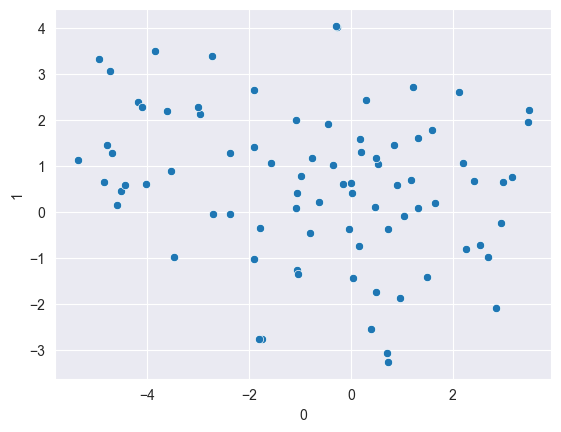

In [167]:
X_tsne_sc = X_scaled_data

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
xtsne_sc = tsne.fit_transform(X_tsne_sc)
df = pd.DataFrame(xtsne_sc)
df = df.applymap(pd.to_numeric)
df = df.round(2)
sns.scatterplot(x=df[0], y=df[1])

## 2.3. Определение оптимального количества кластеров

### 2.3.1. Метод локтя

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

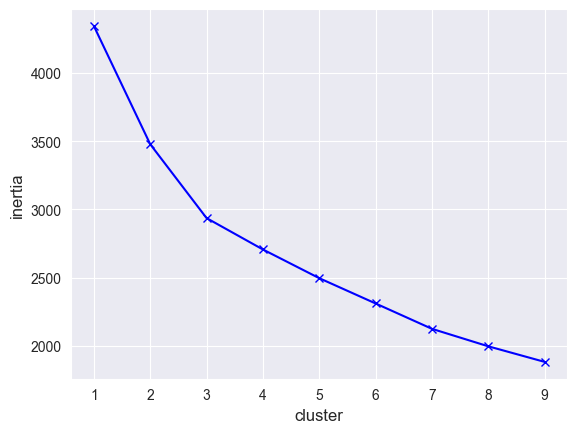

In [168]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X_scaled_data))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Исходя из графика, оптимальным является 2 - 3 кластера 

### 2.3.2. Коэффициент силуэта для KMeans

<Axes: xlabel='cluster', ylabel='silhouette'>

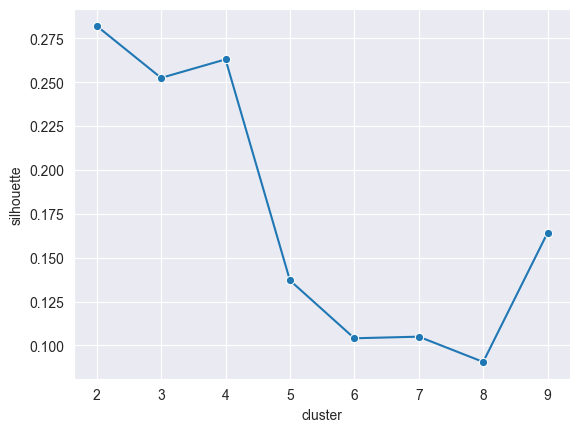

In [169]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Максимальное значение получено для 2-х кластеров

### 2.3.3. Коэффициент силуэта для EM-алгоритма

<Axes: xlabel='cluster', ylabel='silhouette'>

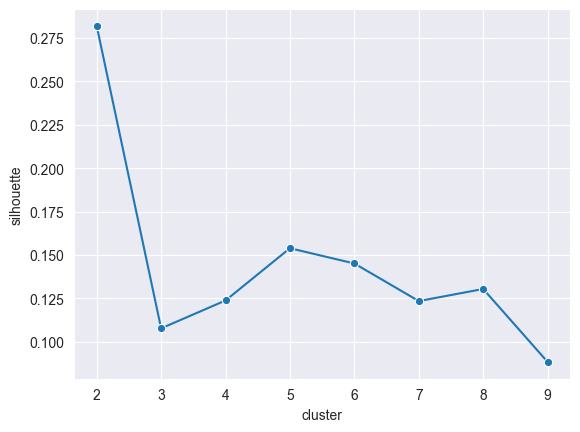

In [170]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette_gm(cluster_num, X):
    gm = GaussianMixture(n_components=cluster_num, random_state=42).fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette_gm = silhouette_score(X, gm.predict(X))
    return silhouette_gm

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_gm(cluster_num, X_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

При применении ЕМ-алгоритма максимальное значение коэффициента силуэта для 2-х кластеров

### 2.3.4. Коэффициент силуэта для Спектральной кластеризации

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.37664037e-13 3.35769293e-07 1.45878641e-05]
not reaching the requested tolerance 1.2218952178955078e-06.
Use iteration 668 instead with accuracy 
1.9514635763120235e-06.

  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[7.90890377e-16 4.40034480e-07 5.41435609e-06]
not reaching the requested tolerance 1.2218952178955078e-06.
  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:430: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
c:\Users\ak88r\AppData\Local\Programs\Python\P

<Axes: xlabel='cluster', ylabel='silhouette'>

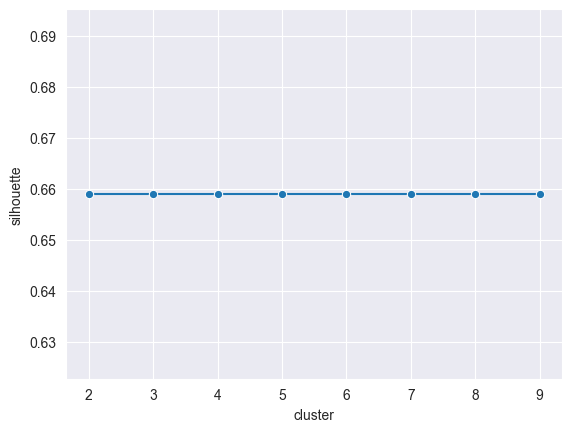

In [171]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette_spec(cluster_num, X):
    spectral_clustering = SpectralClustering(n_clusters=cluster_num, random_state=42)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette_spec = silhouette_score(X, spectral_clustering.fit_predict(X))
    return silhouette_spec

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_spec(cluster_num, X_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")


Спектральная кластеризация, судя по графику, не видит различий в количестве кластеров.

Учитывая результаты попробуем провести кластеризации при 2-х и 3-х кластерах для Kmeans, при 2-х кластерах
для других методов, и посмотреть на распределение признаков по кластерам

## 2.4. Кластеризация данных

### 2.4.1 Метод k-means

#### 2.4.1.1. Для 2-х кластеров

<Axes: xlabel='0', ylabel='1'>

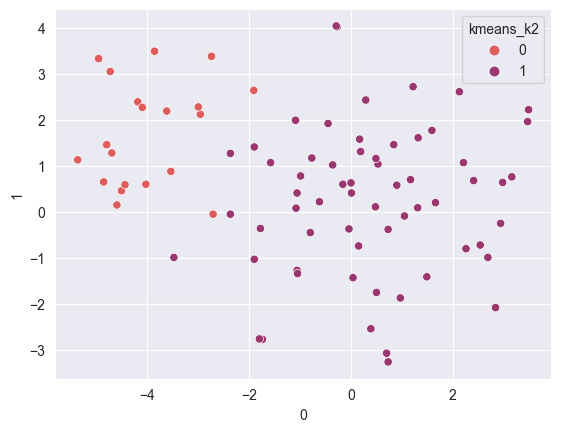

In [172]:
# инициализируем алгоритм k-means с количеством кластеров 2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_scaled_data)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_scaled_data)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['kmeans_k2'] = predictions

sns.scatterplot(x=df[0], y=df[1], hue=df.kmeans_k2, palette='flare')

In [173]:
# Количество объектов в полученных кластерах и средние значения признаков по кластерам
display(df['kmeans_k2'].value_counts())
regions_data['clusters'] = predictions
pd.set_option('display.max_columns', None)
regions_data.groupby('clusters').mean().round(2)

1    62
0    20
Name: kmeans_k2, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2286290685.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4152085.40,10695.38,12962.95,20801.60,27690.95,46663.25,186708.85,35416.7,1232.17,49.45,-9.65,138.20,-21.05,37.14,5.29,50.07,651182.43,27173.63,80.26,15.87,3.79,16.98,42146.08,-2330.22,8880.19,1216.78,11.81,23.76,0.27,1.840453e+08,1.538589e+09,229981.50,8046.42,47.42,11.52,915.10,15160.75,88.25,1850.45,444.45,33.95,7284.70,232.85,1.90,-48.58,-308.32,-7.63,-34.33,25.22,2.42,-571.77,-148.63,-0.27
1,1027530.35,-3750.03,3548.19,5985.24,8091.15,13293.42,48279.85,30495.6,1215.56,14.95,-2.89,29.18,-3.81,35.85,4.80,52.09,529238.05,38163.78,81.21,14.75,4.00,17.23,9561.74,-614.63,7684.38,1078.54,14.82,23.08,-0.09,3.675917e+07,2.743674e+08,186949.39,8541.69,69.48,9.60,304.71,4759.94,25.00,500.50,93.61,26.42,2607.68,55.31,0.95,-22.56,-66.68,-3.26,-34.82,8.26,5.81,-138.47,-23.13,-0.17


#### 2.4.1.2. Для 3-х кластеров

<Axes: xlabel='0', ylabel='1'>

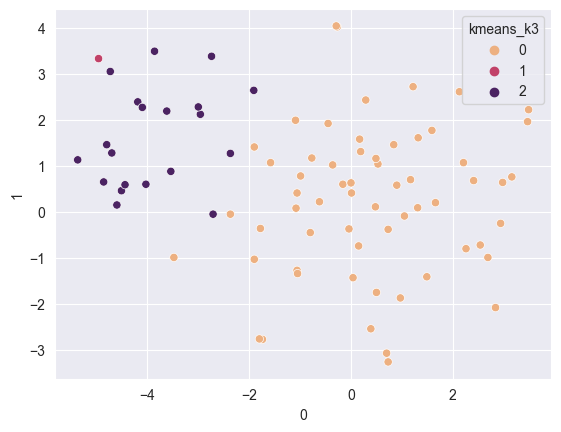

In [174]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_scaled_data)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_scaled_data)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['kmeans_k3'] = predictions

sns.scatterplot(x=df[0], y=df[1], hue=df.kmeans_k3, palette='flare')

In [175]:
# Количество объектов в полученных кластерах и средние значения признаков по кластерам
display(df['kmeans_k3'].value_counts())
regions_data['clusters'] = predictions
display(regions_data[regions_data['clusters'] == 1]['region'])
regions_data.groupby('clusters').mean().round(2)

0    61
2    20
1     1
Name: kmeans_k3, dtype: int64

17    город Москва
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\1159960798.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1012295.85,-3632.52,3498.13,5908.49,8000.23,13078.26,47057.39,30590.3,1225.60,14.69,-2.60,29.03,-3.63,35.73,4.83,52.06,529078.48,38248.72,81.23,14.73,4.01,17.20,9410.62,-601.90,7663.77,1075.65,14.84,23.02,-0.09,3.629583e+07,2.737785e+08,187236.82,8565.84,69.09,9.70,301.51,4663.92,24.49,478.28,87.87,26.64,2558.84,54.05,0.97,-21.00,-71.21,-3.19,-37.17,9.60,6.31,-135.08,-22.10,-0.17
1,12678079.00,99138.33,29468.00,44887.00,65061.00,131277.00,698628.00,77283.0,3937.33,10.00,-1.00,440.00,-107.67,38.40,13.20,48.50,1567644.80,79529.77,75.60,18.90,5.30,13.80,123523.96,-3454.99,6995.50,1033.50,6.00,17.50,0.57,9.642624e+08,7.529105e+09,408674.00,15094.33,23.10,8.70,480.00,16228.00,103.00,4090.00,4599.00,151.00,6614.00,891.00,5.00,-28.67,135.00,1.33,83.67,567.67,10.00,6.00,-31.67,0.67
2,3616023.20,5192.57,11819.65,19090.60,25119.75,41420.30,157919.95,32788.5,1065.45,50.50,-10.62,118.10,-16.42,37.36,4.80,50.34,599748.79,24846.26,80.50,15.74,3.69,17.24,36908.89,-2227.02,8977.48,1227.82,12.21,24.22,0.24,1.390833e+08,1.177648e+09,218018.60,7645.13,50.94,11.26,916.10,14880.20,85.90,1738.75,236.70,27.05,7233.35,194.90,1.65,-53.05,-304.60,-8.08,-33.07,-6.83,0.68,-589.32,-151.35,-0.30


При проведении кластеризации по 3-м кластерам в отдельный кластер выделен город Москва.
Значение признаков по кластерам пока выглядит пропорциональным среднему количеству населения

### 2.4.2. EM-алгоритм

#### 2.4.2.1. Для 2-х кластеров

<Axes: xlabel='0', ylabel='1'>

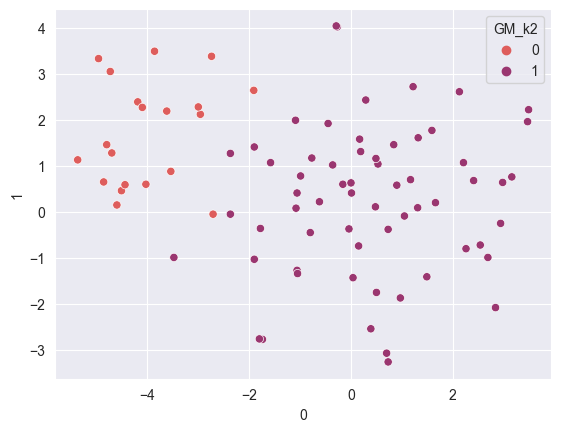

In [176]:
gm = GaussianMixture(n_components=2, random_state=42).fit(X_scaled_data)
gm_predict = gm.predict(X_scaled_data)
df['GM_k2'] = gm_predict

sns.scatterplot(x=df[0], y=df[1], hue=df.GM_k2, palette='flare')

In [177]:
df['GM_k2'].value_counts()
regions_data['clusters'] = gm_predict
regions_data.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\4061468136.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4152085.40,10695.38,12962.95,20801.60,27690.95,46663.25,186708.85,35416.7,1232.17,49.45,-9.65,138.20,-21.05,37.14,5.29,50.07,651182.43,27173.63,80.26,15.87,3.79,16.98,42146.08,-2330.22,8880.19,1216.78,11.81,23.76,0.27,1.840453e+08,1.538589e+09,229981.50,8046.42,47.42,11.52,915.10,15160.75,88.25,1850.45,444.45,33.95,7284.70,232.85,1.90,-48.58,-308.32,-7.63,-34.33,25.22,2.42,-571.77,-148.63,-0.27
1,1027530.35,-3750.03,3548.19,5985.24,8091.15,13293.42,48279.85,30495.6,1215.56,14.95,-2.89,29.18,-3.81,35.85,4.80,52.09,529238.05,38163.78,81.21,14.75,4.00,17.23,9561.74,-614.63,7684.38,1078.54,14.82,23.08,-0.09,3.675917e+07,2.743674e+08,186949.39,8541.69,69.48,9.60,304.71,4759.94,25.00,500.50,93.61,26.42,2607.68,55.31,0.95,-22.56,-66.68,-3.26,-34.82,8.26,5.81,-138.47,-23.13,-0.17


#### 2.4.2.2. Для 3-х кластеров

<Axes: xlabel='0', ylabel='1'>

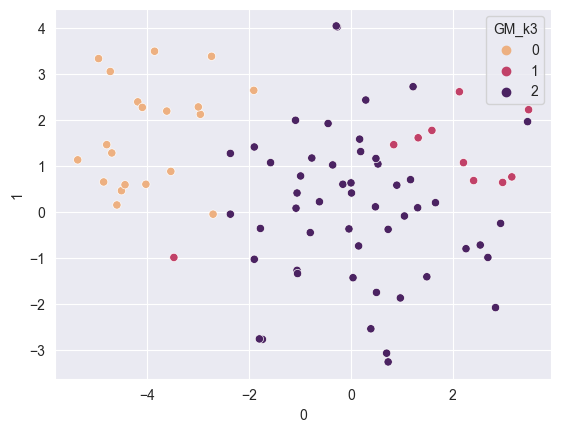

In [178]:
gm = GaussianMixture(n_components=3, random_state=42).fit(X_scaled_data)
gm_predict = gm.predict(X_scaled_data)
df['GM_k3'] = gm_predict

sns.scatterplot(x=df[0], y=df[1], hue=df.GM_k3, palette='flare')

In [179]:
display(df['GM_k3'].value_counts())
regions_data['clusters'] = gm_predict
display(regions_data.groupby('clusters').mean().round(2))

display(regions_data[regions_data['clusters'] == 0]['region'])
display(regions_data[regions_data['clusters'] == 1]['region'])
display(regions_data[regions_data['clusters'] == 2]['region'])

2    52
0    20
1    10
Name: GM_k3, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3769885131.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(regions_data.groupby('clusters').mean().round(2))


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4152085.4,10695.38,12962.95,20801.60,27690.95,46663.25,186708.85,35416.7,1232.17,49.45,-9.65,138.20,-21.05,37.14,5.29,50.07,651182.43,27173.63,80.26,15.87,3.79,16.98,42146.08,-2330.22,8880.19,1216.78,11.81,23.76,0.27,1.840453e+08,1.538589e+09,229981.50,8046.42,47.42,11.52,915.10,15160.75,88.25,1850.45,444.45,33.95,7284.70,232.85,1.90,-48.58,-308.32,-7.63,-34.33,25.22,2.42,-571.77,-148.63,-0.27
1,795453.1,-419.87,5477.70,8272.60,10395.80,14002.20,31120.50,23049.7,744.40,20.40,-4.43,27.80,-1.17,34.16,8.02,57.83,303646.02,16239.69,81.00,16.05,2.88,19.77,9251.89,-250.37,5204.30,779.26,19.63,28.25,1.00,1.723291e+07,9.231467e+07,138586.90,4717.57,42.53,3.83,149.90,2909.90,17.50,356.10,77.70,54.80,1339.90,34.50,0.30,1.80,97.43,-1.17,-5.30,12.43,17.37,-11.53,-14.83,-0.20
2,1072160.6,-4390.44,3177.13,5545.37,7647.94,13157.12,51579.73,31927.5,1306.17,13.90,-2.59,29.44,-4.32,36.17,4.19,50.99,572621.14,42379.95,81.26,14.51,4.22,16.74,9621.33,-684.68,8161.32,1136.09,13.90,22.08,-0.30,4.051422e+07,3.093775e+08,196249.87,9277.10,74.66,10.71,334.48,5115.71,26.44,528.27,96.67,20.96,2851.48,59.31,1.08,-27.25,-98.24,-3.67,-40.49,7.46,3.59,-162.88,-24.72,-0.16


9          Московская область
17               город Москва
27      город Санкт-Петербург
31         Краснодарский край
34         Ростовская область
36        Республика Дагестан
42        Ставропольский край
43    Республика Башкортостан
46       Республика Татарстан
49              Пермский край
51      Нижегородская область
54          Самарская область
58       Свердловская область
59          Тюменская область
60        Челябинская область
64             Алтайский край
65          Красноярский край
66          Иркутская область
67        Кемеровская область
68      Новосибирская область
Name: region, dtype: object

12                 Смоленская область
13                 Тамбовская область
26                  Псковская область
29                Республика Калмыкия
32               Астраханская область
37               Республика Ингушетия
38    Кабардино-Балкарская Республика
39    Карачаево-Черкесская Республика
41               Чеченская Республика
45                Республика Мордовия
Name: region, dtype: object

0                  Белгородская область
1                      Брянская область
2                  Владимирская область
3                   Воронежская область
4                    Ивановская область
5                     Калужская область
6                   Костромская область
7                       Курская область
8                      Липецкая область
10                    Орловская область
11                    Рязанская область
14                     Тверская область
15                     Тульская область
16                  Ярославская область
18                   Республика Карелия
19                      Республика Коми
20                Архангельская область
21                  Вологодская область
22              Калининградская область
23                Ленинградская область
24                   Мурманская область
25                 Новгородская область
28                    Республика Адыгея
30                      Республика Крым
33                Волгоградская область


EM-алгоритм для 2-х компонентов справился аналогично Kmeans.
При этом, для 3-х компонентной кластеризации результат отличается.
Исходя из цели исследования примечателен кластер №1 - учитывая, что средняя численность
меньше, чем в других кластерах, количество людей с ограниченными возможностями превышает средние
показатели кластера №2 по абсолютным показателям и кластер №0 по относительным. % малоимущего населения
в данном кластере самый высокий. Производственные показатели по энергетике и обрабатвающему производству 
самые низкие, такая же ситуация с показателем торгового оборота н адушу населения.
Можно сделать вывод, что на стандартизированной выборке на основании первоначального датасета лучше
справился EM-алгоритм для 3-х компонентной кластеризации.

### 2.4.3. Спектральная кластеризация

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.37664037e-13 3.35769293e-07 1.45878641e-05]
not reaching the requested tolerance 1.2218952178955078e-06.
Use iteration 668 instead with accuracy 
1.9514635763120235e-06.

  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[7.90890377e-16 4.40034480e-07 5.41435609e-06]
not reaching the requested tolerance 1.2218952178955078e-06.
  _, diffusion_map = lobpcg(


<Axes: xlabel='0', ylabel='1'>

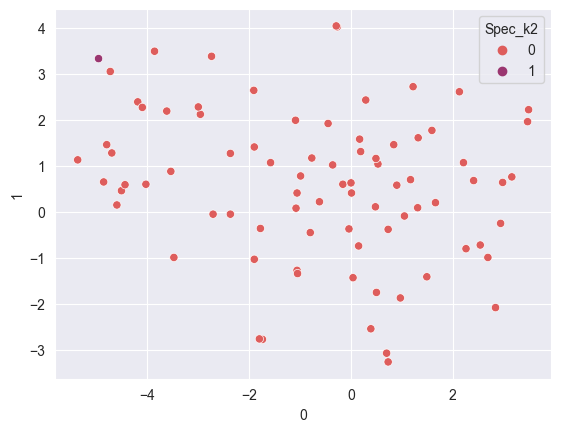

In [180]:
# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=2, random_state=42)

spectral_clustering.fit_predict(X_scaled_data)
# получаем результаты кластеризации

spectral_predictions = spectral_clustering.labels_
df['Spec_k2'] = spectral_predictions

sns.scatterplot(x=df[0], y=df[1], hue=df.Spec_k2, palette='flare')

In [181]:
# Количество объектов в полученных кластерах и средние значения признаков по кластерам
display(df['Spec_k2'].value_counts())
regions_data['clusters'] = spectral_predictions
display(regions_data[regions_data['clusters'] == 1]['region'])
regions_data.groupby('clusters').mean().round(2)

0    81
1     1
Name: Spec_k2, dtype: int64

17    город Москва
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\674849769.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1655191.49,-1453.49,5552.83,9163.33,12227.27,20076.3,74430.86,31133.06,1186.06,23.53,-4.58,51.02,-6.79,36.14,4.82,51.64,546527.94,34939.47,81.05,14.98,3.93,17.21,16200.32,-1003.16,7988.14,1113.22,14.19,23.31,-0.01,6.167546e+07,4.969561e+08,194837.26,8338.51,64.61,10.08,453.26,7186.46,39.65,789.51,124.62,26.74,3713.04,88.83,1.14,-28.91,-128.84,-4.40,-36.16,5.54,4.92,-247.24,-54.01,-0.20
1,12678079.00,99138.33,29468.00,44887.00,65061.00,131277.0,698628.00,77283.00,3937.33,10.00,-1.00,440.00,-107.67,38.40,13.20,48.50,1567644.80,79529.77,75.60,18.90,5.30,13.80,123523.96,-3454.99,6995.50,1033.50,6.00,17.50,0.57,9.642624e+08,7.529105e+09,408674.00,15094.33,23.10,8.70,480.00,16228.00,103.00,4090.00,4599.00,151.00,6614.00,891.00,5.00,-28.67,135.00,1.33,83.67,567.67,10.00,6.00,-31.67,0.67


Спектральная кластеризация определяет только 2 кластера, и один состоит из одного субъекта - это город Москва.
В следующей итерации попробуем исключить город Москва из датасета и снова провести кластеризацию
Это не помешает реализовать цель проекта, так как столичный мегаполис, как наиболее развитый регион,
предлагается не рассматривать в качестве приоритетного для работы НКО

## 2.5. Кластеризация данных при условии исключения из датасета г. Москва 

In [182]:
# сформируем датасет без г. Москва
regions_data_2 = regions_data[regions_data['region'] != 'город Москва']
regions_data_2.drop(columns='clusters', inplace=True)
display(regions_data_2.info())

X_2 = regions_data_2.iloc[:,1:].applymap(pd.to_numeric)
X_2.head()
X_2.columns = X_2.columns.astype(str)

# Выполним стандартизацию данных
columns_names = X_2.columns
X_2_scaled = scaler.fit_transform(X_2)
X_scaled_data_2 = pd.DataFrame(X_2_scaled, columns = columns_names)
display(X_scaled_data_2.round(2).head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 81
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     81 non-null     object 
 1   population_2020            81 non-null     int64  
 2   population_growth          81 non-null     float64
 3   18_30_dis                  81 non-null     float64
 4   31_40_dis                  81 non-null     float64
 5   41_50_dis                  81 non-null     float64
 6   51_60_dis                  81 non-null     float64
 7   60_dis                     81 non-null     float64
 8   cash_2020                  81 non-null     float64
 9   cash_growth                81 non-null     float64
 10  cmr_2020                   81 non-null     float64
 11  cmr_growth                 81 non-null     float64
 12  cmu_2020                   81 non-null     float64
 13  cmu_growth                 81 non-null     float64
 

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2364061955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2.drop(columns='clusters', inplace=True)


None

,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
0,-0.08,0.01,-0.10,0.04,0.25,0.53,0.87,0.15,-0.40,-0.06,0.09,-0.56,0.10,-4.11,-2.51,-3.84,0.25,0.01,1.03,-0.82,-0.95,0.27,-0.26,0.10,0.35,0.30,-1.43,-1.44,-0.11,-0.55,0.42,0.82,0.73,-0.72,-0.77,-0.65,-0.48,-0.63,-0.40,-0.77,2.06,-0.52,-0.36,-0.52,0.67,0.82,0.47,0.29,-0.62,1.78,0.61,0.42,-0.14
1,-0.33,-0.53,-0.38,-0.35,-0.23,-0.14,-0.12,-0.22,-0.03,-0.42,-0.27,-0.48,-0.69,0.62,-0.26,-0.00,-0.49,-0.26,2.68,-2.60,-1.64,3.10,-0.46,0.37,0.76,0.07,-0.12,-0.04,-0.63,-0.69,-0.40,0.60,0.65,0.55,-0.44,-0.71,-0.37,-0.35,-0.35,0.00,-0.52,-0.22,-0.65,0.86,-0.19,0.78,0.18,0.22,0.22,-0.75,0.56,0.36,1.29
2,-0.21,-0.60,-0.33,-0.30,-0.25,-0.15,0.10,-0.46,-0.45,-0.49,0.35,-0.00,0.54,-0.09,-0.45,0.55,-0.33,-0.13,0.15,0.21,-0.71,-0.50,-0.42,-0.11,0.85,-0.02,-0.34,0.54,0.80,-0.38,0.05,-0.33,-0.04,0.06,-0.25,-0.21,-0.30,-0.60,-0.27,-0.71,-0.40,-0.23,-0.62,-0.06,-0.35,-0.53,-0.63,-1.03,-0.06,-0.17,-0.35,0.22,-0.14
3,0.48,-0.15,0.19,0.34,0.54,1.03,0.94,0.08,-0.37,-0.42,0.40,0.15,-0.51,-0.54,-0.59,0.91,-0.21,-0.13,1.17,-0.90,-1.15,1.21,0.20,-0.10,-1.31,-1.11,-1.16,-0.34,-0.47,1.19,0.09,1.12,0.51,0.27,1.38,0.08,0.06,-0.30,0.31,-0.07,-0.12,0.10,0.83,-0.52,-0.41,-0.57,0.47,0.06,0.46,0.14,-0.32,-0.32,-1.22
4,-0.47,-0.49,-0.53,-0.55,-0.54,-0.54,-0.36,-0.43,-0.81,-0.74,0.66,-0.56,0.63,1.32,-0.65,-0.43,-0.67,-0.26,-0.81,1.03,-0.02,0.40,-0.59,0.28,0.59,1.24,-0.10,0.36,-1.42,-0.52,-0.52,-0.28,0.11,0.43,-0.49,-0.42,-0.56,-0.73,-0.50,-0.22,-0.48,-0.50,-0.55,-0.52,0.72,0.30,0.05,0.13,0.48,-0.26,0.52,0.40,-0.14


### 2.5.1. Определение оптимального количества кластеров - метод локтя 

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

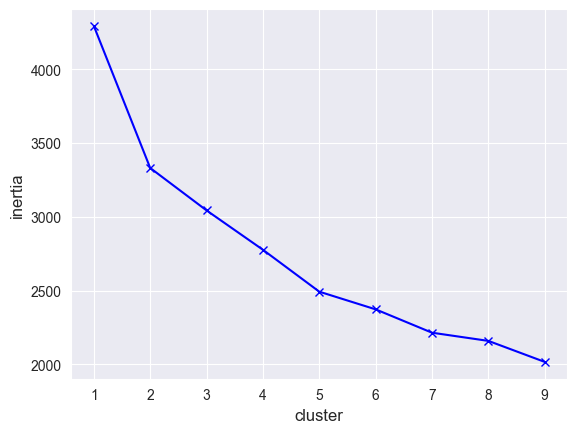

In [183]:
# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X_scaled_data_2))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

### 2.5.2. Коэффициент силуэта для Kmeans

<Axes: xlabel='cluster', ylabel='silhouette'>

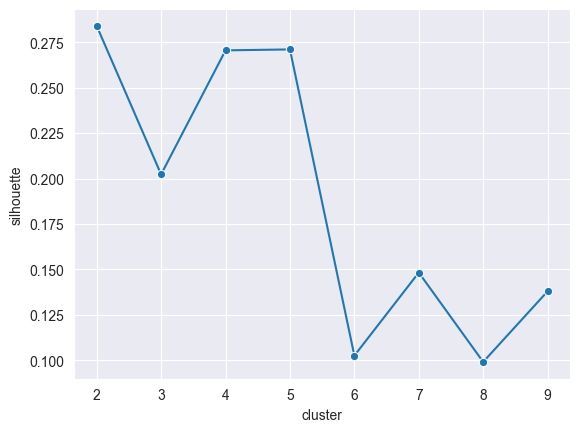

In [184]:
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaled_data_2))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.5.3. Коэффициент силуэта для EM-алгоритма

<Axes: xlabel='cluster', ylabel='silhouette'>

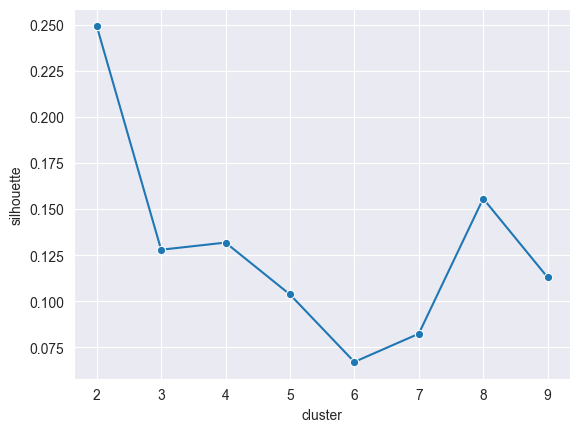

In [185]:
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_gm(cluster_num, X_scaled_data_2))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.5.4. Коэффициент силуэта для спектральной кластеризации

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.71111561e-13 3.64669174e-07 3.37752094e-06]
not reaching the requested tolerance 1.2069940567016602e-06.
Use iteration 1323 instead with accuracy 
8.852333484440093e-07.

  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[4.54749580e-14 3.85031418e-07 2.27066416e-06]
not reaching the requested tolerance 1.2069940567016602e-06.
  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 960 with accuracies 
[5.52287286e-14 1.51226849e-07 1.08201537e-06 8.95695594e-06]
not reaching the requested tolerance 1.2069940567016602e-06.
Use iteration 146 inst

<Axes: xlabel='cluster', ylabel='silhouette'>

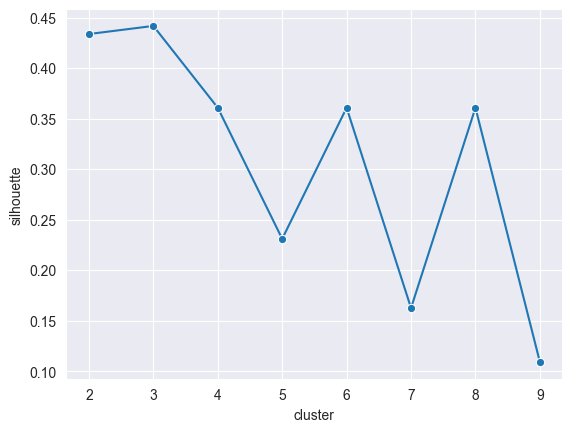

In [186]:
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_spec(cluster_num, X_scaled_data_2))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

После исключенния из датасета г. Москва  метод локтя и коэффициент силуэта для Kmeans показывает оптимальным распределение по 2-м кластерам,
но также высокие значения дл 4-х и 5-ти кластеров. \для EM-алгоритма коэффициент силуэта имеет самое высокое значение для 2-х кластеров,
тода как спктральная кластеризация показала максимум для 3-х кластеров. Проведем кластеризацию.

### 2.5.5. Визуализация распределения, кластеризация с помощью Kmeans

<Axes: xlabel='0', ylabel='1'>

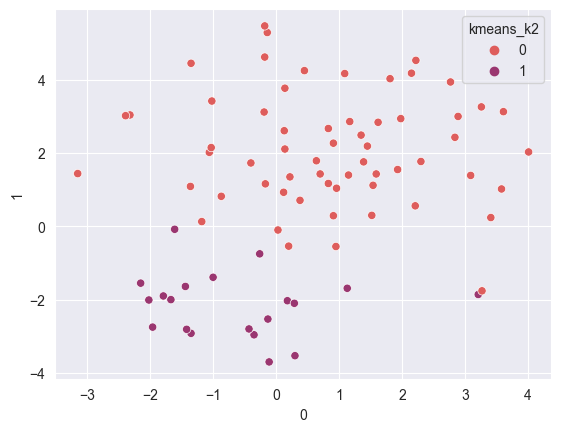

In [187]:
X_tsne_2 = X_scaled_data_2

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
xtsne_2 = tsne.fit_transform(X_tsne_2)
df_2 = pd.DataFrame(xtsne_2)
df_2 = df_2.applymap(pd.to_numeric)
df_2 = df_2.round(2)

# инициализируем алгоритм k-means с количеством кластеров 2
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans_2.fit(X_scaled_data_2)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans_2.predict(X_scaled_data_2)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans_2.labels_

# сохраним предсказания в датафрейм
df_2['kmeans_k2'] = predictions

sns.scatterplot(x=df_2[0], y=df_2[1], hue=df_2.kmeans_k2, palette='flare')

In [188]:
regions_data_2['clusters'] = predictions
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = predictions


0    61
1    20
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1012295.85,-3632.52,3498.13,5908.49,8000.23,13078.26,47057.39,30590.3,1225.60,14.69,-2.60,29.03,-3.63,35.73,4.83,52.06,529078.48,38248.72,81.23,14.73,4.01,17.20,9410.62,-601.90,7663.77,1075.65,14.84,23.02,-0.09,3.629583e+07,2.737785e+08,187236.82,8565.84,69.09,9.70,301.51,4663.92,24.49,478.28,87.87,26.64,2558.84,54.05,0.97,-21.00,-71.21,-3.19,-37.17,9.60,6.31,-135.08,-22.10,-0.17
1,3616023.20,5192.57,11819.65,19090.60,25119.75,41420.30,157919.95,32788.5,1065.45,50.50,-10.62,118.10,-16.42,37.36,4.80,50.34,599748.79,24846.26,80.50,15.74,3.69,17.24,36908.89,-2227.02,8977.48,1227.82,12.21,24.22,0.24,1.390833e+08,1.177648e+09,218018.60,7645.13,50.94,11.26,916.10,14880.20,85.90,1738.75,236.70,27.05,7233.35,194.90,1.65,-53.05,-304.60,-8.08,-33.07,-6.83,0.68,-589.32,-151.35,-0.30


### 2.5.6. Кластеризация с помощью EM-алгоритма

<Axes: xlabel='0', ylabel='1'>

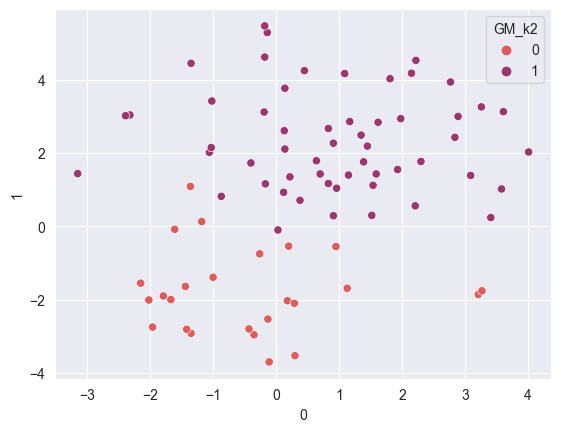

In [189]:
gm_2 = GaussianMixture(n_components=2, random_state=42).fit(X_scaled_data_2)
gm_predict_2 = gm_2.predict(X_scaled_data_2)
df_2['GM_k2'] = gm_predict_2

sns.scatterplot(x=df_2[0], y=df_2[1], hue=df_2.GM_k2, palette='flare')

In [190]:
regions_data_2['clusters'] = gm_predict_2
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\72139981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = gm_predict_2


1    56
0    25
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\72139981.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3297478.56,3290.41,11441.16,18610.72,24170.12,38663.28,142603.32,32078.64,1055.04,47.8,-10.36,109.00,-14.43,38.16,4.71,51.13,560059.32,24094.14,80.94,15.56,3.43,17.37,33718.91,-1999.11,8559.48,1134.33,12.46,24.74,0.24,1.255763e+08,1.039901e+09,212813.44,7793.52,49.84,11.97,824.00,13484.72,78.56,1547.40,206.88,22.92,6577.48,175.20,1.48,-51.49,-294.57,-8.05,-41.53,-9.19,0.71,-506.07,-130.36,-0.28
1,922027.62,-3571.30,2924.11,4945.75,6895.64,11778.54,43996.73,30710.93,1244.55,12.7,-2.00,25.14,-3.38,35.23,4.87,51.86,540487.15,39781.14,81.10,14.72,4.16,17.14,8379.52,-558.55,7733.08,1103.80,14.96,22.68,-0.12,3.314830e+07,2.545701e+08,186812.18,8581.80,71.20,9.24,287.75,4374.73,22.29,451.16,87.89,28.45,2434.27,50.27,0.98,-18.83,-54.85,-2.77,-33.76,12.12,6.80,-131.69,-19.93,-0.17


### 2.5.7. Спектральная кластеризация

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 960 with accuracies 
[5.52287286e-14 1.51226849e-07 1.08201537e-06 8.95695594e-06]
not reaching the requested tolerance 1.2069940567016602e-06.
Use iteration 146 instead with accuracy 
9.651218398581088e-07.

  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.08386458e-14 4.07079003e-07 2.75846421e-06 6.94944043e-07]
not reaching the requested tolerance 1.2069940567016602e-06.
  _, diffusion_map = lobpcg(


<Axes: xlabel='0', ylabel='1'>

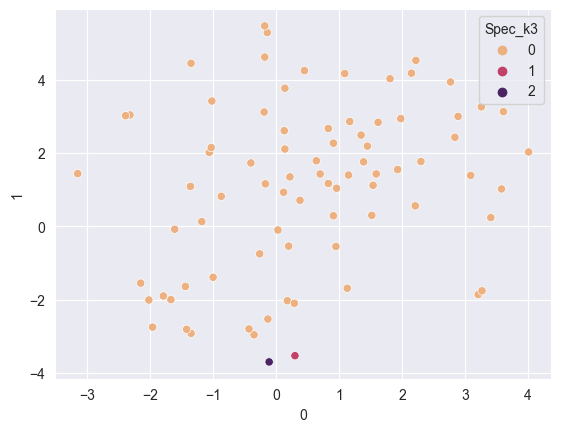

In [191]:
# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit_predict(X_scaled_data_2)
# получаем результаты кластеризации

spectral_predictions = spectral_clustering.labels_
df_2['Spec_k3'] = spectral_predictions

sns.scatterplot(x=df_2[0], y=df_2[1], hue=df_2.Spec_k3, palette='flare')

In [192]:
regions_data_2['clusters'] = spectral_predictions
display(regions_data_2[regions_data_2['clusters'] == 1]['region'])
display(regions_data_2[regions_data_2['clusters'] == 2]['region'])
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\217306356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = spectral_predictions


27    город Санкт-Петербург
Name: region, dtype: object

9    Московская область
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\217306356.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,under_age_16_2020,older_work_age_2020,work_age_2020,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,poverty_percent,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1531412.46,-3110.02,5330.28,8799.37,11716.14,19090.86,67569.18,30702.85,1167.27,23.8,-4.61,47.11,-6.30,36.59,4.87,52.85,539414.68,34665.40,81.08,14.96,3.93,17.26,14907.34,-940.40,7930.75,1108.7,14.39,23.41,-0.04,5.713222e+07,4.376198e+08,191781.75,8123.09,65.58,10.08,449.42,6968.94,36.44,746.97,116.94,26.95,3647.67,76.25,1.16,-28.57,-129.92,-4.14,-39.05,4.85,5.11,-247.46,-37.60,-0.19
1,5398064.00,38828.33,12831.00,20788.00,28925.00,54767.00,427942.00,49207.00,2289.67,0.0,0.00,191.00,-18.33,-13.30,0.00,-36.70,971158.00,55194.97,82.00,14.20,3.70,15.70,55439.00,-3706.33,12022.40,1579.9,5.90,19.80,2.33,2.036175e+08,2.564838e+09,283494.00,11344.67,14.70,9.40,443.00,10395.00,71.00,1484.00,375.00,20.00,3099.00,457.00,0.00,-44.00,-382.67,-0.67,61.67,23.67,-1.67,-139.33,-1026.00,-1.00
2,7690863.00,89131.00,15856.00,26292.00,35909.00,63235.00,262993.00,47046.00,1567.00,26.0,-7.00,220.00,-33.33,49.90,5.70,44.40,683845.10,36335.70,77.80,17.30,4.40,14.80,79106.98,-3258.67,8488.30,1004.3,6.80,19.40,0.27,2.786495e+08,3.116646e+09,347566.00,22350.33,37.70,11.00,767.00,21162.00,262.00,3455.00,481.00,17.00,9491.00,714.00,0.00,-41.00,210.33,-28.67,94.00,42.00,-3.00,-338.00,-378.33,-0.67


## 2.6. Кластеризация с учетом формирования дополнительных признаков

Попробуем модифицировать датасет: имея данные о доле малоимущего населения и его распределения по группам, высчитаем
абсолютные значения в виде количества человек (общее и по социальным группам), и дополнительно рассчитаем ряд  относительных
показателей (на душу населения)

In [193]:
regions_data_2['poverty'] = regions_data_2['population_2020'] * regions_data_2['poverty_percent'] / 100
regions_data_2['under_age_16_2020_abs'] = regions_data_2['under_age_16_2020'] * regions_data_2['poverty'] / 100
regions_data_2['work_age_2020_abs'] = regions_data_2['work_age_2020'] * regions_data_2['poverty'] / 100
regions_data_2['older_work_age_2020_abs'] = regions_data_2['older_work_age_2020'] * regions_data_2['poverty'] / 100

regions_data_2.drop(columns=['poverty_percent', 'under_age_16_2020', 'work_age_2020', 'older_work_age_2020', 'clusters'], inplace=True)


cols_dis = ['18_30_dis', '31_40_dis', '41_50_dis', '51_60_dis', '60_dis']
regions_data_2['dis_pc'] = regions_data_2[cols_dis].sum(axis=1) / regions_data_2['population_2020']


regions_data_2['born_pc'] = regions_data_2['born_2020'] / regions_data_2['population_2020']

regions_data_2['energy_pc'] = regions_data_2['energy_2020'] / regions_data_2['population_2020']
regions_data_2['manufacture_pc'] = regions_data_2['manufacture_2020'] / regions_data_2['population_2020']
regions_data_2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 81
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     81 non-null     object 
 1   population_2020            81 non-null     int64  
 2   population_growth          81 non-null     float64
 3   18_30_dis                  81 non-null     float64
 4   31_40_dis                  81 non-null     float64
 5   41_50_dis                  81 non-null     float64
 6   51_60_dis                  81 non-null     float64
 7   60_dis                     81 non-null     float64
 8   cash_2020                  81 non-null     float64
 9   cash_growth                81 non-null     float64
 10  cmr_2020                   81 non-null     float64
 11  cmr_growth                 81 non-null     float64
 12  cmu_2020                   81 non-null     float64
 13  cmu_growth                 81 non-null     float64
 

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3999120831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['poverty'] = regions_data_2['population_2020'] * regions_data_2['poverty_percent'] / 100
C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3999120831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['under_age_16_2020_abs'] = regions_data_2['under_age_16_2020'] * regions_data_2['poverty'] / 100
C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3999120831.py:3: Set

Описание полученных признаков в датасете:

* population_2020 - численность населения в регионе в 2020 году
* *_dis - численность населения с ограниченными возможностями в соответствующей возрастной группе (данные за 2020 год)
* cash_2020 - подушевой доход населения в месяц, руб. (данные за 2020 год)
* cmr_2020 - показатель детской смертности в сельской местности (данные за 2020 год)
* cmu_2020 - показатель детской смертности в городской местности (данные за 2020 год)
* under_age_16_2020_abs -численность малоимущего населения в возрасте до 16 лет
* work_age_2020_abs - численность малоимущего населения в работоспособном возрасте
* older_work_age_2020_abs - численность малоимущего населения старше трудоспособного возраста
* grp_2020 - влаовый региональный продукт на душу населенния, руб. (за 2020 год)
* good_conditions - доля населения с хорошими жилищными условиями
* bad_conditions - доля населения с плохими жилищными условиями
* worst_conditions - доля населения с неприемлимыми условиями
* living_area - жилплощадь в расчета на человека, метр квадратный (данные за 2020 год)
* born_2020 - количество новорожденных за 2020 год
* inj_2016 - количество травм, отравлений  в год (данные за 2016 год)
* onco_2016 - количество новообразований в год (данные за 2016 год)
* poverty - Численность малоимущего населения в регионе (данные за 2020 год)
* welfare_2020 - % расходов на социальную политику в регионе (данные за 2020 год)
* energy_2020 - обеспечение электрической энергии, газом и паром
* manufacture_2020 - обрабатывающие производства
* retail_2020 - оборот розничной торговли на душу населения, руб.
* alco_2018 - заболевание алкоголизмом, данные за 2018 год
* drug_2018 - заболевание наркоманией, данные за 2018 год
* minor_crime_2020 - количество преступлений, совершенных несовершеннолетними 
* recidivist_2020 - количество преступлений, совершенных повторно
* group_crime_2020 - количество преступлений, совершенных группой лиц 
* group_agreem_2020 - количество преступлений, совершенных группой лиц по предварительному сговору
* organized_group_2020 - количество преступлений, совершенных организованными преступными группировками
* crime_organization_2020 - количество преступлений, совершенных криминальными организациями
* alco_crimes_2020 - количество преступлений в состоянии алкогольного опъянения
* drug_crimes_2020 - количество преступлений в состоянии наркотического опъянения
* toxic_crimes_2020 - количество преступлений в состоянии токсического опъянения
* *_pc = Дополнительно рассчитанные показатели на душу населения в регионе
* *_growth - абсолютный прирост по показателю за 2017 - 2020 годы

### 2.6.1. Стандартизация и визуализация распределения данных

<Axes: xlabel='0', ylabel='1'>

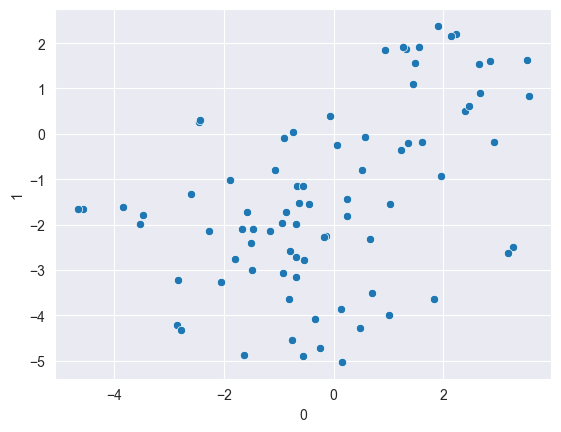

In [194]:
X_2_abs = regions_data_2.iloc[:,1:].applymap(pd.to_numeric)
columns_names = X_2_abs.columns
scaler = StandardScaler()
# Выполним стандартизацию данных
X_2_abs_scaled = scaler.fit_transform(X_2_abs)
X_scaled_data_abs = pd.DataFrame(X_2_abs_scaled, columns = columns_names)
X_scaled_data_abs = X_scaled_data_abs.round(2)

X_tsne_abs = X_scaled_data_abs

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
xtsne_abs = tsne.fit_transform(X_tsne_abs)
df_abs = pd.DataFrame(xtsne_abs)
df_abs = df_abs.applymap(pd.to_numeric)
df_abs = df_abs.round(2)
sns.scatterplot(x=df_abs[0], y=df_abs[1])

### 2.6.2. Оптимальное количество кластеров - метод локтя

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

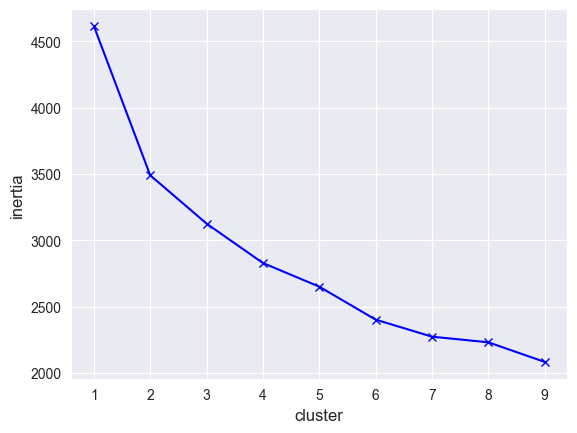

In [195]:
# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X_scaled_data_abs))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

### 2.6.3. Коэффициент силуэта для KMeans

<Axes: xlabel='cluster', ylabel='silhouette'>

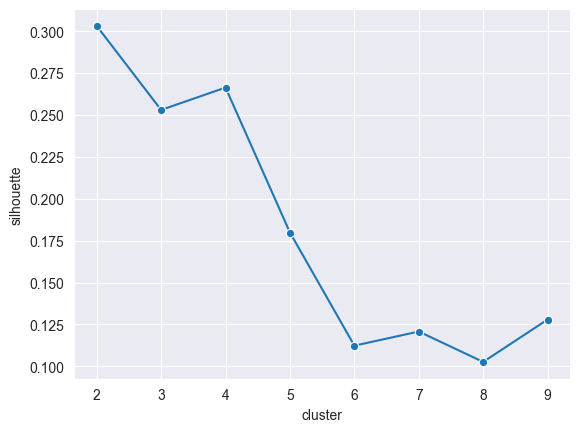

In [196]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaled_data_abs))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.6.4. Коэффициент силуэта для EM-алгоритма

<Axes: xlabel='cluster', ylabel='silhouette'>

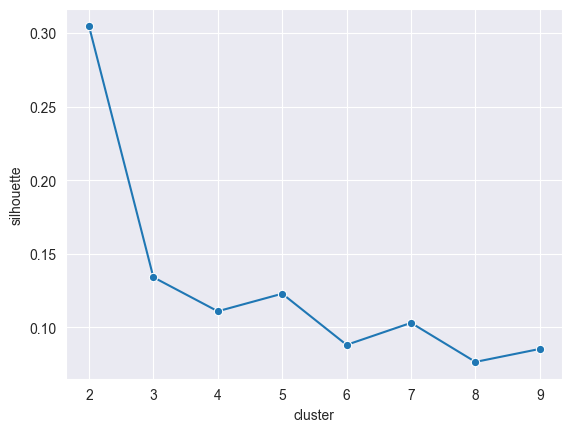

In [197]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_gm(cluster_num, X_scaled_data_abs))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.6.5. Коэффициент силуэта для спектральной кластеризации

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[5.23120422e-07 1.30514921e-12 1.03759449e-05]
not reaching the requested tolerance 1.2069940567016602e-06.
Use iteration 814 instead with accuracy 
1.2696647705581725e-06.

  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.42809859e-15 8.35068844e-07 2.97392412e-06]
not reaching the requested tolerance 1.2069940567016602e-06.
  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:430: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
c:\Users\ak88r\AppData\Local\Programs\Python\P

<Axes: xlabel='cluster', ylabel='silhouette'>

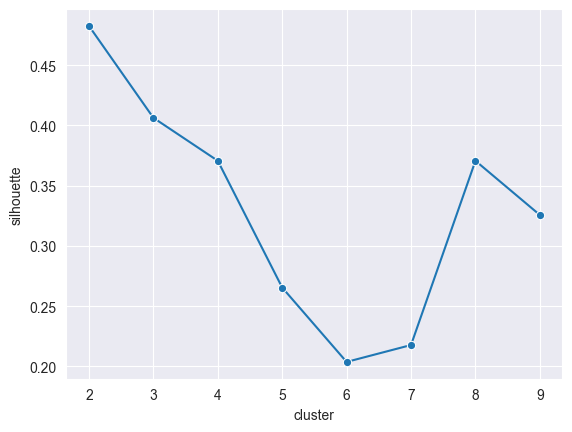

In [198]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_spec(cluster_num, X_scaled_data_abs))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Оптимальное количество кластеров также равно 2-м, проведем кластеризацию

### 2.6.6. - Кластеризация с помощью Kmeans

<Axes: xlabel='0', ylabel='1'>

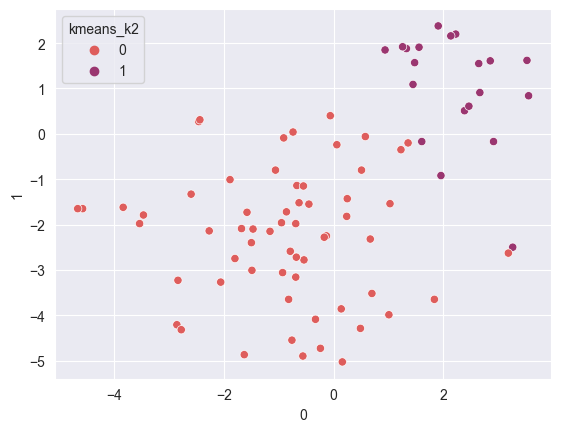

In [199]:
# инициализируем алгоритм k-means с количеством кластеров 2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_scaled_data_abs)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_scaled_data_abs)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df_abs['kmeans_k2'] = predictions

sns.scatterplot(x=df_abs[0], y=df_abs[1], hue=df_abs.kmeans_k2, palette='flare')

In [200]:
regions_data_2['clusters'] = predictions
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = predictions


0    61
1    20
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1012295.85,-3632.52,3498.13,5908.49,8000.23,13078.26,47057.39,30590.3,1225.60,14.69,-2.60,29.03,-3.63,529078.48,38248.72,81.23,14.73,4.01,17.20,9410.62,-601.90,7663.77,1075.65,23.02,-0.09,3.629583e+07,2.737785e+08,187236.82,8565.84,69.09,9.70,301.51,4663.92,24.49,478.28,87.87,26.64,2558.84,54.05,0.97,-21.00,-71.21,-3.19,-37.17,9.60,6.31,-135.08,-22.10,-0.17,140639.16,51692.95,75280.49,6814.04,0.08,0.01,39.72,287.72
1,3616023.20,5192.57,11819.65,19090.60,25119.75,41420.30,157919.95,32788.5,1065.45,50.50,-10.62,118.10,-16.42,599748.79,24846.26,80.50,15.74,3.69,17.24,36908.89,-2227.02,8977.48,1227.82,24.22,0.24,1.390833e+08,1.177648e+09,218018.60,7645.13,50.94,11.26,916.10,14880.20,85.90,1738.75,236.70,27.05,7233.35,194.90,1.65,-53.05,-304.60,-8.08,-33.07,-6.83,0.68,-589.32,-151.35,-0.30,408682.23,155883.82,209028.65,19883.32,0.07,0.01,38.52,310.04


### 2.6.7. - Кластеризация с помощью EM-алгоритма

<Axes: xlabel='0', ylabel='1'>

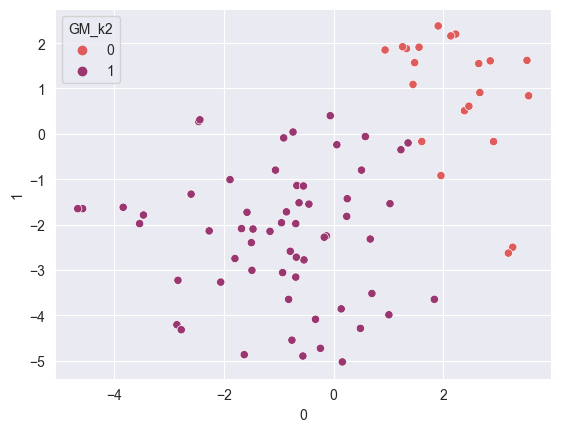

In [201]:
gm = GaussianMixture(n_components=2, random_state=42).fit(X_scaled_data_abs)
gm_predict = gm.predict(X_scaled_data_abs)
df_abs['GM_k2'] = gm_predict

sns.scatterplot(x=df_abs[0], y=df_abs[1], hue=df_abs.GM_k2, palette='flare')

In [202]:
regions_data_2['clusters'] = gm_predict
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3583781992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = gm_predict


1    60
0    21
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3583781992.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3514247.14,5958.97,12488.19,20101.24,25923.81,41179.52,151780.05,32398.38,1048.24,51.52,-11.68,117.67,-15.52,579333.59,23973.67,80.49,15.86,3.58,17.33,36585.18,-2117.46,8674.57,1182.44,24.73,0.34,1.336358e+08,1.122138e+09,213539.38,7485.54,48.71,10.76,872.76,14214.19,82.05,1657.43,226.86,25.76,6896.19,185.67,1.57,-50.71,-286.95,-7.81,-33.02,-7.79,0.65,-561.35,-144.27,-0.29,403585.93,154738.19,206271.65,19827.11,0.07,0.01,37.49,295.66
1,1004522.02,-4047.84,3125.45,5335.07,7433.48,12690.17,47358.65,30690.20,1234.29,13.73,-2.09,27.70,-3.73,535045.96,38777.50,81.24,14.67,4.06,17.17,9065.61,-613.16,7747.89,1089.00,22.82,-0.13,3.648933e+07,2.781426e+08,188291.52,8637.04,70.17,9.85,306.43,4726.75,24.82,485.73,88.83,27.08,2598.93,54.93,0.98,-21.28,-73.49,-3.21,-37.26,10.21,6.42,-137.30,-22.42,-0.17,137955.48,50357.41,74016.30,6615.89,0.07,0.01,40.10,292.38


### 2.6.6. - Спектральная кластеризация

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[5.23120422e-07 1.30514921e-12 1.03759449e-05]
not reaching the requested tolerance 1.2069940567016602e-06.
Use iteration 814 instead with accuracy 
1.2696647705581725e-06.

  _, diffusion_map = lobpcg(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.42809859e-15 8.35068844e-07 2.97392412e-06]
not reaching the requested tolerance 1.2069940567016602e-06.
  _, diffusion_map = lobpcg(


<Axes: xlabel='0', ylabel='1'>

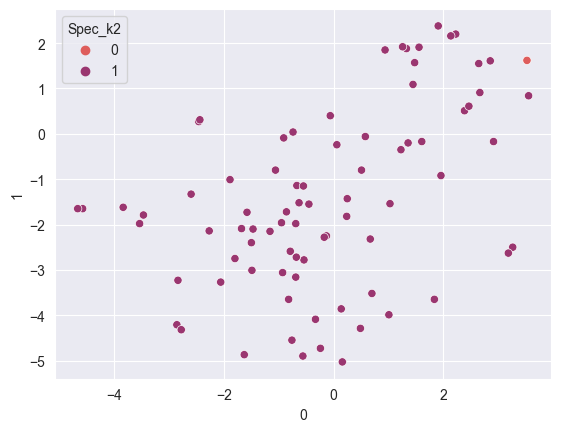

In [203]:
# запускаем кластеризацию, задав количество кластеров, равное 2 
spectral_clustering = SpectralClustering(n_clusters=2, random_state=42)

spectral_clustering.fit_predict(X_scaled_data_abs)
# получаем результаты кластеризации

spectral_predictions = spectral_clustering.labels_
df_abs['Spec_k2'] = spectral_predictions

sns.scatterplot(x=df_abs[0], y=df_abs[1], hue=df_abs.Spec_k2, palette='flare')

In [204]:
regions_data_2['clusters'] = spectral_predictions
display(regions_data_2['clusters'].value_counts())
display(regions_data_2[regions_data_2['clusters'] == 0]['region'])
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2942250799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = spectral_predictions


1    80
0     1
Name: clusters, dtype: int64

9    Московская область
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2942250799.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7690863.0,89131.00,15856.00,26292.00,35909.00,63235.00,262993.00,47046.00,1567.0,26.0,-7.00,220.00,-33.33,683845.10,36335.70,77.80,17.30,4.40,14.80,79106.98,-3258.67,8488.30,1004.30,19.40,0.27,2.786495e+08,3.116646e+09,347566.00,22350.33,37.70,11.00,767.00,21162.00,262.00,3455.00,481.00,17.00,9491.00,714.00,0.00,-41.00,210.33,-28.67,94.00,42.00,-3.00,-338.0,-378.33,-0.67,522978.68,260966.36,232202.54,29809.78,0.05,0.01,36.23,405.24
1,1579745.6,-2585.79,5424.04,8949.22,11931.25,19536.81,72073.84,30934.15,1181.3,23.5,-4.55,48.91,-6.45,544811.48,34922.02,81.09,14.95,3.93,17.24,15413.98,-974.97,7981.89,1114.59,23.36,-0.01,5.896328e+07,4.642100e+08,192928.15,8163.36,64.94,10.07,449.34,7011.76,36.88,756.19,120.16,26.86,3640.81,81.01,1.15,-28.76,-133.07,-4.10,-37.79,5.09,5.02,-246.1,-49.96,-0.20,202870.69,75124.75,106756.00,9793.91,0.07,0.01,39.46,291.83


## 2.7. Проведение кластеризации на выборочных параметрах

<Axes: xlabel='0', ylabel='1'>

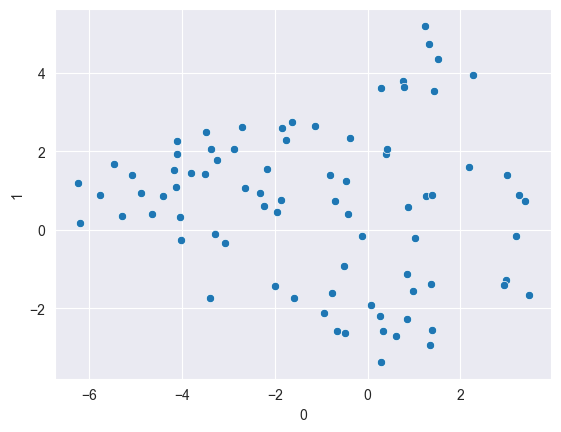

In [205]:
# Сделаем выборку показателей - прирост населения, ВРП на душу населения, доля людей с ограниченными возможностями
# количество малоимущего населения, количество новорожденных к общему количеству населения, обеспечение энергией на душу населения
cols = ['population_growth', 'grp_2020', 'dis_pc', 'energy_pc', 'born_pc', 'poverty']
X_cols = regions_data_2[cols]

col_names = X_cols.columns
scaler = StandardScaler()
# Выполним стандартизацию данных
X_cols_scaled = scaler.fit_transform(X_cols)
X_cols_scaled_data = pd.DataFrame(X_cols_scaled, columns = col_names)
X_cols_scaled_data = X_cols_scaled_data.round(2)

X_tsne_cols = X_cols_scaled_data

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
xtsne_cols = tsne.fit_transform(X_tsne_cols)
df_cols = pd.DataFrame(xtsne_cols)
df_cols = df_cols.applymap(pd.to_numeric)
df_cols = df_cols.round(2)
sns.scatterplot(x=df_cols[0], y=df_cols[1])


### 2.7.1. Оптимальное количество кластеров - метод локтя

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

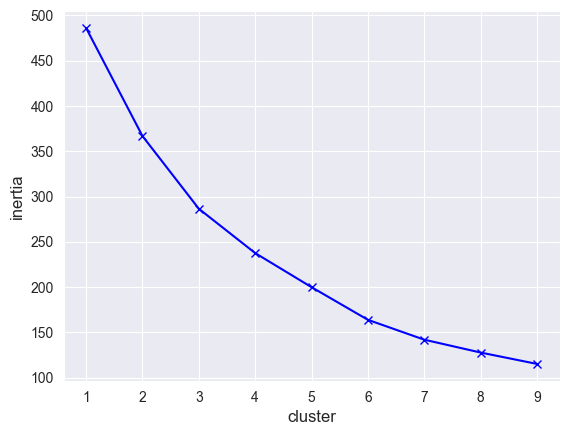

In [206]:
# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X_cols_scaled_data))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

### 2.7.2. Коэффициент силуэта для KMeans 

<Axes: xlabel='cluster', ylabel='silhouette'>

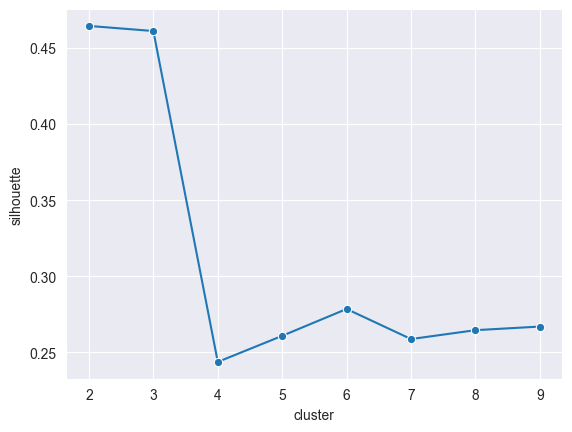

In [207]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_cols_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.7.3. Кластеризация для EM-алгоритма

<Axes: xlabel='cluster', ylabel='silhouette'>

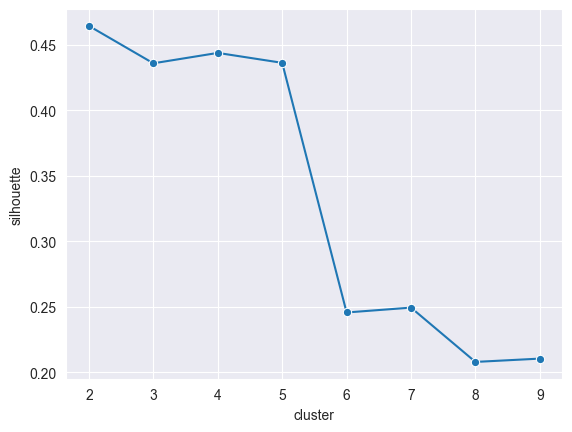

In [208]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_gm(cluster_num, X_cols_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.7.4. Спектральная кластеризация

<Axes: xlabel='cluster', ylabel='silhouette'>

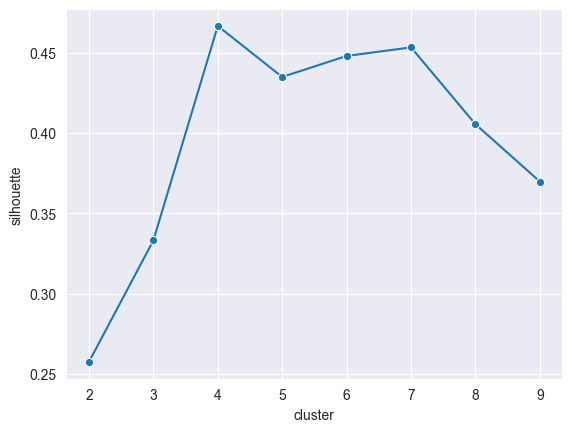

In [209]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_spec(cluster_num, X_cols_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Метод локтя не позволяет явно определить оптимальное количество кластеров. коэффициент силуэта практически одинаков для 2-х и 3-х кластеров

### 2.7.5. Кластеризация с помощью Kmeans

#### 2.7.5.1 - 2 кластера

<Axes: xlabel='0', ylabel='1'>

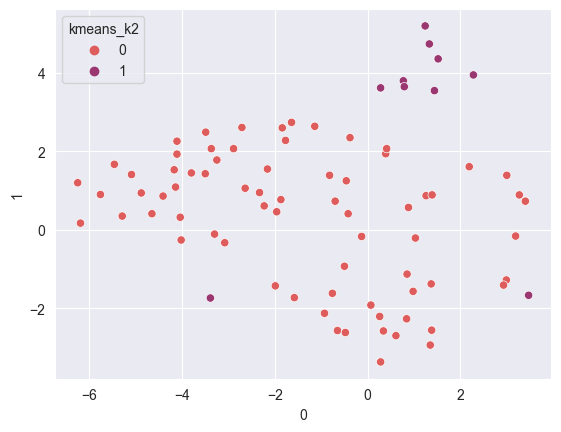

In [210]:
# инициализируем алгоритм k-means с количеством кластеров 2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_cols_scaled_data)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_cols_scaled_data)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df_cols['kmeans_k2'] = predictions

sns.scatterplot(x=df_cols[0], y=df_cols[1], hue=df_cols.kmeans_k2, palette='flare')

In [211]:
regions_data_2['clusters'] = predictions
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = predictions


0    71
1    10
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1655040.39,-3684.67,5857.27,9665.21,12923.03,21203.63,78062.07,28147.13,961.98,25.08,-4.85,51.06,-6.87,433900.37,23586.98,81.32,14.82,3.83,17.34,16027.06,-1039.16,7943.29,1100.81,24.22,0.02,5.581113e+07,4.667731e+08,186513.96,7765.26,61.09,10.18,477.04,7451.51,38.38,813.17,130.93,28.14,3816.85,84.59,1.27,-29.61,-139.49,-4.39,-39.15,5.48,5.11,-262.66,-52.32,-0.15,213933.92,79490.36,114798.86,10564.54,0.08,0.01,31.18,242.81
1,1656264.30,14387.93,3391.30,5600.00,7287.40,12072.20,48649.30,52333.20,2777.00,12.50,-2.70,50.80,-6.17,1346183.67,115542.12,79.11,16.14,4.70,16.30,17430.39,-747.60,8306.60,1201.38,16.90,-0.22,1.033122e+08,7.112553e+08,253932.70,12408.53,89.55,9.38,284.40,5304.60,48.70,621.50,79.80,16.80,2976.00,118.90,0.20,-23.97,-53.20,-4.43,-14.90,5.97,3.57,-137.77,-66.03,-0.53,156332.54,62713.09,62196.36,6324.01,0.04,0.01,97.95,651.21


In [212]:
display(regions_data_2[regions_data_2['clusters'] == 0]['region'])
display(regions_data_2[regions_data_2['clusters'] == 1]['region'])

0             Белгородская область
1                 Брянская область
2             Владимирская область
3              Воронежская область
4               Ивановская область
                  ...             
72              Забайкальский край
75                 Приморский край
76                Хабаровский край
77                Амурская область
80    Еврейская автономная область
Name: region, Length: 71, dtype: object

9             Московская область
23         Ленинградская область
24            Мурманская область
59             Тюменская область
63            Республика Хакасия
73      Республика Саха (Якутия)
74               Камчатский край
78           Магаданская область
79           Сахалинская область
81    Чукотский автономный округ
Name: region, dtype: object

#### 2.7.3.2 - 3 кластера

<Axes: xlabel='0', ylabel='1'>

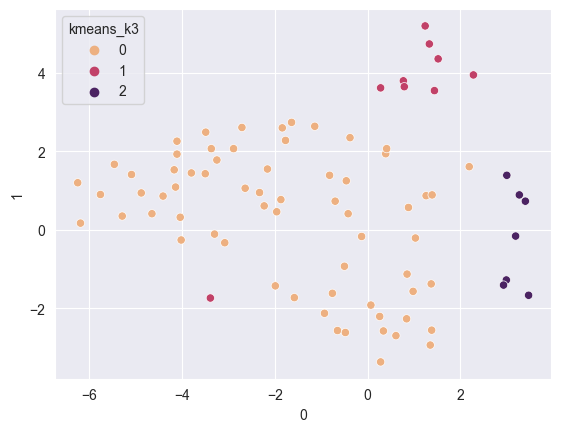

In [213]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_cols_scaled_data)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_cols_scaled_data)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df_cols['kmeans_k3'] = predictions

sns.scatterplot(x=df_cols[0], y=df_cols[1], hue=df_cols.kmeans_k3, palette='flare')

In [214]:
regions_data_2['clusters'] = predictions
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = predictions


0    65
1     9
2     7
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2427849076.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1554004.83,-6020.90,4827.25,8324.89,11217.71,19120.26,72482.77,28066.08,955.24,21.49,-3.88,46.26,-6.94,439544.28,24186.92,81.42,14.67,3.88,17.14,14332.09,-1020.39,8043.79,1132.69,23.91,-0.07,55341286.89,4.553645e+08,188572.71,8113.65,64.58,10.53,492.14,7561.82,38.23,814.17,131.40,29.85,3977.42,82.55,1.34,-30.46,-149.24,-4.72,-41.55,7.74,5.46,-278.41,-39.97,-0.16,204040.13,77559.80,113930.00,9981.68,0.08,0.01,32.56,254.99
1,985753.33,6083.15,2006.33,3300.89,4107.22,6387.44,24833.33,52920.67,2911.44,11.00,-2.22,32.00,-3.15,1419776.84,124342.84,79.26,16.01,4.73,16.47,10577.44,-468.59,8286.41,1223.28,16.62,-0.27,83830272.94,4.439897e+08,243529.00,11303.89,95.31,9.20,230.78,3542.67,25.00,306.67,35.22,16.78,2252.11,52.78,0.22,-22.07,-82.48,-1.74,-27.00,1.96,4.30,-115.52,-31.33,-0.52,115594.08,40684.95,43306.79,3714.48,0.04,0.01,104.81,678.54
2,3455488.14,31268.29,16850.14,24486.29,32041.86,46553.71,156288.57,31599.57,1111.05,58.57,-14.10,119.71,-10.00,417199.01,19837.40,79.90,16.53,3.39,18.81,40777.56,-1530.52,7087.96,791.01,26.37,0.91,92007993.37,9.512636e+08,190404.43,6613.81,25.36,7.06,378.29,8385.86,71.71,1181.29,176.57,10.71,3136.43,193.43,0.43,-23.38,1.05,-4.86,2.10,-10.24,0.71,-127.19,-213.57,-0.14,349954.04,123342.12,139638.83,18726.14,0.09,0.01,19.12,152.91


In [215]:
display(regions_data_2[regions_data_2['clusters'] == 0]['region'])
display(regions_data_2[regions_data_2['clusters'] == 1]['region'])
display(regions_data_2[regions_data_2['clusters'] == 2]['region'])

0             Белгородская область
1                 Брянская область
2             Владимирская область
3              Воронежская область
4               Ивановская область
                  ...             
72              Забайкальский край
75                 Приморский край
76                Хабаровский край
77                Амурская область
80    Еврейская автономная область
Name: region, Length: 65, dtype: object

23         Ленинградская область
24            Мурманская область
59             Тюменская область
63            Республика Хакасия
73      Республика Саха (Якутия)
74               Камчатский край
78           Магаданская область
79           Сахалинская область
81    Чукотский автономный округ
Name: region, dtype: object

9        Московская область
27    город Санкт-Петербург
31       Краснодарский край
36      Республика Дагестан
37     Республика Ингушетия
41     Чеченская Республика
62          Республика Тыва
Name: region, dtype: object

### 2.7.4. ЕМ - алгоритм

#### 2.7.4.1. 2 кластера

<Axes: xlabel='0', ylabel='1'>

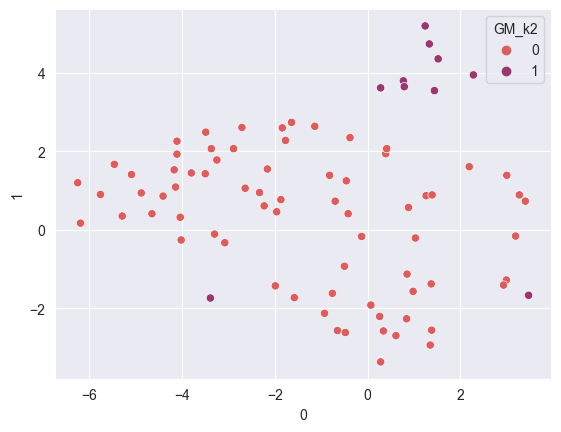

In [216]:
gm = GaussianMixture(n_components=2, random_state=42).fit(X_cols_scaled_data)
gm_predict = gm.predict(X_cols_scaled_data)
df_cols['GM_k2'] = gm_predict

sns.scatterplot(x=df_cols[0], y=df_cols[1], hue=df_cols.GM_k2, palette='flare')

In [217]:
regions_data_2['clusters'] = gm_predict
display(regions_data_2['clusters'].value_counts())
regions_data_2.groupby('clusters').mean().round(2)

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3583781992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = gm_predict


0    71
1    10
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\3583781992.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data_2.groupby('clusters').mean().round(2)


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1655040.39,-3684.67,5857.27,9665.21,12923.03,21203.63,78062.07,28147.13,961.98,25.08,-4.85,51.06,-6.87,433900.37,23586.98,81.32,14.82,3.83,17.34,16027.06,-1039.16,7943.29,1100.81,24.22,0.02,5.581113e+07,4.667731e+08,186513.96,7765.26,61.09,10.18,477.04,7451.51,38.38,813.17,130.93,28.14,3816.85,84.59,1.27,-29.61,-139.49,-4.39,-39.15,5.48,5.11,-262.66,-52.32,-0.15,213933.92,79490.36,114798.86,10564.54,0.08,0.01,31.18,242.81
1,1656264.30,14387.93,3391.30,5600.00,7287.40,12072.20,48649.30,52333.20,2777.00,12.50,-2.70,50.80,-6.17,1346183.67,115542.12,79.11,16.14,4.70,16.30,17430.39,-747.60,8306.60,1201.38,16.90,-0.22,1.033122e+08,7.112553e+08,253932.70,12408.53,89.55,9.38,284.40,5304.60,48.70,621.50,79.80,16.80,2976.00,118.90,0.20,-23.97,-53.20,-4.43,-14.90,5.97,3.57,-137.77,-66.03,-0.53,156332.54,62713.09,62196.36,6324.01,0.04,0.01,97.95,651.21


#### 2.7.4.2. - 4 кластера

<Axes: xlabel='0', ylabel='1'>

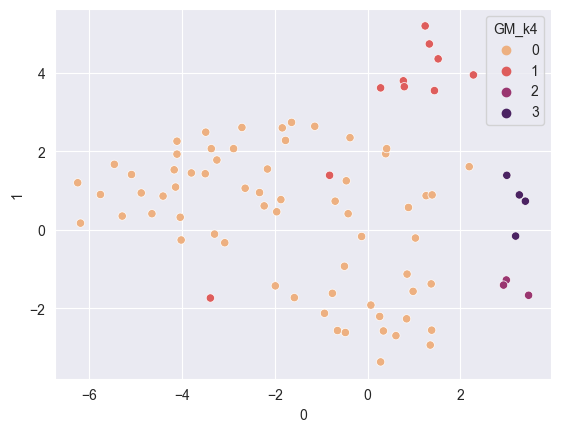

In [218]:
gm = GaussianMixture(n_components=4, random_state=42).fit(X_cols_scaled_data)
gm_predict = gm.predict(X_cols_scaled_data)
df_cols['GM_k4'] = gm_predict

sns.scatterplot(x=df_cols[0], y=df_cols[1], hue=df_cols.GM_k4, palette='flare')

In [220]:
regions_data_2['clusters'] = gm_predict
display(regions_data_2['clusters'].value_counts())
display(regions_data_2.groupby('clusters').mean().round(2))

display(regions_data_2[regions_data_2['clusters'] == 0]['region'])
display(regions_data_2[regions_data_2['clusters'] == 1]['region'])
display(regions_data_2[regions_data_2['clusters'] == 2]['region'])
display(regions_data_2[regions_data_2['clusters'] == 3]['region'])

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\1459989178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = gm_predict


0    64
1    10
3     4
2     3
Name: clusters, dtype: int64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\1459989178.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(regions_data_2.groupby('clusters').mean().round(2))


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1562465.66,-6251.70,4861.81,8387.22,11300.23,19263.52,72937.03,28043.39,954.25,21.75,-3.94,46.52,-6.97,438130.34,24153.16,81.43,14.69,3.85,17.16,14410.93,-1027.74,8068.17,1132.89,24.09,-0.09,5.542602e+07,4.534262e+08,188655.31,8111.71,64.35,10.63,495.22,7609.64,38.52,822.20,133.08,30.28,4008.33,83.28,1.36,-30.52,-153.88,-4.80,-41.76,7.77,5.54,-282.77,-40.51,-0.17,205092.49,78150.17,114326.18,10007.36,0.08,0.01,32.29,250.03
1,988429.20,6349.87,2067.20,3404.40,4290.10,6743.90,26691.00,50580.40,2722.13,10.40,-2.00,31.80,-3.33,1330802.85,114543.33,79.40,15.75,4.85,16.38,10448.30,-476.73,8106.10,1212.93,16.22,-0.15,8.043909e+07,4.575322e+08,237504.70,10997.30,93.69,8.70,237.20,3638.50,24.50,306.00,34.10,15.30,2226.80,51.10,0.20,-22.53,-59.47,-1.53,-27.10,2.33,3.93,-103.90,-28.77,-0.47,117703.59,40594.11,47833.56,4176.84,0.05,0.01,99.26,667.91
2,6254796.33,54266.11,15690.67,25108.67,35423.33,63017.33,318355.00,44363.67,1667.22,39.00,-6.78,183.33,-20.33,705241.10,33520.59,79.40,16.47,3.93,16.20,64593.66,-3179.33,8893.33,1299.43,21.63,1.13,1.985889e+08,2.200161e+09,297639.00,14337.00,23.57,8.10,715.33,16777.67,143.33,2487.33,335.00,14.67,6293.33,430.00,1.00,-43.56,-156.67,-12.78,52.00,15.00,-1.67,-278.67,-468.11,-0.22,477237.50,150191.75,144290.57,23512.30,0.08,0.01,31.32,347.44
3,1356007.00,14019.92,17719.75,24019.50,29505.75,34206.00,34738.75,22026.50,693.92,73.25,-19.58,72.00,-2.25,201167.45,9575.00,80.28,16.58,2.98,20.78,22915.49,-293.92,5733.92,409.70,29.92,0.74,1.207229e+07,1.459060e+07,109978.50,821.42,26.70,6.28,125.50,2092.00,18.00,201.75,57.75,7.75,768.75,16.00,0.00,-8.25,119.33,1.08,-35.33,-29.17,2.50,-13.58,-22.67,-0.08,254491.45,103204.90,136150.02,15136.53,0.10,0.02,9.97,7.02


0             Белгородская область
1                 Брянская область
2             Владимирская область
3              Воронежская область
4               Ивановская область
                  ...             
72              Забайкальский край
75                 Приморский край
76                Хабаровский край
77                Амурская область
80    Еврейская автономная область
Name: region, Length: 64, dtype: object

22       Калининградская область
23         Ленинградская область
24            Мурманская область
59             Тюменская область
63            Республика Хакасия
73      Республика Саха (Якутия)
74               Камчатский край
78           Магаданская область
79           Сахалинская область
81    Чукотский автономный округ
Name: region, dtype: object

9        Московская область
27    город Санкт-Петербург
31       Краснодарский край
Name: region, dtype: object

36     Республика Дагестан
37    Республика Ингушетия
41    Чеченская Республика
62         Республика Тыва
Name: region, dtype: object

### 2.7.5. Спектральная кластеризация

<Axes: xlabel='0', ylabel='1'>

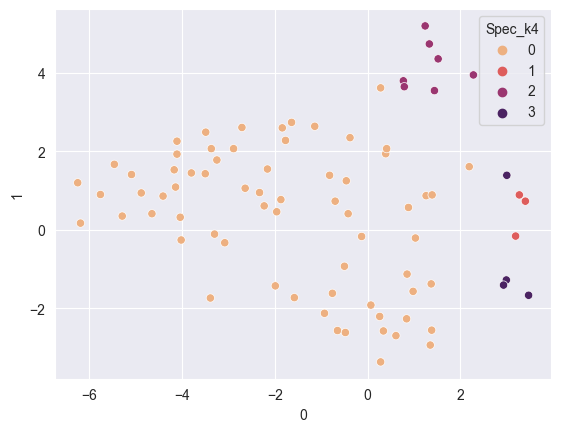

In [221]:
# запускаем кластеризацию, задав количество кластеров, равное 4 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit_predict(X_cols_scaled_data)
# получаем результаты кластеризации

spectral_predictions = spectral_clustering.labels_
df_cols['Spec_k4'] = spectral_predictions

sns.scatterplot(x=df_cols[0], y=df_cols[1], hue=df_cols.Spec_k4, palette='flare')

In [223]:
regions_data_2['clusters'] = spectral_predictions
display(regions_data_2.groupby('clusters').mean().round(2))

display(regions_data_2[regions_data_2['clusters'] == 0]['region'])
display(regions_data_2[regions_data_2['clusters'] == 1]['region'])
display(regions_data_2[regions_data_2['clusters'] == 2]['region'])
display(regions_data_2[regions_data_2['clusters'] == 3]['region'])

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\754979018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data_2['clusters'] = spectral_predictions
C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\754979018.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(regions_data_2.groupby('clusters').mean().round(2))


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1543588.78,-5440.43,4759.24,8225.25,11074.60,18876.18,71872.87,28078.82,961.88,21.13,-3.84,45.69,-6.81,443763.13,24459.35,81.24,14.72,4.01,17.15,14182.28,-1004.98,8017.75,1134.27,23.81,-0.07,5.705139e+07,4.596469e+08,189379.84,8261.32,64.36,10.61,485.61,7476.16,38.12,803.79,128.21,29.54,3940.67,82.04,1.31,-29.89,-148.89,-4.65,-41.66,7.27,5.48,-274.18,-39.50,-0.16,201860.41,75498.23,110573.81,9641.18,0.08,0.01,34.50,259.03
1,1698881.67,17711.78,22996.67,31082.00,37965.67,43927.00,44042.33,23044.67,485.11,92.00,-24.22,89.67,-2.11,184289.97,7362.24,82.87,15.50,1.40,23.17,28359.99,-348.00,4600.53,396.93,31.97,1.07,1.427366e+07,1.926677e+07,120997.67,232.67,5.97,4.13,81.33,1942.67,18.33,216.00,75.00,10.00,333.67,17.33,0.00,-6.00,157.89,2.56,-35.00,-38.00,3.22,0.00,-30.11,-0.11,304728.46,122039.47,163406.39,19282.61,0.11,0.02,7.72,8.79
2,923092.29,3985.48,1851.29,2819.14,3445.43,5085.71,17056.86,59900.00,3406.76,11.43,-2.14,33.43,-3.33,1659462.89,150351.29,80.33,15.91,3.76,16.19,10938.57,-458.38,8604.94,1233.97,15.54,-0.32,7.560181e+07,3.997512e+08,251505.43,10801.95,106.20,8.04,218.57,3214.14,22.29,261.00,38.29,16.00,2110.86,49.14,0.14,-25.10,-66.81,-1.57,-21.81,4.81,3.76,-109.43,-33.38,-0.62,111186.77,49881.50,55252.24,5182.95,0.04,0.01,106.88,760.85
3,4772943.00,41435.67,12240.25,19539.50,27599.00,48523.75,240473.25,38015.75,1580.50,33.50,-6.50,142.25,-15.92,591880.80,29193.76,77.68,17.30,4.88,15.55,50090.74,-2417.42,8953.52,1086.58,22.18,0.79,1.503087e+08,1.650261e+09,242459.50,11399.67,39.90,9.25,601.00,13218.25,111.75,1905.25,252.75,11.25,5238.50,325.50,0.75,-36.42,-116.58,-10.42,29.92,10.58,-1.17,-222.58,-351.17,-0.17,383873.23,124319.11,121813.16,18308.80,0.07,0.01,27.66,261.01


0             Белгородская область
1                 Брянская область
2             Владимирская область
3              Воронежская область
4               Ивановская область
                  ...             
72              Забайкальский край
75                 Приморский край
76                Хабаровский край
77                Амурская область
80    Еврейская автономная область
Name: region, Length: 67, dtype: object

36     Республика Дагестан
37    Республика Ингушетия
41    Чеченская Республика
Name: region, dtype: object

24            Мурманская область
59             Тюменская область
73      Республика Саха (Якутия)
74               Камчатский край
78           Магаданская область
79           Сахалинская область
81    Чукотский автономный округ
Name: region, dtype: object

9        Московская область
27    город Санкт-Петербург
31       Краснодарский край
62          Республика Тыва
Name: region, dtype: object

## 2.8. Дополнительная кластеризация кластера №0, полученного в разделе 2.7. при спектральной кластеризации

In [224]:
regions_data_c0 = regions_data_2[regions_data_2['clusters'] == 0].copy()
X_cols['clusters'] = spectral_predictions
X_cols_c0 = X_cols[X_cols['clusters'] == 0].copy()
display(X_cols_c0.info())
X_cols_c0.head(5)
X_cols_c0.drop(columns='clusters', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 80
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   population_growth  67 non-null     float64
 1   grp_2020           67 non-null     float64
 2   dis_pc             67 non-null     float64
 3   energy_pc          67 non-null     float64
 4   born_pc            67 non-null     float64
 5   poverty            67 non-null     float64
 6   clusters           67 non-null     int32  
dtypes: float64(6), int32(1)
memory usage: 3.9 KB


C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2637362929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cols['clusters'] = spectral_predictions


None

### 2.8.1. Визуализация распределения кластера

<Axes: xlabel='0', ylabel='1'>

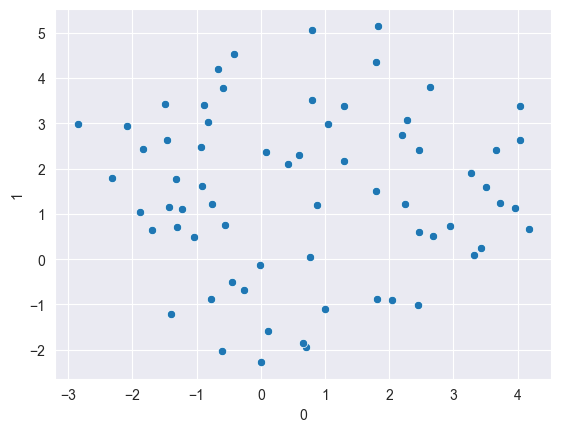

In [225]:
col_names = X_cols_c0.columns
scaler = StandardScaler()
# Выполним стандартизацию данных
X_cols_c0_scaled = scaler.fit_transform(X_cols_c0)
X_cols_c0_scaled_data = pd.DataFrame(X_cols_c0_scaled, columns = col_names)
X_cols_c0_scaled_data = X_cols_c0_scaled_data.round(2)

X_tsne_c0_cols = X_cols_c0_scaled_data

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
xtsne_c0_cols = tsne.fit_transform(X_tsne_c0_cols)
df_c0_cols = pd.DataFrame(xtsne_c0_cols)
df_c0_cols = df_c0_cols.applymap(pd.to_numeric)
df_c0_cols = df_c0_cols.round(2)
sns.scatterplot(x=df_c0_cols[0], y=df_c0_cols[1])


### 2.8.2. Оптимальное количество кластеров для Kmeans  

c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ak88r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

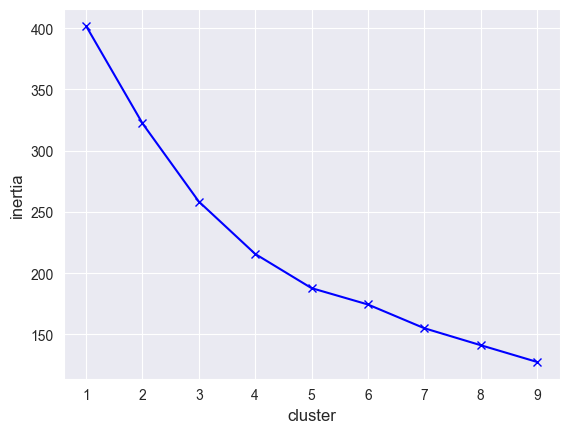

In [226]:
# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X_cols_c0_scaled_data))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

<Axes: xlabel='cluster', ylabel='silhouette'>

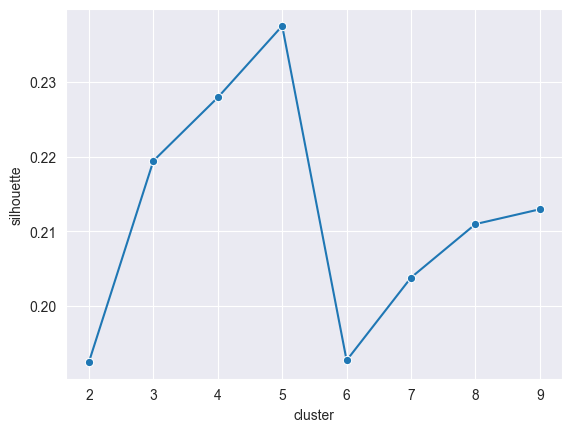

In [227]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_cols_c0_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.8.3. Коэффициент силуэта для EM-алгоритма

<Axes: xlabel='cluster', ylabel='silhouette'>

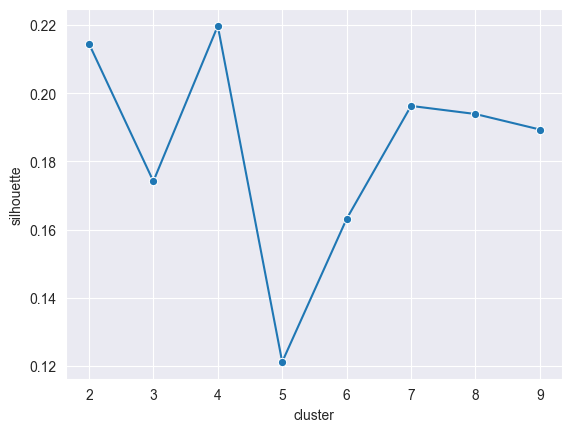

In [228]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_gm(cluster_num, X_cols_c0_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.8.4 Коэффициент силуэта для спектральной кластеризации

<Axes: xlabel='cluster', ylabel='silhouette'>

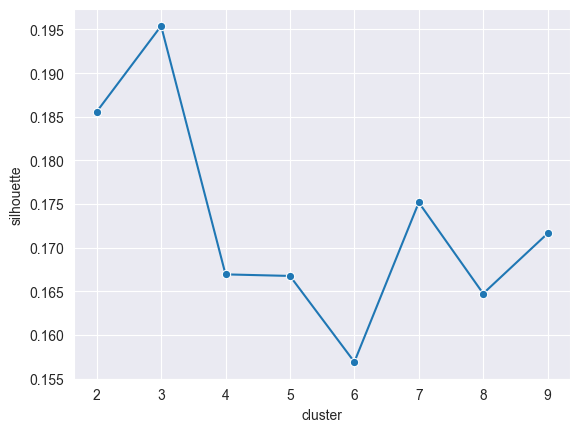

In [229]:
# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_spec(cluster_num, X_cols_c0_scaled_data))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

### 2.8.5. Кластеризация данных - Kmeans

<Axes: xlabel='0', ylabel='1'>

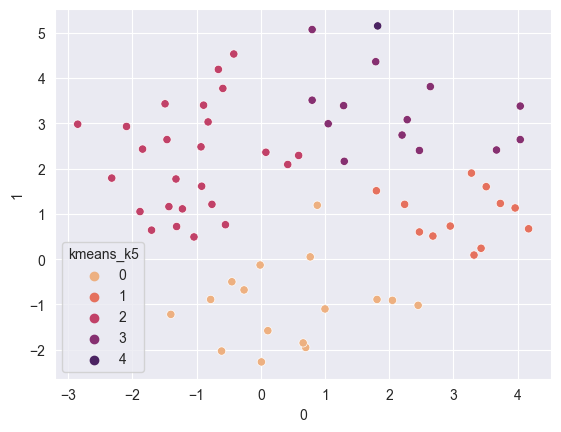

In [249]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X_cols_c0_scaled_data)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X_cols_c0_scaled_data)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df_c0_cols['kmeans_k5'] = predictions

sns.scatterplot(x=df_c0_cols[0], y=df_c0_cols[1], hue=df_c0_cols.kmeans_k5, palette='flare')

In [232]:
regions_data_c0['clusters'] = predictions
display(regions_data_c0['clusters'].value_counts())
display(regions_data_c0[regions_data_c0['clusters'] == 0]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 1]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 2]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 3]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 4]['region'])
display(regions_data_c0.groupby('clusters').mean().round(2))

2    25
0    16
3    13
1    12
4     1
Name: clusters, dtype: int64

28                    Республика Адыгея
29                  Республика Калмыкия
30                      Республика Крым
35                    город Севастополь
38      Кабардино-Балкарская Республика
39      Карачаево-Черкесская Республика
40    Республика Северная Осетия-Алания
42                  Ставропольский край
44                  Республика Марий Эл
47                Удмуртская Республика
48                 Чувашская Республика
61                     Республика Алтай
68                Новосибирская область
71                   Республика Бурятия
72                   Забайкальский край
80         Еврейская автономная область
Name: region, dtype: object

33      Волгоградская область
34         Ростовская область
43    Республика Башкортостан
49              Пермский край
51      Нижегородская область
52       Оренбургская область
54          Самарская область
55        Саратовская область
60        Челябинская область
64             Алтайский край
67        Кемеровская область
69             Омская область
Name: region, dtype: object

0     Белгородская область
1         Брянская область
2     Владимирская область
3      Воронежская область
4       Ивановская область
5        Калужская область
6      Костромская область
7          Курская область
8         Липецкая область
10       Орловская область
11       Рязанская область
12      Смоленская область
13      Тамбовская область
14        Тверская область
15        Тульская область
16     Ярославская область
18      Республика Карелия
21     Вологодская область
25    Новгородская область
26       Псковская область
45     Республика Мордовия
50       Кировская область
53      Пензенская область
56     Ульяновская область
57      Курганская область
Name: region, dtype: object

19            Республика Коми
20      Архангельская область
22    Калининградская область
32       Астраханская область
46       Республика Татарстан
58       Свердловская область
63         Республика Хакасия
65          Красноярский край
66          Иркутская область
70            Томская область
75            Приморский край
76           Хабаровский край
77           Амурская область
Name: region, dtype: object

23    Ленинградская область
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\107974767.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(regions_data_c0.groupby('clusters').mean().round(2))


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1034422.12,-440.33,3524.44,5848.25,7919.94,13430.12,42156.44,24628.06,874.81,21.38,-2.88,31.12,-3.60,320228.33,19377.26,77.54,17.14,5.31,16.84,10792.00,-565.29,6652.88,1011.27,24.30,0.22,2.414393e+07,1.226096e+08,155976.88,6159.25,58.06,12.16,327.00,4821.19,24.56,481.06,113.62,40.56,2370.75,72.38,0.62,-19.50,-10.65,-5.50,-39.31,9.90,6.71,-133.35,-30.29,-0.15,169311.82,63862.58,98497.78,6962.22,0.07,0.01,21.46,89.90
1,2871293.08,-13329.97,8478.58,14809.83,19609.00,33081.83,127948.58,27694.75,901.97,41.75,-8.75,83.75,-15.11,434580.93,18962.96,81.83,14.63,3.48,17.32,25790.32,-2018.05,9031.74,1234.37,25.35,-0.22,1.027869e+08,8.577993e+08,190921.17,7567.22,58.35,10.20,900.33,14420.00,72.67,1667.67,201.50,15.33,7489.00,133.00,1.67,-39.06,-375.94,-4.61,-10.61,-15.19,-2.42,-634.33,-90.89,-0.31,369663.44,145852.03,206023.48,17809.76,0.07,0.01,35.18,296.45
2,1099075.92,-7239.01,3254.64,5888.80,8521.08,15730.88,64796.84,27716.96,880.53,11.92,-1.87,27.92,-4.07,422002.80,25136.92,84.06,12.80,3.11,17.58,8834.16,-720.11,8153.46,1148.50,23.53,-0.27,3.685040e+07,3.627256e+08,195443.08,9206.60,67.80,8.22,302.32,4752.56,20.56,551.84,108.28,41.00,2609.80,49.64,1.48,-13.83,-61.71,-3.32,-29.35,18.36,11.85,-163.20,-24.21,0.00,132782.05,45871.20,73142.40,7072.60,0.09,0.01,32.42,319.77
3,1773954.38,-3424.13,5826.69,9639.77,12097.69,18608.23,68968.23,32986.31,1265.51,20.08,-4.44,63.23,-8.64,629392.84,33667.66,79.96,15.44,4.59,16.56,17995.07,-1191.95,8750.96,1155.93,22.86,0.09,8.555758e+07,6.447386e+08,212310.92,9023.72,73.28,13.84,664.08,9793.08,55.62,896.54,124.69,8.15,5241.38,109.31,1.54,-66.46,-284.67,-5.90,-98.21,5.54,-0.95,-348.72,-35.64,-0.38,222841.95,89636.91,121716.37,11481.06,0.06,0.01,49.63,291.05
4,1875872.00,27985.33,3622.00,7265.00,9674.00,17661.00,89088.00,33149.00,1160.33,14.00,-2.00,38.00,-3.33,661328.60,35081.83,79.80,15.70,4.50,17.00,13267.00,-574.67,4763.30,1264.00,16.70,-0.13,1.691887e+08,1.091256e+09,255646.00,16680.67,35.30,8.60,309.00,4600.00,52.00,694.00,26.00,15.00,2842.00,81.00,1.00,-12.33,-50.33,-8.33,-24.33,-20.00,5.00,-11.00,-2.33,0.00,163200.86,-25704.14,-50673.87,-5222.43,0.07,0.01,90.19,581.73


### Кластеризация с помощью EM-алгоритма

<Axes: xlabel='0', ylabel='1'>

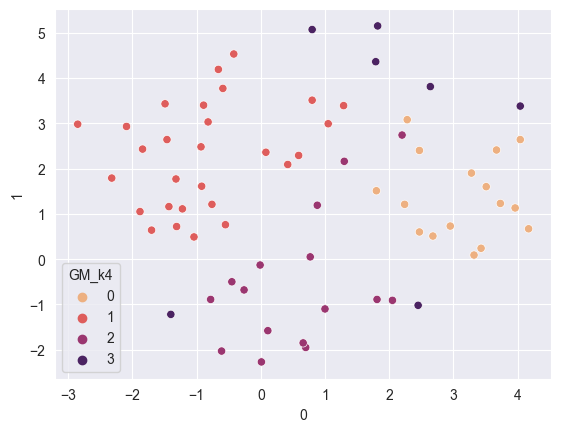

In [233]:
gm = GaussianMixture(n_components=4, random_state=42).fit(X_cols_c0_scaled_data)
gm_predict = gm.predict(X_cols_c0_scaled_data)
df_c0_cols['GM_k4'] = gm_predict

sns.scatterplot(x=df_c0_cols[0], y=df_c0_cols[1], hue=df_c0_cols.GM_k4, palette='flare')

In [234]:
regions_data_c0['clusters'] =gm_predict
display(regions_data_c0['clusters'].value_counts())
display(regions_data_c0[regions_data_c0['clusters'] == 0]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 1]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 2]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 3]['region'])
display(regions_data_c0.groupby('clusters').mean().round(2))

1    28
2    16
0    16
3     7
Name: clusters, dtype: int64

33      Волгоградская область
34         Ростовская область
43    Республика Башкортостан
49              Пермский край
51      Нижегородская область
52       Оренбургская область
54          Самарская область
55        Саратовская область
58       Свердловская область
60        Челябинская область
64             Алтайский край
66          Иркутская область
67        Кемеровская область
69             Омская область
75            Приморский край
76           Хабаровский край
Name: region, dtype: object

0      Белгородская область
1          Брянская область
2      Владимирская область
3       Воронежская область
4        Ивановская область
5         Калужская область
6       Костромская область
7           Курская область
8          Липецкая область
10        Орловская область
11        Рязанская область
12       Смоленская область
13       Тамбовская область
14         Тверская область
15         Тульская область
16      Ярославская область
18       Республика Карелия
19          Республика Коми
20    Архангельская область
21      Вологодская область
25     Новгородская область
26        Псковская область
45      Республика Мордовия
50        Кировская область
53       Пензенская область
56      Ульяновская область
57       Курганская область
77         Амурская область
Name: region, dtype: object

28                    Республика Адыгея
29                  Республика Калмыкия
30                      Республика Крым
32                 Астраханская область
38      Кабардино-Балкарская Республика
39      Карачаево-Черкесская Республика
40    Республика Северная Осетия-Алания
42                  Ставропольский край
44                  Республика Марий Эл
47                Удмуртская Республика
48                 Чувашская Республика
61                     Республика Алтай
70                      Томская область
71                   Республика Бурятия
72                   Забайкальский край
80         Еврейская автономная область
Name: region, dtype: object

22    Калининградская область
23      Ленинградская область
35          город Севастополь
46       Республика Татарстан
63         Республика Хакасия
65          Красноярский край
68      Новосибирская область
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2799208071.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(regions_data_c0.groupby('clusters').mean().round(2))


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2773056.38,-11690.54,8501.06,14737.50,19132.25,30936.81,119550.81,29770.38,1007.83,38.69,-7.87,86.81,-14.83,479751.46,22866.46,81.28,15.01,3.66,16.94,25775.68,-1923.56,9135.02,1203.76,25.34,-0.07,1.085675e+08,8.464517e+08,201508.00,8247.40,64.04,12.74,924.75,14191.56,73.62,1569.31,193.00,13.31,7462.56,130.81,1.75,-61.48,-394.08,-6.94,-45.23,-10.90,-1.94,-574.71,-87.48,-0.42,353069.53,142398.41,193677.04,17010.46,0.07,0.01,38.41,293.48
1,1079426.79,-7308.69,3224.04,5808.00,8318.93,15152.43,62494.32,28638.54,966.21,11.50,-1.98,27.39,-4.20,448867.84,25663.04,83.66,13.05,3.25,17.47,8777.96,-722.19,8296.44,1156.34,23.36,-0.35,3.743276e+07,3.413653e+08,199360.21,9400.31,70.74,8.92,323.11,4922.89,23.86,557.36,106.36,37.29,2733.18,50.61,1.57,-17.27,-74.12,-3.17,-37.92,17.51,10.48,-176.92,-21.63,-0.04,132523.10,45970.20,73414.06,7160.40,0.09,0.01,34.04,303.75
2,961781.19,-1517.50,3379.19,5434.25,7400.50,12589.94,38098.94,24161.56,849.46,20.81,-2.90,27.31,-3.75,336718.59,18811.96,78.38,16.73,4.89,17.22,10027.06,-521.21,6728.75,981.05,25.31,0.27,2.316243e+07,1.035672e+08,155881.56,6443.27,54.48,9.78,301.62,4739.88,26.56,452.12,104.50,39.69,2370.25,67.38,0.69,-21.19,-3.48,-5.17,-31.25,10.52,7.40,-98.56,-28.25,-0.19,161609.59,62347.34,92492.93,6778.54,0.07,0.01,22.40,91.37
3,1919871.00,7351.90,5501.71,9388.57,12077.71,20572.57,77606.43,30927.29,1096.48,20.29,-4.24,66.86,-5.90,585758.53,36193.76,78.04,16.14,5.81,16.19,18797.99,-1142.33,7295.54,1237.41,18.66,0.25,9.523534e+07,8.625447e+08,198304.29,7892.76,62.19,14.41,552.43,8594.14,40.43,843.57,121.71,12.43,4310.14,129.86,0.71,-28.05,-219.86,-4.14,-72.24,0.38,-1.90,-377.71,-27.00,-0.05,225590.72,70754.82,110590.28,9263.41,0.06,0.01,55.05,384.68


<Axes: xlabel='0', ylabel='1'>

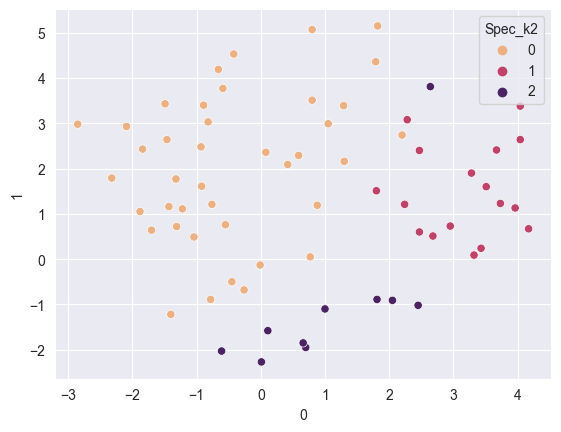

In [235]:
# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit_predict(X_cols_c0_scaled_data)
# получаем результаты кластеризации

spectral_predictions = spectral_clustering.labels_
df_c0_cols['Spec_k2'] = spectral_predictions

sns.scatterplot(x=df_c0_cols[0], y=df_c0_cols[1], hue=df_c0_cols.Spec_k2, palette='flare')

In [236]:
regions_data_c0['clusters'] = spectral_predictions
display(regions_data_c0['clusters'].value_counts())
display(regions_data_c0[regions_data_c0['clusters'] == 0]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 1]['region'])
display(regions_data_c0[regions_data_c0['clusters'] == 2]['region'])
display(regions_data_c0.groupby('clusters').mean().round(2))

0    40
1    17
2    10
Name: clusters, dtype: int64

0             Белгородская область
1                 Брянская область
2             Владимирская область
3              Воронежская область
4               Ивановская область
5                Калужская область
6              Костромская область
7                  Курская область
8                 Липецкая область
10               Орловская область
11               Рязанская область
12              Смоленская область
13              Тамбовская область
14                Тверская область
15                Тульская область
16             Ярославская область
18              Республика Карелия
19                 Республика Коми
20           Архангельская область
21             Вологодская область
22         Калининградская область
23           Ленинградская область
25            Новгородская область
26               Псковская область
28               Республика Адыгея
29             Республика Калмыкия
32            Астраханская область
35               город Севастополь
44             Респу

33      Волгоградская область
34         Ростовская область
43    Республика Башкортостан
49              Пермский край
51      Нижегородская область
52       Оренбургская область
54          Самарская область
55        Саратовская область
58       Свердловская область
60        Челябинская область
64             Алтайский край
65          Красноярский край
66          Иркутская область
67        Кемеровская область
69             Омская область
75            Приморский край
76           Хабаровский край
Name: region, dtype: object

30                      Республика Крым
38      Кабардино-Балкарская Республика
39      Карачаево-Черкесская Республика
40    Республика Северная Осетия-Алания
42                  Ставропольский край
46                 Республика Татарстан
61                     Республика Алтай
68                Новосибирская область
71                   Республика Бурятия
72                   Забайкальский край
Name: region, dtype: object

C:\Users\ak88r\AppData\Local\Temp\ipykernel_16984\2114366316.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(regions_data_c0.groupby('clusters').mean().round(2))


,population_2020,population_growth,18_30_dis,31_40_dis,41_50_dis,51_60_dis,60_dis,cash_2020,cash_growth,cmr_2020,cmr_growth,cmu_2020,cmu_growth,grp_2020,grp_growth,good_conditions,bad_conditions,worst_conditions,living_area,born_2020,born_growth,inj_2016,onco_2016,welfare_2020,welfare_growth,energy_2020,manufacture_2020,retail_2020,retail_growth,alco_2018,drug_2018,minor_crime_2020,recidivist_2020,group_crime_2020,group_agreem_2020,organized_group_2020,crime_organization_2020,alco_crimes_2020,drug_crimes_2020,toxic_crimes_2020,minor_crime_growth,recidivist_growth,group_crime_growth,group_agreem_growth,organized_group_growth,crime_organization_growth,alco_crimes_growth,drug_crimes_growth,toxic_crimes_growth,poverty,under_age_16_2020_abs,work_age_2020_abs,older_work_age_2020_abs,dis_pc,born_pc,energy_pc,manufacture_pc
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1011787.62,-4512.41,2983.70,5265.38,7391.02,13223.50,53814.18,27960.40,965.92,10.72,-1.95,26.08,-3.70,442112.13,24282.24,81.96,14.15,3.86,17.21,8501.52,-654.62,7940.80,1150.53,23.04,-0.20,3.714005e+07,3.096323e+08,189918.00,8869.67,68.43,9.92,299.85,4642.70,22.78,501.62,100.98,34.42,2558.85,53.98,1.23,-15.21,-62.57,-2.68,-33.58,16.78,8.31,-147.83,-19.61,-0.04,128589.61,43435.27,68636.24,6220.53,0.08,0.01,34.97,272.95
1,2778538.65,-11180.24,8584.82,14818.35,19189.00,30918.71,118559.24,29950.47,1027.24,39.00,-8.16,88.12,-14.69,507508.06,26701.20,81.39,14.89,3.67,16.92,25964.46,-1939.35,9176.89,1226.61,25.31,-0.03,1.124471e+08,8.982601e+08,201236.24,8138.65,64.34,12.86,929.53,14378.65,74.29,1559.71,200.00,12.59,7532.35,130.65,1.76,-65.82,-424.88,-7.59,-52.47,-8.02,-2.29,-611.22,-83.29,-0.41,360963.29,144283.22,199309.83,17385.65,0.07,0.01,39.73,311.67
2,1571378.60,605.17,5357.90,8856.50,12014.40,21014.60,64740.80,25370.70,834.63,32.40,-4.07,52.00,-5.87,342000.76,21356.65,78.13,16.70,5.17,17.28,16875.59,-818.00,6354.99,912.29,24.31,0.35,4.252406e+07,3.140628e+08,167071.30,6036.50,48.12,9.55,474.00,7075.80,38.00,727.40,115.10,38.80,3362.10,111.70,0.90,-27.53,-24.97,-7.50,-55.60,-4.80,7.40,-206.60,-44.60,-0.23,224468.75,86815.58,127472.85,10158.17,0.08,0.01,23.71,113.90


По итогам кластеризации на данной итерации лучше всех справился метод Kmeans - выделено
5 кластеров, визуально кластеры хорошо разделены, и коэффициент силуэта для дванного варианта
показал максимальное значение.

## Портреты кластеров, попробуем создать

In [242]:
def plot_cluster_profile(grouped_data, n_clusters):
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устанавливаем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

In [253]:
regions_data_c0['clusters'] = predictions
regions_data_c01 = regions_data_c0[['population_2020', 'poverty', 'dis_pc', 'cash_2020', 'clusters']].copy()
grouped = regions_data_c01.groupby('clusters').mean().round(2).copy()
plot_cluster_profile(grouped, 5)

In [248]:
grouped

,population_growth,grp_2020,dis_pc,energy_pc,born_pc,poverty
clusters,,,,,,
0,-5440.43,443763.13,0.08,34.50,0.01,201860.41
1,17711.78,184289.97,0.11,7.72,0.02,304728.46
2,3985.48,1659462.89,0.04,106.88,0.01,111186.77
3,41435.67,591880.80,0.07,27.66,0.01,383873.23


In [ ]:
kmeans_clusters = kmeans.fit_predict(X)
dbscan_clusters = dbscan.fit_predict(X)
agglo_clusters = agglo.fit_predict(X)
gmm_clusters = gmm.fit_predict(X)

def majority_voting(clusters):
    final_clusters = []
    for i in range(len(clusters[0])):
        votes = {}
        for cluster in clusters:
            if cluster[i] not in votes:
                votes[cluster[i]] = 1
            else:
                votes[cluster[i]] += 1
        final_clusters.append(max(votes, key=votes.get))
    return final_clusters
 
clusters = [kmeans_clusters, dbscan_clusters, agglo_clusters, gmm_clusters]
 
final_clusters = majority_voting(clusters)
 
print(silhouette_score(X, final_clusters))